<font style='color:Blue' size="6"> **P4 -  Anticiper les besoins en consommation électrique de batiments** </font>

___________________________________________________________________________________________________________________ 
___________________________________________________________________________________________________________________ 

# P4_01 - Nettoyage et analyse exploratoire
______________________________________________________________________________

# <span style='background :lightgreen' > 1. Contexte  </span>

________________________________________________________

### Mission

_________________________________________________________

La **ville de Seattle** souhaiterait attendre son objectif **neutralité carbone**, d'ici 2050. Afin de limiter les couts liées aux prélèvements des informations des batiments, comme pour celles de 2015 et 2016, des **prévisions** pour les batiments de la ville sont nécessaires.   

Les trois objectifs principaux fixés sont :

- prédire au moyen d'une modélisation : 
 > - les émissions de CO2 (Gaz à Effets de Serre), 
 > - la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.
- Evaluer, pour ces prédictions, la pertinence d'un indicateur d'efficacité énergétique appelé Energy Star Score.

In [1]:
# Chargement des librairies
import datetime
import numpy as np
import pandas as pd
from pandas import json_normalize
import fonctions_data
import json
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import folium
import scipy.stats as stat
import re
import sklearn
from sklearn.preprocessing import Binarizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
# Chargement à chaud des librairies personnelles
%load_ext autoreload
%autoreload 2

# Versions
print('Version des librairies utilisées :')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Matplotlib            : ' + mpl.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)
now = datetime.datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
Python                : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.24.3
Pandas                : 1.5.3
Matplotlib            : 3.7.1
Seaborn               : 0.12.2
Sklearn               : 1.2.2
Lancé le           : 2023-08-25T14:31:33.985378


# <span style='background :lightgreen' > 2. Chargement des datasets  </span>

In [2]:
# Chargement du jeu de données 2015
data_2015 = pd.read_csv('2015_Building_Energy_Benchmarking.csv', sep=',',
                        low_memory=True)
# Chargement du jeu de données 2016
data_2016 = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',',
                        low_memory=True)

In [3]:
# Copie des jeux de données dans des dataframes témoins
df_2015 = data_2015.copy()
df_2016 = data_2016.copy()

In [4]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


In [5]:
# Dimension des données - 2016

print ("Le dataset compte {} lignes et {} variables".format(df_2016.shape[0], df_2016.shape[1]))

Le dataset compte 3376 lignes et 46 variables


# <span style='background :lightgreen' > 3. Descriptif des datasets  </span>

## <span style='background :lightblue' > 3.1 Description des données (2015,2016)  </span>

### Données de 2015

In [6]:
# Contenu des 5 premières lignes
data_2015.head(5)

OSEBuildingID  DataYear          BuildingType        PrimaryPropertyType  \
0          21548      2015  Multifamily LR (1-4)       Low-Rise Multifamily   
1          26379      2015        NonResidential                      Hotel   
2          26713      2015  Multifamily HR (10+)      High-Rise Multifamily   
3            102      2015        NonResidential                      Hotel   
4            503      2015        NonResidential  Supermarket/Grocery Store   

             PropertyName TaxParcelIdentificationNumber  \
0        PUGET VISTA APTS                    1992200030   
1         GEORGETOWN  INN                    6920700025   
2          QUINTESSA APTS                    5247800955   
3  MARRIOTT RESIDENCE INN                    1984200065   
4        RESTAURANT DEPOT                    1824049003   

                                            Location  CouncilDistrictCode  \
0  411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...                    7   
1  6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...                    2   
2  201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...                    7   
3  800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...                    3   
4  3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....                    2   

            Neighborhood  YearBuilt  ...  Electricity(kBtu)  \
0  MAGNOLIA / QUEEN ANNE       1967  ...                NaN   
1       GREATER DUWAMISH       1992  ...           589893.0   
2               DOWNTOWN       2007  ...          2829904.0   
3             LAKE UNION       1990  ...         10638785.0   
4       GREATER DUWAMISH       2008  ...          6620217.0   

   NaturalGas(therms)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  \
0                 NaN               NaN                 NaN   
1              7644.0          764350.0                 0.0   
2             15320.0         1531968.0                 0.0   
3             81908.0         8190794.0                 0.0   
4                 0.0               0.0                 0.0   

   GHGEmissions(MetricTonsCO2e) GHGEmissionsIntensity(kgCO2e/ft2) DefaultData  \
0                           NaN                               NaN          No   
1                         44.71                              1.88          No   
2                        101.09                              0.98          No   
3                        509.18                              1.64          No   
4                         46.15                              0.28          No   

   Comment ComplianceStatus  Outlier  
0      NaN    Not Compliant      NaN  
1      NaN        Compliant      NaN  
2      NaN        Compliant      NaN  
3      NaN        Compliant      NaN  
4      NaN        Compliant      NaN  

[5 rows x 42 columns]

In [7]:
# Nom des colonnes
data_2015.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier']

-------------------------------------------------------------
Type de variable pour chacune des variables



OSEBuildingID                          int64
DataYear                               int64
BuildingType                          object
PrimaryPropertyType                   object
PropertyName                          object
TaxParcelIdentificationNumber         object
Location                              object
CouncilDistrictCode                    int64
Neighborhood                          object
YearBuilt                              int64
NumberofBuildings                      int64
NumberofFloors                       float64
PropertyGFATotal                       int64
PropertyGFAParking                     int64
PropertyGFABuilding(s)                 int64
ListOfAllPropertyUseTypes             object
LargestPropertyUseType                object
LargestPropertyUseTypeGFA            float64
SecondLargestPropertyUseType          object
SecondLargestPropertyUseTypeGFA      float64
ThirdLargestPropertyUseType           object
ThirdLargestPropertyUseTypeGFA       float64
YearsENERG

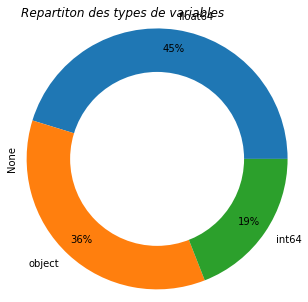

In [26]:
# Types des variables
fonctions_data.affichage_types_var(data_2015, True, True, True)

In [9]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(data_2015, type_var='cat')

BuildingType   PrimaryPropertyType PropertyName  \
type            object                object       object   
nb_nan             0.0                   0.0          0.0   
%_nan              0.0                   0.0          0.0   
count             3340                  3340         3340   
unique               7                    27         3287   
top     NonResidential  Low-Rise Multifamily    WAREHOUSE   
freq              1461                   998            9   

       TaxParcelIdentificationNumber  \
type                          object   
nb_nan                           2.0   
%_nan                        0.05988   
count                           3338   
unique                          3245   
top                       3224049012   
freq                               5   

                                                 Location Neighborhood  \
type                                               object       object   
nb_nan                                                0.0          0.0   
%_nan                                                 0.0          0.0   
count                                                3340         3340   
unique                                               3298           13   
top     309 S CLOVERDALE ST\nSEATTLE, WA 98108\n(47.52...     DOWNTOWN   
freq                                                    5          578   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
type                      object                 object   
nb_nan                     127.0                  136.0   
%_nan                   3.802395               4.071856   
count                       3213                   3204   
unique                       442                     56   
top          Multifamily Housing    Multifamily Housing   
freq                         862                   1598   

       SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
type                         object                      object   
nb_nan                       1781.0                      2780.0   
%_nan                     53.323353                   83.233533   
count                          1559                         560   
unique                           47                          41   
top                         Parking                Retail Store   
freq                            881                         107   

       YearsENERGYSTARCertified DefaultData  \
type                     object      object   
nb_nan                   3230.0         1.0   
%_nan                 96.706587     0.02994   
count                       110        3339   
unique                       61           2   
top                        2016          No   
freq                         20        2791   

                                                  Comment ComplianceStatus  \
type                                               object           object   
nb_nan                                             3327.0              0.0   
%_nan                                           99.610778              0.0   
count                                                  13             3340   
unique                                                 13                2   
top     Part of McKinstry's campus, the office space f...        Compliant   
freq                                                    1             3337   

             Outlier  
type          object  
nb_nan        3256.0  
%_nan       97.48503  
count             84  
unique             2  
top     High Outlier  
freq              46

In [10]:
# Résumé des variables quantitatives
fonctions_data.detail_type_var(data_2015, type_var='num')

OSEBuildingID DataYear CouncilDistrictCode   YearBuilt  \
type           int64    int64               int64       int64   
nb_nan           0.0      0.0                 0.0         0.0   
%_nan            0.0      0.0                 0.0         0.0   
count         3340.0   3340.0              3340.0      3340.0   
mean    20522.168263   2015.0            4.450898  1967.62485   
std     11511.515874      0.0            2.127203   32.949847   
min              1.0   2015.0                 1.0      1900.0   
25%         19921.75   2015.0                 3.0      1947.0   
50%          22977.0   2015.0                 4.0      1973.0   
75%          25748.0   2015.0                 7.0      1996.0   
max          50059.0   2015.0                 7.0      2015.0   

       NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
type               int64        float64            int64              int64   
nb_nan               0.0            8.0              0.0                0.0   
%_nan                0.0       0.239521              0.0                0.0   
count             3340.0         3332.0           3340.0             3340.0   
mean            1.035629       4.682173     90772.892814       11054.032335   
std             0.784463        5.45846    149305.807978       35296.330507   
min                  1.0            0.0          20000.0               -3.0   
25%                  1.0            2.0          28487.0                0.0   
50%                  1.0            4.0          43855.0                0.0   
75%                  1.0            5.0          88428.0            4304.25   
max                 39.0           99.0        2200000.0           512608.0   

       PropertyGFABuilding(s) LargestPropertyUseTypeGFA  ...  \
type                    int64                   float64  ...   
nb_nan                    0.0                     136.0  ...   
%_nan                     0.0                  4.071856  ...   
count                  3340.0                    3204.0  ...   
mean             79718.860479              74881.541823  ...   
std             129231.444782             123624.855242  ...   
min                  -50550.0                    5872.0  ...   
25%                   26683.0                   25000.0  ...   
50%                   41326.0                   39000.0  ...   
75%                   78726.0                   72067.5  ...   
max                 2200000.0                 1719643.0  ...   

       SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
type               float64               float64         float64   
nb_nan                10.0                  10.0            10.0   
%_nan             0.299401              0.299401        0.299401   
count               3330.0                3330.0          3330.0   
mean        4983106.046246        5203054.860961   250285.075976   
std        13753302.354729       14007566.321838  3481900.055331   
min                    0.0                   0.0             0.0   
25%               913930.0             988324.75             0.0   
50%              1776219.0             1953996.5             0.0   
75%              4044277.0            4368461.75             0.0   
max            295812640.0           297740960.0     127869744.0   

       Electricity(kWh) Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu)  \
type            float64           float64            float64          float64   
nb_nan             10.0              10.0               10.0             10.0   
%_nan          0.299401          0.299401           0.299401         0.299401   
count            3330.0            3330.0             3330.0           3330.0   
mean     1017897.224925    3473209.381081       12533.044745   1253304.191592   
std       2789930.77128    9519638.974291       44151.417384   4415142.222371   
min                 0.0               0.0                0.0              0.0   
25%           186490.75         636332.25  

Valeurs manquantes :20265 NaN pour 140280 données (14.45 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
Comment                                                     3327   
Outlier                                                     3256   
YearsENERGYSTARCertified                                    3230   
ThirdLargestPropertyUseType                                 2780   
ThirdLargestPropertyUseTypeGFA                              2780   
SecondLargestPropertyUseType                                1781   
SecondLargestPropertyUseTypeGFA                             1781   
ENERGYSTARScore                                              780   
LargestPropertyUseType                                       136   
LargestPropertyUseTypeGFA                                    136   
ListOfAllPropertyUseTypes                                    127   
Electricity(kWh)                                              10   
GHGEmissionsIntensity(kgCO2e/ft2)                             10   
GHGEmissions(MetricTonsCO2e)                                  10   
OtherFuelUse(kBtu)                                            10   
NaturalGas(kBtu)                                              10   
NaturalGas(therms)                                            10   
Electricity(kBtu)                                             10   
SourceEUIWN(kBtu/sf)                                          10   
SteamUse(kBtu)                                                10   
SiteEnergyUseWN(kBtu)                                         10   
SiteEnergyUse(kBtu)                                           10   
SourceEUI(kBtu/sf)                                            10   
SiteEUIWN(kBtu/sf)                                            10   
SiteEUI(kBtu/sf)                                              10   
NumberofFloors                                                 8   
TaxParcelIdentificationNumber                                  2   
DefaultData                                                    1   

                                   % de valeurs manquantes  
Comment                                              99.61  
Outlier                                              97.49  
YearsENERGYSTARCertified                             96.71  
ThirdLargestPropertyUseType                          83.23  
ThirdLargestPropertyUseTypeGFA                       83.23  
SecondLargestPropertyUseType                         53.32  
SecondLargestPropertyUseTypeGFA                      53.32  
ENERGYSTARScore                                      23.35  
LargestPropertyUseType                                4.07  
LargestPropertyUseTypeGFA                             4.07  
ListOfAllPropertyUseTypes                             3.80  
Electricity(kWh)                                      0.30  
GHGEmissionsIntensity(kgCO2e/ft2)                     0.30  
GHGEmissions(MetricTonsCO2e)                          0.30  
OtherFuelUse(kBtu)                                    0.30  
NaturalGas(kBtu)                                      0.30  
NaturalGas(therms)                                    0.30  
Electricity(kBtu)                                     0.30  
SourceEUIWN(kBtu/sf)                                  0.30  
SteamUse(kBtu)                                        0.30  
SiteEnergyUseWN(kBtu)                                 0.30  
SiteEnergyUse(kBtu)                                   0.30  
SourceEUI(kBtu/sf)                                    0.30  
SiteEUIWN(kBtu/sf)                                    0.30  
SiteEUI(kBtu/sf)                                      0.30  
NumberofFloors                                        0.24  
TaxParcelIdentificationNumber                         0.06  
DefaultData                                           0.03

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


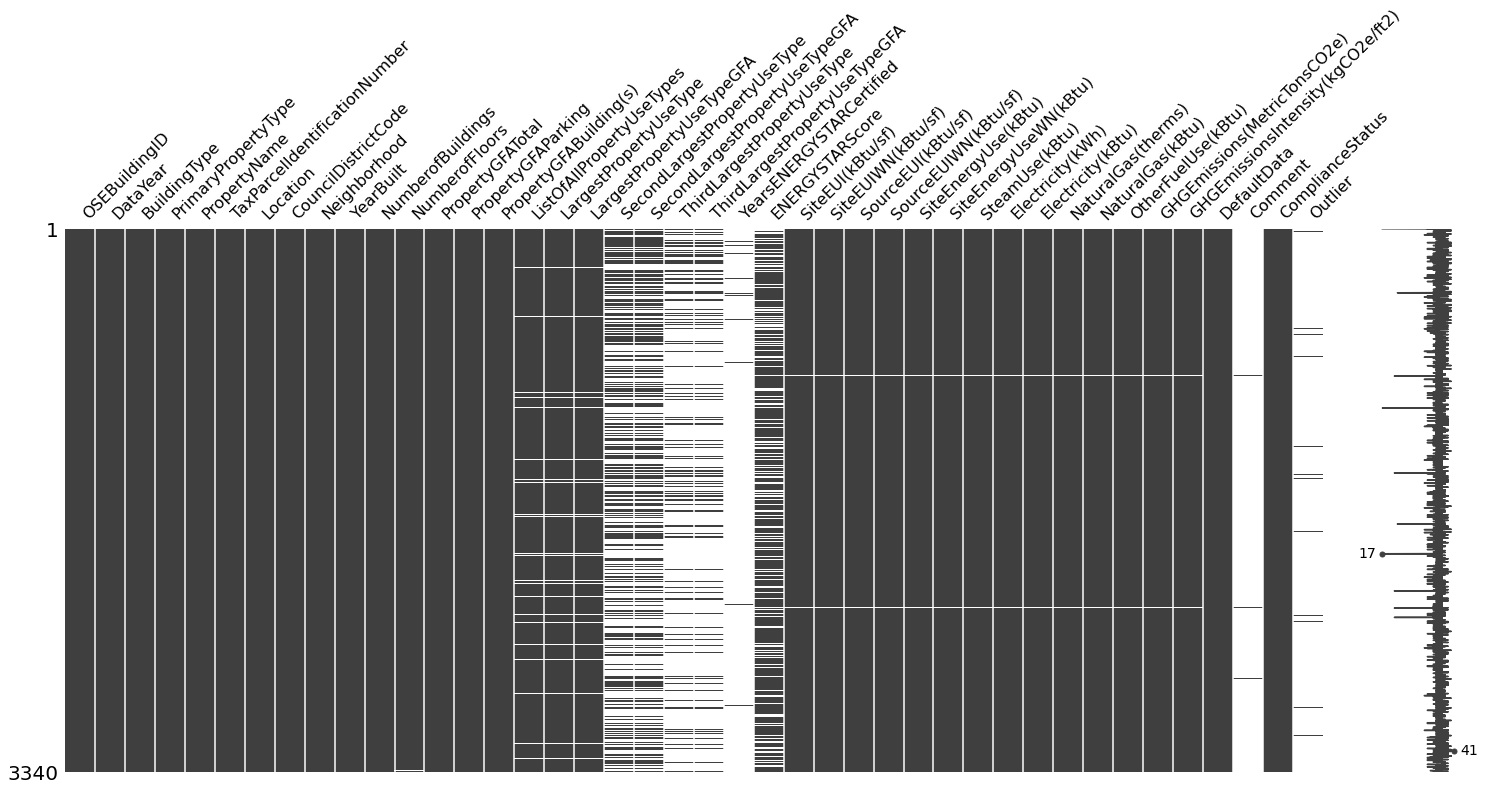

In [11]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(data_2015, True, True)

### Données de 2016

In [12]:
# Contenu des 5 premières lignes
data_2016.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [846]:
# Nom des colonnes
data_2016.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

-------------------------------------------------------------
Type de variable pour chacune des variables



OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

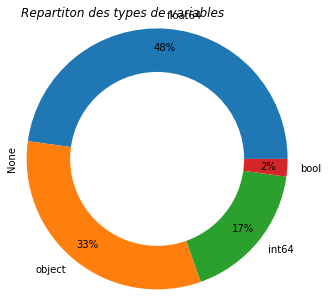

In [15]:
# Types des variables
fonctions_data.affichage_types_var(data_2016, True, True, True)

In [16]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(data_2016, type_var='cat')

BuildingType   PrimaryPropertyType     PropertyName  \
type            object                object           object   
nb_nan             0.0                   0.0              0.0   
%_nan              0.0                   0.0              0.0   
count             3376                  3376             3376   
unique               8                    24             3362   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1460                   987                3   

                            Address     City   State  \
type                         object   object  object   
nb_nan                          0.0      0.0     0.0   
%_nan                           0.0      0.0     0.0   
count                          3376     3376    3376   
unique                         3354        1       1   
top     309 South Cloverdale Street  Seattle      WA   
freq                              4     3376    3376   

       TaxParcelIdentificationNumber Neighborhood ListOfAllPropertyUseTypes  \
type                          object       object                    object   
nb_nan                           0.0          0.0                       9.0   
%_nan                            0.0          0.0                  0.266588   
count                           3376         3376                      3367   
unique                          3268           19                       466   
top                       1625049001     DOWNTOWN       Multifamily Housing   
freq                               8          573                       866   

       LargestPropertyUseType SecondLargestPropertyUseType  \
type                   object                       object   
nb_nan                   20.0                       1697.0   
%_nan                0.592417                    50.266588   
count                    3356                         1679   
unique                     56                           50   
top       Multifamily Housing                      Parking   
freq                     1667                          976   

       ThirdLargestPropertyUseType YearsENERGYSTARCertified DefaultData  \
type                        object                   object        bool   
nb_nan                      2780.0                   3257.0         0.0   
%_nan                    82.345972                96.475118         0.0   
count                          596                      119        3376   
unique                          44                       65           2   
top                   Retail Store                     2016       False   
freq                           110                       14        3263   

       ComplianceStatus      Outlier  
type             object       object  
nb_nan              0.0       3344.0  
%_nan               0.0    99.052133  
count              3376           32  
unique                4            2  
top           Compliant  Low outlier  
freq               3211           23

In [18]:
# Résumé des variables quantitatives
fonctions_data.detail_type_var(data_2016, type_var='num')

OSEBuildingID DataYear       ZipCode CouncilDistrictCode   Latitude  \
type           int64    int64       float64               int64    float64   
nb_nan           0.0      0.0          16.0                 0.0        0.0   
%_nan            0.0      0.0      0.473934                 0.0        0.0   
count         3376.0   3376.0        3360.0              3376.0     3376.0   
mean    21208.991114   2016.0  98116.949107            4.439277  47.624033   
std     12223.757015      0.0     18.615205            2.120625   0.047758   
min              1.0   2016.0       98006.0                 1.0   47.49917   
25%         19990.75   2016.0       98105.0                 3.0   47.59986   
50%          23112.0   2016.0       98115.0                 4.0  47.618675   
75%         25994.25   2016.0       98122.0                 7.0  47.657115   
max          50226.0   2016.0       98272.0                 7.0   47.73387   

         Longitude    YearBuilt NumberofBuildings NumberofFloors  \
type       float64        int64           float64          int64   
nb_nan         0.0          0.0               8.0            0.0   
%_nan          0.0          0.0          0.236967            0.0   
count       3376.0       3376.0            3368.0         3376.0   
mean   -122.334795  1968.573164          1.106888       4.709123   
std       0.027203    33.088156          2.108402       5.494465   
min     -122.41425       1900.0               0.0            0.0   
25%    -122.350662       1948.0               1.0            2.0   
50%    -122.332495       1975.0               1.0            4.0   
75%    -122.319407       1997.0               1.0            5.0   
max    -122.220966       2015.0             111.0           99.0   

       PropertyGFATotal  ... SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)  \
type              int64  ...             float64               float64   
nb_nan              0.0  ...                 5.0                   6.0   
%_nan               0.0  ...            0.148104              0.177725   
count            3376.0  ...              3371.0                3370.0   
mean       94833.537322  ...      5403667.294533        5276725.714395   
std        218837.60712  ...     21610628.627639       15938786.484121   
min             11285.0  ...                 0.0                   0.0   
25%             28487.0  ...        925128.59375         970182.234375   
50%             44175.0  ...          1803753.25             1904452.0   
75%             90992.0  ...          4222455.25           4381429.125   
max           9320156.0  ...         873923712.0           471613856.0   

        SteamUse(kBtu) Electricity(kWh) Electricity(kBtu) NaturalGas(therms)  \
type           float64          float64           float64            float64   
nb_nan             9.0              9.0               9.0                9.0   
%_nan         0.266588         0.266588          0.266588           0.266588   
count           3367.0           3367.0            3367.0             3367.0   
mean     274595.898209   1086638.966571    3707612.161594       13685.045376   
std     3912173.392696   4352478.355209   14850656.138963       67097.808296   
min                0.0     -33826.80078         -115417.0                0.0   
25%                0.0     187422.94535          639487.0                0.0   
50%                0.0      345129.9063         1177583.0        3237.537598   
75%                0.0     829317.84375         2829632.5        11890.33496   
max        134943456.0      192577488.0       657074389.0          2979090.0   

       NaturalGas(kBtu) Comments TotalGHGEmissions GHGEmissionsIntensity  
type            float64  float64           float64               float64  
nb_nan              9.0   3376.0               9.0                   9.0  
%_nan          0.266588    100.0          0.266588              0.266588  
count            3367.0      0.0            3367.0                3367.0  
mean     1368504.541443     

Valeurs manquantes :19952 NaN pour 155296 données (12.85 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
Comments                                                  3376   
Outlier                                                   3344   
YearsENERGYSTARCertified                                  3257   
ThirdLargestPropertyUseTypeGFA                            2780   
ThirdLargestPropertyUseType                               2780   
SecondLargestPropertyUseType                              1697   
SecondLargestPropertyUseTypeGFA                           1697   
ENERGYSTARScore                                            843   
LargestPropertyUseType                                      20   
LargestPropertyUseTypeGFA                                   20   
ZipCode                                                     16   
SteamUse(kBtu)                                               9   
TotalGHGEmissions                                            9   
NaturalGas(kBtu)                                             9   
NaturalGas(therms)                                           9   
Electricity(kBtu)                                            9   
Electricity(kWh)                                             9   
SourceEUI(kBtu/sf)                                           9   
SourceEUIWN(kBtu/sf)                                         9   
ListOfAllPropertyUseTypes                                    9   
GHGEmissionsIntensity                                        9   
NumberofBuildings                                            8   
SiteEUI(kBtu/sf)                                             7   
SiteEnergyUseWN(kBtu)                                        6   
SiteEUIWN(kBtu/sf)                                           6   
SiteEnergyUse(kBtu)                                          5   

                                 % de valeurs manquantes  
Comments                                          100.00  
Outlier                                            99.05  
YearsENERGYSTARCertified                           96.48  
ThirdLargestPropertyUseTypeGFA                     82.35  
ThirdLargestPropertyUseType                        82.35  
SecondLargestPropertyUseType                       50.27  
SecondLargestPropertyUseTypeGFA                    50.27  
ENERGYSTARScore                                    24.97  
LargestPropertyUseType                              0.59  
LargestPropertyUseTypeGFA                           0.59  
ZipCode                                             0.47  
SteamUse(kBtu)                                      0.27  
TotalGHGEmissions                                   0.27  
NaturalGas(kBtu)                                    0.27  
NaturalGas(therms)                                  0.27  
Electricity(kBtu)                                   0.27  
Electricity(kWh)                                    0.27  
SourceEUI(kBtu/sf)                                  0.27  
SourceEUIWN(kBtu/sf)                                0.27  
ListOfAllPropertyUseTypes                           0.27  
GHGEmissionsIntensity                               0.27  
NumberofBuildings                                   0.24  
SiteEUI(kBtu/sf)                                    0.21  
SiteEnergyUseWN(kBtu)                               0.18  
SiteEUIWN(kBtu/sf)                                  0.18  
SiteEnergyUse(kBtu)                                 0.15

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


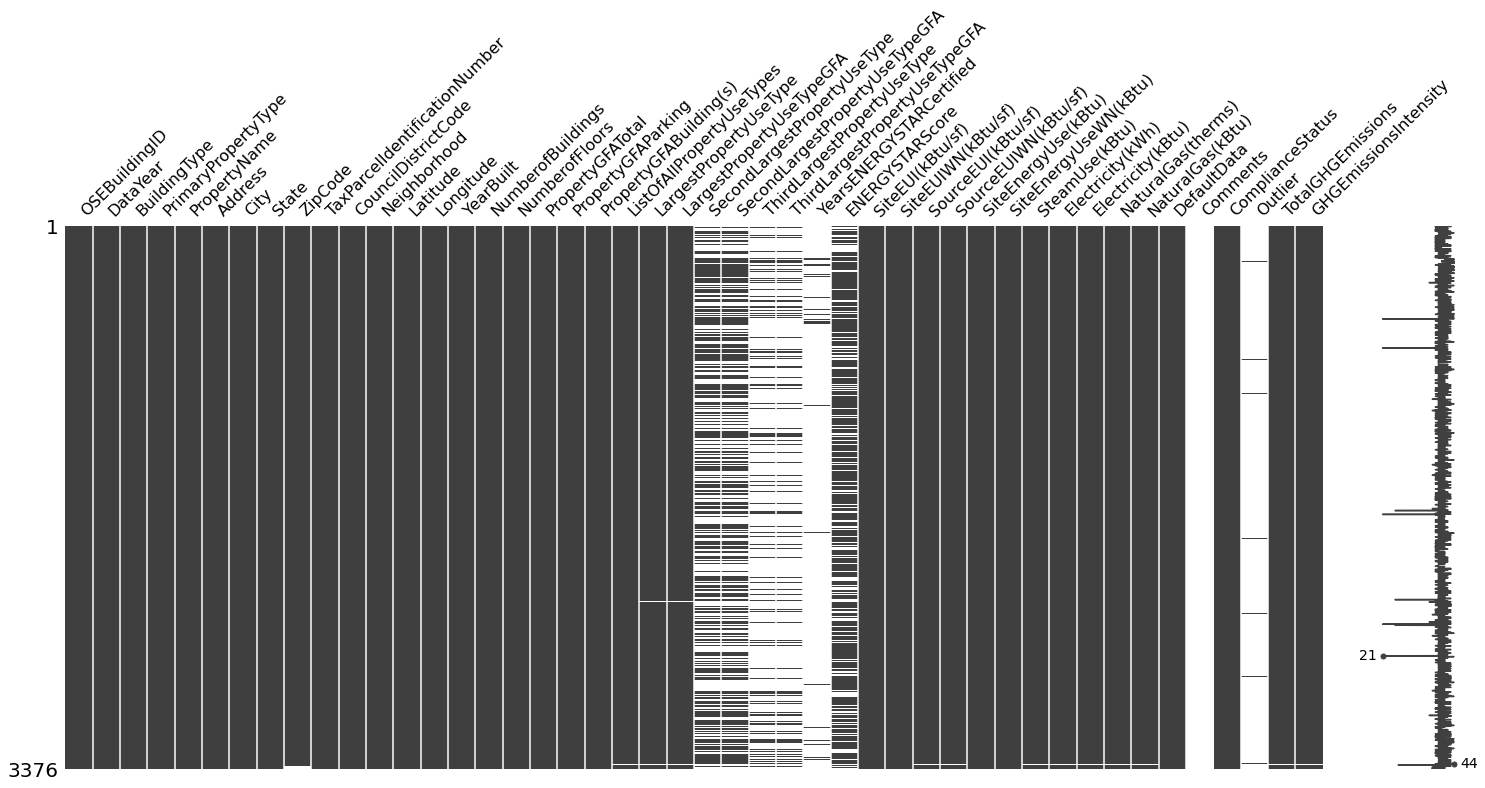

In [19]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(data_2016, True, True)

## <span style='background :lightblue' > 3.2 Comparaison des variables des données de 2015 et 2016  </span>

In [8]:
# Variables du dataset de 2015
cols_2015 = data_2015.columns.tolist()
# Variables du dataset de 2016
cols_2016 = data_2016.columns.tolist()

In [9]:
# Noms de variables en commun
cols_communes = [col for col in cols_2015 if col in cols_2016]
nb_var_communes = len(cols_communes)
print(f'Nombre de variables communes : {nb_var_communes}\n')
cols_communes

Nombre de variables communes : 37



['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

In [10]:
# Noms de variables présentes en 2015 et pas en 2016
cols_en_plus_2015 = set(cols_2015) - set(cols_2016)
nb_var_en_plus_2015 = len(cols_en_plus_2015)
print(f'Nombre de variables en plus en 2015 : {nb_var_en_plus_2015}\n')
list(cols_en_plus_2015)

Nombre de variables en plus en 2015 : 5



['GHGEmissionsIntensity(kgCO2e/ft2)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'Comment']

In [11]:
# Noms de variables présentes en 2016 et pas en 2015
cols_en_plus_2016 = set(cols_2016) - set(cols_2015)
nb_var_en_plus_2016 = len(cols_en_plus_2016)
print(f'Nombre de variables en plus en 2016 : {nb_var_en_plus_2016}\n')
list(cols_en_plus_2016)

Nombre de variables en plus en 2016 : 9



['City',
 'Longitude',
 'State',
 'Comments',
 'TotalGHGEmissions',
 'ZipCode',
 'GHGEmissionsIntensity',
 'Address',
 'Latitude']

**Descriptif des variables ajoutées entre 2015 et 2016**
______________________________________________________________________

**Variable 'Location'**

In [12]:
data_2015['Location'][0]

'411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62305186, -122.3623121)'

**Variable Location : Longitude et Latitude dans les données 2015**

In [13]:
# On intégre la latitude et la longitude du batiment, obtenus à partir de la colonne 'Location'
latitudes = []
longitudes = []
for loc in data_2015["Location"]:
    latitudes.append(re.findall(r'\d+\.\d+', loc)[0])
    longitudes.append(re.findall(r'\d+\.\d+', loc)[1])

data_2015.drop(columns=['Location'], inplace=True)
data_2015["Longitude"] = longitudes
data_2015["Latitude"] = latitudes

In [14]:
data_2016['Latitude'].sample(5).to_list()

[47.65996, 47.56489, 47.54362, 47.57934, 47.59416]

In [15]:
fonctions_data.stat_descriptives(data_2016,['Latitude']).T

0
Variable name   Latitude
Mean           47.624033
Median         47.618675
Skew            0.140045
Kurtosis        -0.14116
Variance         0.00228
Stdev           0.047751
min             47.49917
25%             47.59986
50%            47.618675
75%            47.657115
max             47.73387

**Constat:**
- La variable **Latitude** des données de 2016 correspond à l'objet 'Latitude' de la variable **Location** de 2015

Détail de la variable 'Longitude'

In [16]:
data_2016['Longitude'].sample(5).to_list()

[-122.31468, -122.31942, -122.33337, -122.3264, -122.35571]

In [97]:
fonctions_data.stat_descriptives(data_2016,['Longitude']).T

0
Variable name   Longitude
Mean          -122.334795
Median        -122.332495
Skew            -0.137526
Kurtosis         0.262398
Variance          0.00074
Stdev            0.027199
min            -122.41425
25%           -122.350662
50%           -122.332495
75%           -122.319407
max           -122.220966

In [98]:
data_2016[['Address', 'City', 'ZipCode', 'State']].sample(5)

Address     City  ZipCode State
2327     11314 25th Ave NE  Seattle  98103.0    WA
2189  1701 First Ave South  Seattle  98134.0    WA
442    1241 Eastlake Ave E  Seattle  98102.0    WA
2297       700 E Mercer St  Seattle  98102.0    WA
2819         911 N 73rd St  Seattle  98103.0    WA

Constat:

La variable **Longitude** des données de 2016 correspond à l'objet **'Longitude'** de la variable Location de 2015

**Variables 'GHGEmissions(MetricTonsCO2e)' de 2015 similaires à 'TotalGHGEmissions' de 2016 ?**

In [99]:
data_2015['GHGEmissions(MetricTonsCO2e)'].sample(5).to_list()

[76.58, 464.77, 3.95, 266.78, 34.38]

In [100]:
# pour un numéro de parcelle particulier 5247800955
data_2015[data_2015['TaxParcelIdentificationNumber']
          == '5247800955']['GHGEmissions(MetricTonsCO2e)']

2    101.09
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [101]:
fonctions_data.stat_descriptives(data_2015,['GHGEmissions(MetricTonsCO2e)']).T

0
Variable name  GHGEmissions(MetricTonsCO2e)
Mean                             110.094102
Median                                32.74
Skew                              17.121821
Kurtosis                          401.52852
Variance                      167599.104291
Stdev                            409.388696
min                                     0.0
25%                                   9.265
50%                                   32.74
75%                                 88.6425
max                                11824.89

In [102]:
data_2016['TotalGHGEmissions'].sample(5).to_list()

[25.44, 8.73, 17.12, 219.93, 5.09]

In [103]:
# pour le même numéro de parcelle particulier 5247800955
data_2016[data_2016['TaxParcelIdentificationNumber']
          == '5247800955']['TotalGHGEmissions']

2712    105.97
Name: TotalGHGEmissions, dtype: float64

In [104]:
fonctions_data.stat_descriptives(data_2016,['TotalGHGEmissions']).T

0
Variable name  TotalGHGEmissions
Mean                  119.723971
Median                     33.92
Skew                   19.481875
Kurtosis              474.892223
Variance           290253.937206
Stdev                 538.752204
min                         -0.8
25%                        9.495
50%                        33.92
75%                        93.94
max                     16870.98

**Conclusion:**

les statistiques descriptives entre les 2 variables ne semblent proches entre elles.
le taux pour un numéro de parcelle commun est de **101.09** en 2015 et **105.97** en 2016 donc ces taux semblent également proches.
La variable **'TotalGHGEmissions'** de 2016 correspond à la variable **'GHGEmissions(MetricTonsCO2e)'** de 2015 : on renomme la variable de 2015 par celle de 2016.

**Renommage de la variable 'GHGEmissions(MetricTonsCO2e)' du jeu de données de 2015  en 'TotalGHGEmissions'**

In [17]:
# Renomme la variable 'GHGEmissions(MetricTonsCO2e)' en 'TotalGHGEmissions'
data_2015.rename(
    columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'}, inplace=True)

In [18]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


**Comparaison entre la variable 'GHGEmissionsIntensity(kgCO2e/ft2)' de 2015 avec la variable 'GHGEmissionsIntensity' de 2016**

In [19]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].sample(5).to_list()

[0.62, 0.21, 1.33, 0.11, 1.17]

In [20]:
# pour un numéro de parcelle particulier 5247800955
data_2015[data_2015['TaxParcelIdentificationNumber']
          == '5247800955']['GHGEmissionsIntensity(kgCO2e/ft2)']

2    0.98
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [21]:
fonctions_data.stat_descriptives(data_2015,['GHGEmissionsIntensity(kgCO2e/ft2)']).T

0
Variable name  GHGEmissionsIntensity(kgCO2e/ft2)
Mean                                    0.985339
Median                                      0.46
Skew                                    5.302763
Kurtosis                               55.403236
Variance                                2.679527
Stdev                                   1.636926
min                                          0.0
25%                                         0.08
50%                                         0.46
75%                                         1.18
max                                        31.38

In [110]:
data_2016['GHGEmissionsIntensity'].sample(5).to_list()

[0.32, 0.6, 0.34, 0.17, 1.82]

In [22]:
# pour un numéro de parcelle particulier 5247800955
data_2016[data_2016['TaxParcelIdentificationNumber']
          == '5247800955']['GHGEmissionsIntensity']

2712    1.17
Name: GHGEmissionsIntensity, dtype: float64

In [112]:
fonctions_data.stat_descriptives(data_2016,['GHGEmissionsIntensity']).T

0
Variable name  GHGEmissionsIntensity
Mean                        1.175916
Median                          0.61
Skew                        5.593145
Kurtosis                   57.372156
Variance                    3.316701
Stdev                       1.821181
min                            -0.02
25%                             0.21
50%                             0.61
75%                             1.37
max                            34.09

**Conclusion:**

les statistiques descriptives entre les 2 variables ne semblent proches entre elles. le taux pour un numéro de parcelle commun est de **0.98** en 2015 et **1.17** en 2016 donc ces taux semblent également proches. La variable **'GHGEmissionsIntensity'** de 2016 correspond à la variable **'GHGEmissionsIntensity(kgCO2e/ft2)'** de 2015 : on renomme la variable de 2015 par celle de 2016.

**Renommage de la variable 'GHGEmissionsIntensity(kgCO2e/ft2)' du jeu de données de 2015 en 'GHGEmissionsIntensity'**

In [23]:
# Renomme la variable 'GHGEmissionsIntensity(kgCO2e/ft2)' en 'TotalGHGEmissions'
data_2015.rename(columns={
                 'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'}, inplace=True)

In [24]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


**Variables 'Comment' de 2015 équivaut à 'comments' de 2016 ?**

In [25]:
data_2015[data_2015['Comment'].notna().to_list()]['Comment']

393     Under construction starting 6/2013 (old buildi...
411     Part of McKinstry's campus, property operates ...
541     One of two office buildings on McKinstry's cam...
905     Construction completed in mid 2015. The buildi...
981     Part of McKinstry’s campus, this remodeled war...
1500    Under construction starting 6/2013 (old buildi...
1514    Under construction starting 6/2015 (old buildi...
1813    Under construction starting 6/2013 (old buildi...
2107    Part of McKinstry's campus, the office space f...
2224    Under construction starting 09/2014 (old build...
2330    Property now has two buildings: Thornton Creek...
2358    Part of McKinstry's campus, property includes ...
2765    Recent energy efficiency upgrades include repl...
Name: Comment, dtype: object

In [26]:
# Pas de commentaire en 2016
data_2016['Comments'].notna().sum()

0

**Conclusion:**

La variable **'Comments'** de 2016 correspond à la variable **Comment** de 2015 : on renomme la variable de 2015 par celle de 2016.

**Renommage de la colonne 'Comment'**

In [27]:
data_2015 = data_2015.rename(columns={'Comment': 'Comments'})

In [28]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


**Ajout d'une variable vide '' dans le jeu de données de 2016**

In [29]:
# Ajout variable 'OtherFuelUse'
data_2016['OtherFuelUse(kBtu)'] = pd.Series([], dtype='float64')

In [30]:
# Dimension des données - 2016

print ("Le dataset compte {} lignes et {} variables".format(df_2016.shape[0], df_2016.shape[1]))

Le dataset compte 3376 lignes et 46 variables


**Ajout de la variable 'ZipCode' dans le jeu de données de 2015**

In [31]:
#Ajout de la variable ZipCode 
data_2015['ZipCode'] = data_2016['ZipCode']

In [32]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


**Ajout de la variable 'Address' dans le jeu de données de 2015**

In [33]:
#Ajout de la variable'Address' 
data_2015['Address'] = data_2016['Address']

In [34]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(df_2015.shape[0], df_2015.shape[1]))

Le dataset compte 3340 lignes et 42 variables


**Suppression des variables non communes**

In [35]:
# Suppression des dernières colonnes de 2016
data_2016.drop(columns=[col for col in data_2016 if col not in data_2015],
               inplace=True)

**Vérification des variables de 2015 et 2016**

In [36]:
# Noms de variables présentes en 2015 et pas en 2016
cols_en_plus_2015 = set(data_2015) - set(data_2016)
nb_var_en_plus_2015 = len(cols_en_plus_2015)
print(f'Nombre de variables en plus en 2015 : {nb_var_en_plus_2015}\n')

Nombre de variables en plus en 2015 : 0



In [37]:
# Noms de variables présentes en 2016 et pas en 2015
cols_en_plus_2016 = set(data_2016) - set(data_2015)
nb_var_en_plus_2016 = len(cols_en_plus_2016)
print(f'Nombre de variables en plus en 2016 : {nb_var_en_plus_2016}\n')

Nombre de variables en plus en 2016 : 0



**Conclusion :**

La correction des variables dans les 2 jeux de données sont effectuées.

In [38]:
data_2015[data_2015['OSEBuildingID'] == 692]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
382            692      2015  NonResidential               Other   

     PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
382  2323 ELLIOTT                    6780950000                    7   

    Neighborhood  YearBuilt  NumberofBuildings  ...  TotalGHGEmissions  \
382     DOWNTOWN       1983                  1  ...              39.41   

     GHGEmissionsIntensity  DefaultData  Comments ComplianceStatus Outlier  \
382                   0.05           No       NaN        Compliant     NaN   

       Longitude     Latitude  ZipCode           Address  
382  122.3490938  47.61222215  98119.0  1900 15th Ave W.  

[1 rows x 45 columns]

In [39]:
data_2016[data_2016['OSEBuildingID'] == 692]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
509            692      2016  NonResidential               Other   

     PropertyName              Address  ZipCode TaxParcelIdentificationNumber  \
509  2323 Elliott  2323 Elliott Avenue  98121.0                    6780950000   

     CouncilDistrictCode Neighborhood  ...  Electricity(kBtu)  \
509                    7     DOWNTOWN  ...          5233553.0   

     NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
509                 0.0               0.0        False       NaN   

     ComplianceStatus  Outlier  TotalGHGEmissions GHGEmissionsIntensity  \
509         Compliant      NaN              36.49                  0.13   

    OtherFuelUse(kBtu)  
509                NaN  

[1 rows x 45 columns]

**Comparaison des types de données**

In [40]:
pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings  ... TotalGHGEmissions GHGEmissionsIntensity DefaultData  \
0             int64  ...           float64               float64      object   
1           float64  ...           float64               float64        bool   

  Comments ComplianceStatus Outlier Longitude Latitude  ZipCode Address  
0   object           object  object    object   object  float64  object  
1  float64           object  object   float64  float64  float64  object  

[2 rows x 45 columns]

**Types de variables à modifier**:

- Jeu de données 2015


  >- **'DefaultData'** contient des 'Yes' et 'No': changer en booléen
  >- **'DataYear'** passer en str.
  >- **'CouncilDistrictCode'** passer en str et en type object.
  >- **'PropertyName'** en majuscule.
  >- **'NumberofBuildings'** passer de float64 à int32.
  >- **'NumberofFloors'** passer de float64 à int32.
  >-**'ZipCode'** passer de float64 en str type object.
  
- Jeu de données 2016


  >- **'PropertyName'** en majuscule.
  >- **'NumberofBuildings'** passer de float64 à int32.
  >- **'Comments'** passer de float64 à object.
  >- **'DataYear'** passer en str.
  >- **'CouncilDistrictCode'** passer en str et en type object.
  >- **'ZipCode** passer de float64 en str type object.

  
  

In [41]:
# Jeu de données 2015
# ------------------------------------------------------------------------
# 'DefaultData' contient 'No' et 'Yes' ==> à transformer en booléen.
data_2015['DefaultData'] = data_2015['DefaultData'].map(
    {'No': False, 'Yes': True}).astype('bool')

# 'DataYear' passer en str
data_2015['DataYear'] = data_2015['DataYear'].apply(str)

# 'CouncilDistrictCode' passer en str et en type object
data_2015['CouncilDistrictCode'] = data_2015['CouncilDistrictCode'].apply(str).astype('object')

# City en majuscule
data_2015['PropertyName'] = data_2015['PropertyName'].apply(lambda x: x.upper().strip())

# 'NumberofBuildings' passer de float64 en int32
data_2015['NumberofBuildings'] = data_2015['NumberofBuildings'].fillna(0)
data_2015['NumberofBuildings'] = data_2015['NumberofBuildings'].astype('int32')

# 'NumberofFloors' passer de float64 en int32
data_2015['NumberofFloors'] = data_2015['NumberofFloors'].fillna(0)
data_2015['NumberofFloors'] = data_2015['NumberofFloors'].astype('int32')

# 'Latitude' passer de object en float32
# 'Longitude' passer de object en float32
data_2015[['Latitude', 'Longitude']] = data_2015[['Latitude', 'Longitude']].astype('float32')

# 'ZipCode' passer de float64 en int32
data_2015['ZipCode'] = data_2015['ZipCode'].astype('object').apply(lambda x: str(x).replace('.0', ''))

In [42]:
# Jeu de données 2016
# ------------------------------------------------------------------------
# City en majuscule
data_2016['PropertyName'] = data_2016['PropertyName'].apply(lambda x: x.upper().strip())

# 'NumberofBuildings' passer de float64 en int32
data_2016['NumberofBuildings'] = data_2016['NumberofBuildings'].fillna(0)
data_2016['NumberofBuildings'] = data_2016['NumberofBuildings'].astype('int32')

# 'NumberofFloors' passer de float64 en int32
data_2016['NumberofFloors'] = data_2016['NumberofFloors'].fillna(0)
data_2016['NumberofFloors'] = data_2016['NumberofFloors'].astype('int32')

# Comments passer de float64 à object
data_2016['Comments'] = data_2016['Comments'].astype('object')

# 'DataYear' passer en str
data_2016['DataYear'] = data_2016['DataYear'].apply(str)

# 'CouncilDistrictCode' passer en str et en type object
data_2016['CouncilDistrictCode'] = data_2016['CouncilDistrictCode'].apply(str).astype('object')

# 'Latitude' passer de object en float32
# 'Longitude' passer de object en float32
data_2016[['Latitude', 'Longitude']] = data_2016[['Latitude', 'Longitude']].astype('float32')

# 'ZipCode' passer de float64 en int32
data_2016['ZipCode'] = data_2016['ZipCode'].astype('object').apply(lambda x: str(x).replace('.0', ''))

In [43]:
# Vérification que tous les types sont égaux
cols_type = ['Types_2015', 'Types_2016']
df = pd.DataFrame({'Types_2015': data_2015.dtypes,
                   'Types_2016': data_2016.dtypes}, columns=cols_type)
df_test = df[df['Types_2015'] != df['Types_2016']]
if df_test.shape[0] == 0:
    print('Les types des jeux de données 2015 et 2016 sont identiques')
else:
    display(df_test)
df;

Les types des jeux de données 2015 et 2016 sont identiques


In [44]:
data_2015.sample(5)

OSEBuildingID DataYear          BuildingType  \
304             248     2015    Nonresidential COS   
2689          26857     2015  Multifamily LR (1-4)   
2284          24716     2015        NonResidential   
2004          24488     2015        NonResidential   
633           19753     2015  Multifamily LR (1-4)   

              PrimaryPropertyType                              PropertyName  \
304    Non-Refrigerated Warehouse  CITY LIGHT - SOUTH SERVICE CENTER BLDG B   
2689         Low-Rise Multifamily                       LOYAL HEIGHTS MANOR   
2284       Refrigerated Warehouse                        PACIFIC COMMERCIAL   
2004  Small- and Mid-Sized Office               HAWTHORNE HILLS PROF CENTER   
633          Low-Rise Multifamily                    NEW PACIFIC APARTMENTS   

     TaxParcelIdentificationNumber CouncilDistrictCode      Neighborhood  \
304                     7666205660                   2  GREATER DUWAMISH   
2689                    6021503395                   6           BALLARD   
2284                    7666207070                   2  GREATER DUWAMISH   
2004                    7974700160                   4         NORTHEAST   
633                      654000085                   7          DOWNTOWN   

      YearBuilt  NumberofBuildings  ...  TotalGHGEmissions  \
304        1965                  1  ...              28.70   
2689       1980                  1  ...               7.39   
2284       1937                  1  ...              25.10   
2004       1967                  1  ...               4.58   
633        1903                  1  ...              62.67   

      GHGEmissionsIntensity  DefaultData  Comments ComplianceStatus Outlier  \
304                    0.22        False       NaN        Compliant     NaN   
2689                   0.05        False       NaN        Compliant     NaN   
2284                   0.86        False       NaN        Compliant     NaN   
2004                   0.09        False       NaN        Compliant     NaN   
633                    2.23        False       NaN        Compliant     NaN   

       Longitude   Latitude  ZipCode                 Address  
304   122.331497  47.571259    98101             705 Pike St  
2689  122.387939  47.684528    98109        124 Warren Ave N  
2284  122.335480  47.589931    98125         818 NE 106TH ST  
2004  122.283325  47.668892    98108        660 S Andover St  
633   122.349609  47.615612    98053  3480 W Marginal Way SW  

[5 rows x 45 columns]

In [45]:
data_2016.sample(5)

OSEBuildingID DataYear          BuildingType    PrimaryPropertyType  \
545             738     2016        NonResidential                  Other   
523             709     2016        NonResidential           Large Office   
1736          23285     2016  Multifamily LR (1-4)   Low-Rise Multifamily   
1453          21862     2016  Multifamily HR (10+)  High-Rise Multifamily   
1311          21501     2016  Multifamily MR (5-9)   Mid-Rise Multifamily   

                      PropertyName                 Address ZipCode  \
545           UW BENJAMIN HALL IRB  616 NE Northlake Place   98105   
523           PIER 69 CORPORATE HQ        2711 Alaskan Way   98121   
1736  THE TERRACE CREST APARTMENTS          517 9th Avenue   98104   
1453                        ESCALA            1920 4th Ave   98101   
1311               L0088 - VENTANA        2100 Western Ave   98121   

     TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood  ...  \
545                     4207401365                   4    NORTHEAST  ...   
523                     7666202295                   7     DOWNTOWN  ...   
1736                    8590400755                   3         EAST  ...   
1453                    2382000000                   7     DOWNTOWN  ...   
1311                    1977200546                   7     DOWNTOWN  ...   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
545          14100771.0       115307.406300        11530741.0        False   
523          10053488.0            0.000000               0.0        False   
1736           282167.0        14395.600590         1439560.0        False   
1453         11864017.0        80333.359380         8033336.0        False   
1311          1518550.0         5258.239746          525824.0        False   

      Comments  ComplianceStatus  Outlier  TotalGHGEmissions  \
545        NaN         Compliant      NaN             710.70   
523        NaN         Compliant      NaN              70.09   
1736       NaN         Compliant      NaN              78.42   
1453       NaN         Compliant      NaN             509.36   
1311       NaN         Compliant      NaN              38.51   

     GHGEmissionsIntensity OtherFuelUse(kBtu)  
545                   4.95                NaN  
523                   0.37                NaN  
1736                  2.40                NaN  
1453                  1.06                NaN  
1311                  0.56                NaN  

[5 rows x 45 columns]

## <span style='background :lightblue' > 3.3 Concaténation données 2015 et 2016  </span>

In [46]:
# On assemble les données de 2015 et 2016, en ordonnant les id batiments
data = pd.concat([data_2015, data_2016]).sort_values('OSEBuildingID')

In [47]:
# Dimension des données - 2015

print ("Le dataset compte {} lignes et {} variables".format(data.shape[0], data.shape[1]))

Le dataset compte 6716 lignes et 45 variables


In [48]:
data.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'Longitude',
 'Latitude',
 'ZipCode',
 'Address']

**Analyse exploratoire des données**

-------------------------------------------------------------
Type de variable pour chacune des variables



OSEBuildingID                        int64
DataYear                            object
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                 object
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int32
NumberofFloors                       int32
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

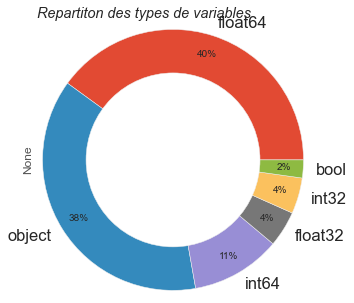

In [771]:
# Types des variables
fonctions_data.affichage_types_var(data, True, True, True)

Valeurs manquantes :43560 NaN pour 302220 données (14.41 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
Comments                                                  6703   
Outlier                                                   6600   
YearsENERGYSTARCertified                                  6487   
ThirdLargestPropertyUseType                               5560   
ThirdLargestPropertyUseTypeGFA                            5560   
SecondLargestPropertyUseType                              3478   
SecondLargestPropertyUseTypeGFA                           3478   
OtherFuelUse(kBtu)                                        3386   
ENERGYSTARScore                                           1623   
LargestPropertyUseTypeGFA                                  156   
LargestPropertyUseType                                     156   
ListOfAllPropertyUseTypes                                  136   
Electricity(kBtu)                                           19   
GHGEmissionsIntensity                                       19   
TotalGHGEmissions                                           19   
NaturalGas(kBtu)                                            19   
NaturalGas(therms)                                          19   
SourceEUIWN(kBtu/sf)                                        19   
Electricity(kWh)                                            19   
SteamUse(kBtu)                                              19   
SourceEUI(kBtu/sf)                                          19   
SiteEUI(kBtu/sf)                                            17   
SiteEnergyUseWN(kBtu)                                       16   
SiteEUIWN(kBtu/sf)                                          16   
SiteEnergyUse(kBtu)                                         15   
TaxParcelIdentificationNumber                                2   

                                 % de valeurs manquantes  
Comments                                           99.81  
Outlier                                            98.27  
YearsENERGYSTARCertified                           96.59  
ThirdLargestPropertyUseType                        82.79  
ThirdLargestPropertyUseTypeGFA                     82.79  
SecondLargestPropertyUseType                       51.79  
SecondLargestPropertyUseTypeGFA                    51.79  
OtherFuelUse(kBtu)                                 50.42  
ENERGYSTARScore                                    24.17  
LargestPropertyUseTypeGFA                           2.32  
LargestPropertyUseType                              2.32  
ListOfAllPropertyUseTypes                           2.03  
Electricity(kBtu)                                   0.28  
GHGEmissionsIntensity                               0.28  
TotalGHGEmissions                                   0.28  
NaturalGas(kBtu)                                    0.28  
NaturalGas(therms)                                  0.28  
SourceEUIWN(kBtu/sf)                                0.28  
Electricity(kWh)                                    0.28  
SteamUse(kBtu)                                      0.28  
SourceEUI(kBtu/sf)                                  0.28  
SiteEUI(kBtu/sf)                                    0.25  
SiteEnergyUseWN(kBtu)                               0.24  
SiteEUIWN(kBtu/sf)                                  0.24  
SiteEnergyUse(kBtu)                                 0.22  
TaxParcelIdentificationNumber                       0.03

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


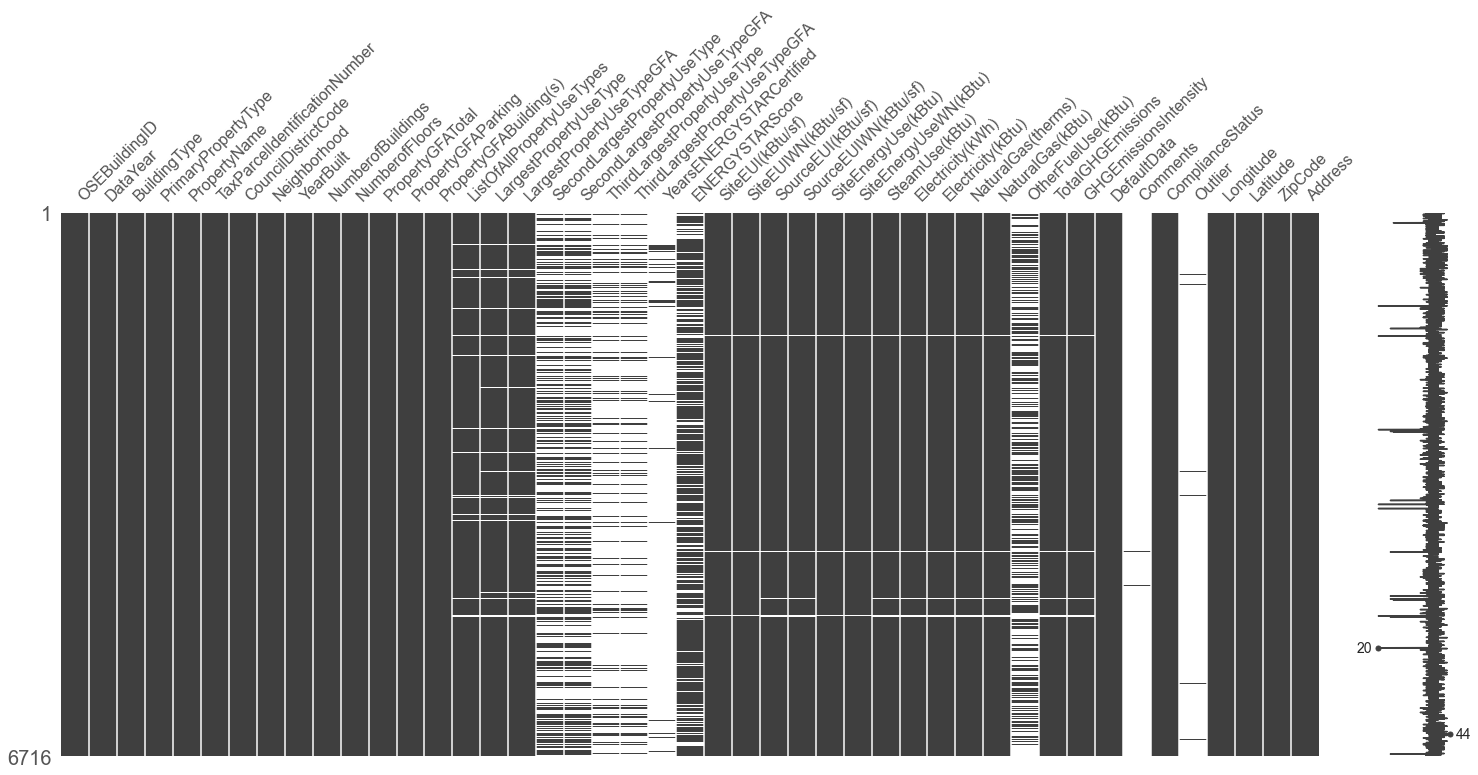

In [772]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(data, True, True)

# <span style='background :lightgreen' > 4. Nettoyage du dataset  </span>

## <span style='background :lightblue' > 4.1 Descriptif sur les variables retenues, et justifications  </span>

#### <span style='background :gold' > Usage de la propriété  </span>

| Variable | Description| Justification  | 
|:-------------|:-----------|:------|
| **BuildingType** |Type de bâtiment : campus, non résidentiel... | Sélection sur les zones non résidentielles | 
|**PrimaryPropertyType** |Utilisation principale d'une propriété (p. Ex. Bureau, magasin de détail)    | Connaissance sur la durée d'occupation(24h/24)   |
|**LargestPropertyUseType**|Zone de propriété la plus utilisée (par exemple, bureau d'entreprises,...)|Informations supplémentaires sur les propriétés|
|**SecondLargestPropertyUseType**|Seconde zone de propriété la plus utilisée|Info supplémenataires|
|**ThirdLargestPropertyUseType**|Troisième zone de propriété la plus utilisée|Info supplémentaires|
|**Comments**|Commentaires d'un propriétaire ou d'un agent d'immeuble sur la consommation d'énergie du bâtiment|Avis client sur le batiment concerné|
|**Outlier**|Valeur aberrante ou non sur une propriété|Valeur interessante sur une propriété|



#### <span style='background :gold' > Localisation de la propriété  </span>

| Variable | Description| Justification  | 
|:-------------|:-----------|:------|
| **CouncilDistrictCode** |Code district de la ville associé à un membre du conseil| Représentation géographique |
|**Neighborhood**|Zone de voisinage de la propriété| Représentation géographique|
|**Latitude**|Latitude de propriété| Représentation géographique|
|**Longitude**|Longitude de propriété| Représentation géographique|
|**Address**|Adresse de la propriété| Représentation géographique|
|**ZipCode**|Code postal de propriété| Représentation géographique|


#### <span style='background :gold' > Descriptif technique sur le bâtiment (dimension, nombre de pièces, surface, ...)  </span>

| Variable | Description| Justification  | 
|:-------------|:-----------|:------|
| **NumberofBuildings** |Nombre de bâtiments inclus dans le rapport de la propriété| Caractéristique pouvant etre inclus dans un modèle (Feature engineering)|
|**NumberofFloors**|Nomnbre d'étages|Info supplémentaires|
|**PropertyGFABuilding(s)**|Superficie totale en pieds carrés entre les surfaces extérieures des murs d'enceinte de la propriété. Cela comprend toutes les zones à l'intérieur du ou des bâtiments, telles que l'espace des locataires, les espaces communs, etc|Info intéressante et bien rensignée|

#### <span style='background :gold' > Descriptif energetique du bâtiment </span>

| Variable | Description| Justification  | 
|:-------------|:-----------|:------|
| **ENERGYSTARScore** |la performance énergétique globale d'une propriété, comprise entre 1 et 100, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations du bâtiment et les opérations|Observation de son influence dans son ajout dans le modèle, avec des données relativement renseignées (75,83% de données complètes)|
|**SiteEnergyUseWN(kBtu)**|La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie|**Variable cible n°2 de la problématique**|
|**SteamUse(kBtu)**| Quantité annuelle de vapeur de quartier consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu)|Caractéristique interessante pour le modèle (Feature engineering)|
|**Electricity(kBtu)**|La quantité annuelle d'électricité consommée par la propriété sur place, incluant également l'énergie additionnelle, et des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu)|Caractéristique quantitative interessante pour le modèle (Feature engineering)|
|**NaturalGas(kBtu)**| Quantité annuelle de gaz naturel consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu)|Caractéristique quantitative interessante pour le modèle (Feature engineering)|
|**OtherFuelUse(kBtu)**|Autre type d'energie consommée, en unités thermiques britanniques(kBtu)|Caractéristique quantitative interessante pour le modèle (Feature engineering)|

#### <span style='background :gold' > Informations sur les émissions de gaz à effet de serre (GES) du bâtiment  </span>

| Variable | Description| Justification  | 
|:-------------|:-----------|:------|
| **TotalGHGEmissions**|La quantité totale d'émissions de gaz à effet de serre|**Variable cible n°1 de la problématique**|

**Selection des variables**

Après avoir analyse les variables pertinentes, on peut filter le dataset

In [49]:
# Suppression des variables inutiles après l'analyse 
cols_a_suppr = ['PropertyName','TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified',
                'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
                'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'Electricity(kWh)', 'NaturalGas(therms)']
data.drop(cols_a_suppr, axis=1, inplace=True)

In [50]:
# Dimension du dataset

print ("Le dataset compte {} lignes et {} variables".format(data.shape[0], data.shape[1]))

Le dataset compte 6716 lignes et 36 variables


In [51]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'Longitude',
       'Latitude', 'ZipCode', 'Address'],
      dtype='object')

## <span style='background :lightblue' > 4.2 Filage du dataset  </span>

#### <span style='background :gold' > **Doublons des variables ?**  </span>

_Variable 'DataYear'_

In [52]:
print(data['DataYear'].nunique())
data['DataYear'].unique().tolist()

2


['2016', '2015']

_Variable 'BuildingType'_

In [53]:
pd.DataFrame(data['BuildingType'].unique(), columns=['BuildingType']).sort_values(by='BuildingType')

BuildingType
4                Campus
6  Multifamily HR (10+)
5  Multifamily LR (1-4)
2  Multifamily MR (5-9)
0        NonResidential
1    Nonresidential COS
7     Nonresidential WA
3     SPS-District K-12

In [54]:
sorted(data['BuildingType'].unique().tolist())

['Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12']

In [55]:
# Renommer 'Nonresidential COS' et 'Nonresidential WA' en 'NonResidential'
data['BuildingType'] = data['BuildingType'].str.replace(
    'Nonresidential COS', 'NonResidential')
data['BuildingType'] = data['BuildingType'].str.replace(
    'Nonresidential WA', 'NonResidential')
sorted(data['BuildingType'].unique().tolist())

['Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'SPS-District K-12']

_Variable 'PrimaryPropertyType'_

In [56]:
print(data['PrimaryPropertyType'].nunique())
data['PrimaryPropertyType'].unique().tolist()

32


['Hotel',
 'Other',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'K-12 School',
 'University',
 'College/University',
 'Small- and Mid-Sized Office',
 'Self-Storage Facility',
 'Self-Storage Facility\n',
 'Distribution Center',
 'Warehouse',
 'Large Office',
 'Retail Store',
 'Low-Rise Multifamily',
 'Senior Care Community',
 'Medical Office',
 'Hospital',
 'Residence Hall/Dormitory',
 'Residence Hall',
 'Non-Refrigerated Warehouse',
 'Distribution Center\n',
 'SPS-District K-12',
 'Worship Facility',
 'Supermarket/Grocery Store',
 'Supermarket / Grocery Store',
 'Laboratory',
 'Refrigerated Warehouse',
 'High-Rise Multifamily',
 'Restaurant\n',
 'Restaurant',
 'Office']

Nous avons 32 types d'utilisation principale d'une propriété(Hotel, Université,...), dont certaines résidences effectuant le meme role (doublons)

In [57]:
# Correction suppression '\n' pour 'Distribution Center\n', 'Restaurant\n',
# Self-Storage Facility\n
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.replace('\n', '')
# Remplace 'Supermarket / Grocery Store' par 'Supermarket/Grocery Store'
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.replace(
    'Supermarket / Grocery Store', 'Supermarket/Grocery Store')
sorted(data['PrimaryPropertyType'].unique().tolist())

['College/University',
 'Distribution Center',
 'High-Rise Multifamily',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

In [58]:
print(data['CouncilDistrictCode'].nunique())
sorted(data['CouncilDistrictCode'].unique().tolist())

7


['1', '2', '3', '4', '5', '6', '7']

In [59]:
print(data['Neighborhood'].nunique())
sorted(data['Neighborhood'].unique().tolist())

19


['BALLARD',
 'Ballard',
 'CENTRAL',
 'Central',
 'DELRIDGE',
 'DELRIDGE NEIGHBORHOODS',
 'DOWNTOWN',
 'Delridge',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'North',
 'Northwest',
 'SOUTHEAST',
 'SOUTHWEST']

In [60]:
# Mise en majuscules
data['Neighborhood'] = data['Neighborhood'].apply(lambda x: x.upper().strip())
# Remplace 'DELRIDGE NEIGHBORHOODS' par 'DELRIDGE'
data['Neighborhood'] = data['Neighborhood'].replace(
    'DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
sorted(data['Neighborhood'].unique().tolist())

['BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST']

In [61]:
print(data['NumberofBuildings'].nunique())
sorted(data['NumberofBuildings'].unique().tolist())
# 111 bâtiments, erreur? Non campus universitaire
# 0 bâtiment, erreur? ou seulement un parking ? A vérifier sur google map.

18


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 23, 27, 39, 111]

In [62]:
# Bâtiments sans bâtiments
data[data['NumberofBuildings'] == 0]

OSEBuildingID DataYear          BuildingType  \
63               89     2016        NonResidential   
76              113     2016        NonResidential   
160             257     2016        NonResidential   
201             322     2016        NonResidential   
241             366     2016        NonResidential   
...             ...      ...                   ...   
3184          49729     2016  Multifamily MR (5-9)   
3202          49779     2016  Multifamily MR (5-9)   
3205          49783     2016        NonResidential   
3232          49862     2016        NonResidential   
3259          49924     2016        NonResidential   

              PrimaryPropertyType CouncilDistrictCode           Neighborhood  \
63                 Medical Office                   3                   EAST   
76    Small- and Mid-Sized Office                   7  MAGNOLIA / QUEEN ANNE   
160                     Warehouse                   1       GREATER DUWAMISH   
201                  Large Office                   7               DOWNTOWN   
241   Small- and Mid-Sized Office                   4              NORTHEAST   
...                           ...                 ...                    ...   
3184         Mid-Rise Multifamily                   7  MAGNOLIA / QUEEN ANNE   
3202         Mid-Rise Multifamily                   3                CENTRAL   
3205                   Laboratory                   7             LAKE UNION   
3232                        Other                   7  MAGNOLIA / QUEEN ANNE   
3259  Small- and Mid-Sized Office                   3                   EAST   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  ...  \
63         1965                  0               3            179014  ...   
76         1986                  0               2             66240  ...   
160        1916                  0               4             79600  ...   
201        1968                  0               3            100734  ...   
241        1961                  0               5             99005  ...   
...         ...                ...             ...               ...  ...   
3184       2012                  0               7            119219  ...   
3202       2013                  0               6             38407  ...   
3205       2013                  0               8            339591  ...   
3232       1962                  0               1             29000  ...   
3259       1912                  0               2             64820  ...   

      TotalGHGEmissions  GHGEmissionsIntensity DefaultData Comments  \
63               430.84                   2.41       False      NaN   
76                29.04                   0.44       False      NaN   
160               16.81                   0.21       False      NaN   
201               68.24                   0.68       False      NaN   
241              119.03                   1.20       False      NaN   
...                 ...                    ...         ...      ...   
3184              87.18                   0.73       False      NaN   
3202               9.95                   0.26       False      NaN   
3205            1088.25                   3.20       False      NaN   
3232              54.98                   1.90       False      NaN   
3259              29.40                   0.45       False      NaN   

      ComplianceStatus Outlier   Longitude   Latitude  ZipCode  \
63           Compliant     NaN -122.321404  47.612438    98122   
76           Compliant     NaN -122.348373  47.623909    98109   
160          Compliant     NaN -122.357468  47.575069    98134   
201          Compliant     NaN -122.351219  47.617569    98121   
241          Compliant     NaN -122.316261  47.660999    98105   
...                ...     ...         ...        ...      ...   
3184         Compliant     NaN -122.342781  47.625999    98109   
3202         Compliant     NaN -122.305611  47.599461    98144   
3205         Compliant  

In [63]:
print(data['NumberofFloors'].nunique())
sorted(data['NumberofFloors'].unique().tolist());

50


In [64]:
data['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15,  6, 25,  9, 33, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 26, 27, 76, 31, 99, 38, 39, 32, 40])

In [65]:
data[data['NumberofFloors'] == 40]
# église sans étage ==> erreur

OSEBuildingID DataYear          BuildingType    PrimaryPropertyType  \
3256          50057     2015  Multifamily HR (10+)  High-Rise Multifamily   
3333          50057     2016  Multifamily HR (10+)  High-Rise Multifamily   

     CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  \
3256                   7     DOWNTOWN       2015                  1   
3333                   7     DOWNTOWN       2015                  1   

      NumberofFloors  PropertyGFATotal  ...  TotalGHGEmissions  \
3256              40            319481  ...             627.97   
3333              40            319481  ...             395.26   

      GHGEmissionsIntensity DefaultData Comments  ComplianceStatus Outlier  \
3256                   1.89       False      NaN         Compliant     NaN   
3333                   1.24       False      NaN         Compliant     NaN   

       Longitude   Latitude  ZipCode        Address  
3256  122.337708  47.616497    98101  800 Seneca St  
3333 -122.337349  47.616520    98121   2030 8th Ave  

[2 rows x 36 columns]

In [66]:
print(data['ListOfAllPropertyUseTypes'].nunique())
data['ListOfAllPropertyUseTypes'].unique().tolist()

488


['Hotel',
 'Hotel, Parking, Restaurant',
 'Hotel, Parking, Swimming Pool',
 'Police Station',
 'Other - Entertainment/Public Assembly',
 'Multifamily Housing',
 nan,
 'Hotel, Parking',
 'Data Center, Library, Parking',
 'Fitness Center/Health Club/Gym, Office, Swimming Pool',
 'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
 'Courthouse',
 'Other',
 'K-12 School',
 'College/University',
 'Automobile Dealership',
 'Hotel, Parking, Retail Store, Swimming Pool',
 'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
 'Self-Storage Facility',
 'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
 'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
 'Non-Refrigerated Warehouse, Office',
 'Office, Other - Education',
 'Office, Self-Storage Facility, Vocational School',
 'Data Center, Office, Retail Store',
 'Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc

In [67]:
print(data['LargestPropertyUseType'].nunique())
data['LargestPropertyUseType'].unique().tolist()

57


['Hotel',
 'Police Station',
 'Other - Entertainment/Public Assembly',
 'Multifamily Housing',
 nan,
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Courthouse',
 'Other',
 'K-12 School',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse',
 'Other - Mall',
 'Retail Store',
 'Senior Care Community',
 'Medical Office',
 'Hospital (General Medical & Surgical)',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Other - Lodging/Residential',
 'Residence Hall/Dormitory',
 'Other/Specialty Hospital',
 'Financial Office',
 'Distribution Center',
 'Parking',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Convention Center',
 'Urgent Care/Clinic/Other Outpatient',
 'Other - Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Other - Recreation',
 'Lifestyle Center',
 'Other

In [68]:
print(data['SecondLargestPropertyUseType'].nunique())
data['SecondLargestPropertyUseType'].unique().tolist()

50


[nan,
 'Parking',
 'Office',
 'Restaurant',
 'K-12 School',
 'Laboratory',
 'Refrigerated Warehouse',
 'Non-Refrigerated Warehouse',
 'Other - Education',
 'Vocational School',
 'Retail Store',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Other - Entertainment/Public Assembly',
 'Data Center',
 'Swimming Pool',
 'Other',
 'Courthouse',
 'Residence Hall/Dormitory',
 'Distribution Center',
 'Self-Storage Facility',
 'Other - Services',
 'Movie Theater',
 'Supermarket/Grocery Store',
 'Medical Office',
 'Other - Recreation',
 'Convenience Store without Gas Station',
 'Fitness Center/Health Club/Gym',
 'Performing Arts',
 'College/University',
 'Other - Restaurant/Bar',
 'Adult Education',
 'Enclosed Mall',
 'Multifamily Housing',
 'Bar/Nightclub',
 'Financial Office',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Manufacturing/Industrial Plant',
 'Other - Lodging/Residential',
 'Bank Branch',
 'Food Service',
 'Worship Facility',
 'Senior Care Community',
 'Hotel',
 

Un regroupement des catégories devra etre effectué(hopitaux, bureaux,...)

In [69]:
print(data['ThirdLargestPropertyUseType'].nunique())
data['ThirdLargestPropertyUseType'].unique().tolist()

45


[nan,
 'Restaurant',
 'Swimming Pool',
 'Data Center',
 'Office',
 'Retail Store',
 'Other - Entertainment/Public Assembly',
 'Non-Refrigerated Warehouse',
 'Other',
 'Distribution Center',
 'Food Service',
 'Other - Services',
 'Medical Office',
 'Parking',
 'Other - Utility',
 'Other - Lodging/Residential',
 'K-12 School',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Pre-school/Daycare',
 'Convenience Store without Gas Station',
 'Financial Office',
 'Other - Restaurant/Bar',
 'Other - Education',
 'Multifamily Housing',
 'Laboratory',
 'Bank Branch',
 'Hotel',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Other - Recreation',
 'Self-Storage Facility',
 'Other - Technology/Science',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Fast Food Restaurant',
 'Bar/Nightclub',
 'Food Sales',
 'Supermarket/Grocery Store',
 'Other/Specialty Hospital',
 'Worship Facility',
 'Strip Mall',
 'Enclosed Mall',
 'Residence Hall/Dormitory',
 'Vocational Sc

In [70]:
# Nombre de modalités uniques par variables

pd.DataFrame(data[['BuildingType','Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].nunique(), columns = ['unique']).T

BuildingType  Neighborhood  PrimaryPropertyType  \
unique             6            13                   28   

        LargestPropertyUseType  SecondLargestPropertyUseType  \
unique                      57                            50   

        ThirdLargestPropertyUseType  
unique                           45

In [71]:
pd.DataFrame(data['PrimaryPropertyType'].unique(), columns = ['PrimaryPropertyType'])

PrimaryPropertyType
0                         Hotel
1                         Other
2          Mid-Rise Multifamily
3            Mixed Use Property
4                   K-12 School
5                    University
6            College/University
7   Small- and Mid-Sized Office
8         Self-Storage Facility
9           Distribution Center
10                    Warehouse
11                 Large Office
12                 Retail Store
13         Low-Rise Multifamily
14        Senior Care Community
15               Medical Office
16                     Hospital
17     Residence Hall/Dormitory
18               Residence Hall
19   Non-Refrigerated Warehouse
20            SPS-District K-12
21             Worship Facility
22    Supermarket/Grocery Store
23                   Laboratory
24       Refrigerated Warehouse
25        High-Rise Multifamily
26                   Restaurant
27                       Office

Meme constat que la variable précédente: 'SecondLargestPropertyUseType'

In [72]:
# Rassemblement des types de bâtiment en 10 catégories
dico_types_bat = {  # Education
    'Adult Education': 'Education',
                       'College/University': 'Education',
                       'K-12 School': 'Education',
                       'Other - Education': 'Education',
                       'Pre-school/Daycare': 'Education',
                       'Vocational School': 'Education',
                       'SPS-District K-12': 'Education',
                       'University': 'Education',

                       # Commerces-Services
                       'Automobile Dealership': 'Retails',
                       'Bar/Nightclub': 'Retails',
                       'Convenience Store without Gas Station': 'Retails',
                       'Lifestyle Center': 'Retails',
                       'Other - Mall': 'Retails',
                       'Parking': 'Retails',
                       'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Retails',
                       'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Retails',
                       'Retail Store': 'Retails',
                       'Strip Mall': 'Retails',

                       # Bureau
                       'Bank Branch': 'Office',
                       'Financial Office': 'Office',
                       'Medical Office': 'Office',
                       'Large Office': 'Office',
                       'Small- and Mid-Sized Office': 'Office',

                       # Loisirs-Cultes-Arts-Assemblées_publiques
                       'Convention Center': 'Hobbies',
                       'Fitness Center/Health Club/Gym': 'Hobbies',
                       'Movie Theater': 'Hobbies',
                       'Museum': 'Hobbies',
                       'Other - Entertainment/Public Assembly': 'Hobbies',
                       'Social/Meeting Hall': 'Hobbies',
                       'Swimming Pool': 'Hobbies',
                       'Worship Facility': 'Hobbies',
                       'Other - Recreation': 'Hobbies',
                       'Performing Arts': 'Hobbies',

                       # Services publiques
                       'Courthouse': 'Public_Services',
                       'Fire Station': 'Public_Services',
                       'Library': 'Public_Services',
                       'Other - Public Services': 'Public_Services',
                       'Police Station': 'Public_Services',
                       'Prison/Incarceration': 'Public_Services',

                       # Technologie, Sciences, Stockages
                       'Data Center': 'Technology_Science',
                       'Distribution Center': 'Technology_Science',
                       'Laboratory': 'Technology_Science',
                       'Manufacturing/Industrial Plant': 'Technology_Science',
                       'Non-Refrigerated Warehouse': 'Technology_Science',
                       'Other - Technology/Science': 'Technology_Science',
                       'Refrigerated Warehouse': 'Technology_Science',
                       'Self-Storage Facility': 'Technology_Science',
                       'Warehouse': 'Technology_Science',

                       # Nourritures
                       'Enclosed Mall': 'Foods_Sales',
                       'Fast Food Restaurant': 'Foods_Sales',
                       'Food Sales': 'Foods_Sales',
                       'Food Service': 'Foods_Sales',
                       'Other - Restaurant/Bar': 'Foods_Sales',
                       'Restaurant': 'Foods_Sales',
                       'Supermarket/Grocery Store': 'Foods_Sales',
                       'Wholesale Club/Supercenter': 'Foods_Sales',
                       'Bar/Nightclub': 'Foods_Sales',
                       'Strip Mall': 'Foods_Sales',

                       # Etablissements de santé
                       'Hospital (General Medical & Surgical)': 'Healthcare',
                       'Other/Specialty Hospital': 'Healthcare',
                       'Outpatient Rehabilitation/Physical Therapy': 'Healthcare',
                       'Senior Care Community': 'Healthcare',
                       'Urgent Care/Clinic/Other Outpatient': 'Healthcare',
                       'Hospital': 'Healthcare',

                       # Résidences, Hébergements
                       'Hotel': 'Residential',
                       'Multifamily Housing': 'Residential',
                       'Other - Lodging/Residential': 'Residential',
                       'Residence Hall/Dormitory': 'Residential',
                       'Residential Care Facility': 'Residential',
                       'High-Rise Multifamily': 'Residential',
                       'Low-Rise Multifamily': 'Residential',
                       'Mid-Rise Multifamily': 'Residential',
                       'Mixed Use Property': 'Residential',
                       'Residence Hall': 'Residential',

                       # Autres
                       'Other': 'Others',
                       'Other - Services': 'Others',
                       'Other - Utility': 'Others'}

# Transformation des types de bâtiment
cols_types_bat = ['PrimaryPropertyType', 'LargestPropertyUseType',
                       'SecondLargestPropertyUseType',
                       'ThirdLargestPropertyUseType']

In [73]:
# Remplacement des 10 catégories sur les variables de types de batiments

[data[cols_types_bat].replace(cle, valeur) for cle, valeur in dico_types_bat.items()]
data[cols_types_bat]


PrimaryPropertyType LargestPropertyUseType  \
0                  Hotel                  Hotel   
241                Hotel                  Hotel   
361                Hotel                  Hotel   
1                  Hotel                  Hotel   
2                  Hotel                  Hotel   
...                  ...                    ...   
3371              Office                 Office   
3372               Other     Other - Recreation   
3373               Other     Other - Recreation   
3374  Mixed Use Property     Other - Recreation   
3375  Mixed Use Property     Other - Recreation   

        SecondLargestPropertyUseType ThirdLargestPropertyUseType  
0                                NaN                         NaN  
241                              NaN                         NaN  
361                          Parking                  Restaurant  
1                            Parking                  Restaurant  
2                                NaN                         NaN  
...                              ...                         ...  
3371                             NaN                         NaN  
3372                             NaN                         NaN  
3373  Fitness Center/Health Club/Gym               Swimming Pool  
3374  Fitness Center/Health Club/Gym          Pre-school/Daycare  
3375  Fitness Center/Health Club/Gym          Pre-school/Daycare  

[6716 rows x 4 columns]

In [74]:
print(data['DefaultData'].nunique())
sorted(data['DefaultData'].unique().tolist())

2


[False, True]

In [75]:
print(data['ComplianceStatus'].nunique())
sorted(data['ComplianceStatus'].unique().tolist())

5


['Compliant',
 'Error - Correct Default Data',
 'Missing Data',
 'Non-Compliant',
 'Not Compliant']

In [76]:
print(data['Outlier'].nunique())
data['Outlier'].unique().tolist()

4


[nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier']

In [77]:
# Remplace nan par 'not'
data['Outlier'] = data['Outlier'].fillna('not')
# En minuscules
data['Outlier'] = data['Outlier'].apply(lambda x: x.lower())
# 3 catégories : 'low','high', 'not'
data['Outlier'] = data['Outlier'].map({'low outlier': 'low',
                                       'high outlier': 'high'})
data['Outlier'].fillna('not', inplace=True)
data['Outlier'].unique().tolist()

['not', 'high', 'low']

In [78]:
# Doublons sur l'identifiant unique
data['OSEBuildingID'].nunique()
# ==> des doublons sur l'identifiant unique pour les bâtiments de 2015
# présents en 2016

3432

In [79]:
# Constitution du dataframe de travail
df_2015 = data[data['DataYear'] == '2015']
df_2016 = data[data['DataYear'] == '2016']
df_var = pd.merge(df_2015, df_2016, left_on='OSEBuildingID',
                  right_on='OSEBuildingID')
df_var.shape

(3284, 71)

In [80]:
df_var.columns

Index(['OSEBuildingID', 'DataYear_x', 'BuildingType_x',
       'PrimaryPropertyType_x', 'CouncilDistrictCode_x', 'Neighborhood_x',
       'YearBuilt_x', 'NumberofBuildings_x', 'NumberofFloors_x',
       'PropertyGFATotal_x', 'PropertyGFAParking_x',
       'PropertyGFABuilding(s)_x', 'ListOfAllPropertyUseTypes_x',
       'LargestPropertyUseType_x', 'LargestPropertyUseTypeGFA_x',
       'SecondLargestPropertyUseType_x', 'SecondLargestPropertyUseTypeGFA_x',
       'ThirdLargestPropertyUseType_x', 'ThirdLargestPropertyUseTypeGFA_x',
       'ENERGYSTARScore_x', 'SiteEnergyUse(kBtu)_x', 'SiteEnergyUseWN(kBtu)_x',
       'SteamUse(kBtu)_x', 'Electricity(kBtu)_x', 'NaturalGas(kBtu)_x',
       'OtherFuelUse(kBtu)_x', 'TotalGHGEmissions_x',
       'GHGEmissionsIntensity_x', 'DefaultData_x', 'Comments_x',
       'ComplianceStatus_x', 'Outlier_x', 'Longitude_x', 'Latitude_x',
       'ZipCode_x', 'Address_x', 'DataYear_y', 'BuildingType_y',
       'PrimaryPropertyType_y', 'CouncilDistrictCode_y', '

In [82]:
# Variables quantitatives ordinales
cols_to_comp = ['LargestPropertyUseTypeGFA',
                'NumberofBuildings', 'NumberofFloors',
                'PropertyGFABuilding(s)', 'PropertyGFAParking',
                'PropertyGFATotal', 'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA', 'YearBuilt',
                'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions']
# '_x' ==> 2015, '_y' ==> 2016
for cols in df_var.columns:
    if '_x' in cols:
        df_var.rename(columns={cols: cols[:-2]+'_2015'}, inplace=True)
    if '_y' in cols:
        df_var.rename(columns={cols: cols[:-2]+'_2016'}, inplace=True)
# Variance?


for col in cols_to_comp:
    # comparaison variable_2015/variable_2016
    df_comp = df_var[[col + '_2015', col + '_2016']].dropna()
    corr, _ = stat.pearsonr(df_comp[col+'_2015'],df_comp[col+'_2016'])
    print('Pearsons correlation: variable {}: {:.3f}'.format(col,corr,_))


Pearsons correlation: variable LargestPropertyUseTypeGFA: 0.996
Pearsons correlation: variable NumberofBuildings: 0.210
Pearsons correlation: variable NumberofFloors: 1.000
Pearsons correlation: variable PropertyGFABuilding(s): 0.989
Pearsons correlation: variable PropertyGFAParking: 0.846
Pearsons correlation: variable PropertyGFATotal: 0.997
Pearsons correlation: variable SecondLargestPropertyUseTypeGFA: 0.992
Pearsons correlation: variable ThirdLargestPropertyUseTypeGFA: 0.999
Pearsons correlation: variable YearBuilt: 1.000
Pearsons correlation: variable ENERGYSTARScore: 0.885
Pearsons correlation: variable SiteEnergyUseWN(kBtu): 0.977
Pearsons correlation: variable SteamUse(kBtu): 0.981
Pearsons correlation: variable NaturalGas(kBtu): 0.985
Pearsons correlation: variable TotalGHGEmissions: 0.984


**Constat**:

La majorité des variables quantitatives sont fortement corrélés, excépté:
   - **PropertyGFAParking**
   - **ENERGYSTARScore**
   - **NumberofBuildings**


Variable _'NumberofBuildings'_:

In [83]:
# Variable 'NumberofBuildings'
df_var_NumberofBuildings = df_var[abs(
    df_var['NumberofBuildings_2015'] - df_var['NumberofBuildings_2016'])/df_var['NumberofBuildings_2015'] >= 1]
df_var_NumberofBuildings.sample(
    10)[['NumberofBuildings_2015', 'NumberofBuildings_2016']]

NumberofBuildings_2015  NumberofBuildings_2016
2132                       1                       3
2174                       1                       0
948                        1                       5
2871                       1                       2
1050                       1                       2
895                        1                       0
999                        1                       3
2305                       1                      10
75                         1                       0
500                        1                       3

In [84]:
# Réupération des index de data pour lesquels le NumberofBuildings=0 en 2015
# et 1 en 2016
cond1 = df_var_NumberofBuildings['NumberofBuildings_2015'] == 1
cond2 = df_var_NumberofBuildings['NumberofBuildings_2016'] == 0
df_batiment_0 = df_var_NumberofBuildings[cond1 & cond2]
# Récupération de la clé unique pour ces bâtiments
liste_bat_0_2016 = df_batiment_0['OSEBuildingID'].to_list()
# NumberofBuildings de 2016 est passé en 1 dans le dataframe d'étude
cond3 = data['DataYear'] == '2016'
list_index_bat_0 = data[data['OSEBuildingID'].isin(
    liste_bat_0_2016) & cond3]['NumberofBuildings'].index.to_list()
data.loc[list_index_bat_0, 'NumberofBuildings'] = 1
# Vérification
data[data['OSEBuildingID'].isin(liste_bat_0_2016) & cond3]['NumberofBuildings']

63      1
76      1
160     1
201     1
241     1
       ..
3184    1
3202    1
3205    1
3232    1
3259    1
Name: NumberofBuildings, Length: 99, dtype: int32

In [85]:
# Variable 'PropertyGFAParking'
df_var_PropertyGFAParking = df_var[abs(
    df_var['PropertyGFAParking_2015'] - df_var['PropertyGFAParking_2016'])/df_var['PropertyGFAParking_2015'] >= 1]
print(f'Nombre de parkings différents : {df_var_PropertyGFAParking.shape[0]}')
cond1 = df_var_PropertyGFAParking['PropertyGFAParking_2015'] == 0
cond2 = df_var_PropertyGFAParking['PropertyGFAParking_2016'] != 0
nb_parkings_ajoutes_en_2016 = df_var_PropertyGFAParking[cond1 & cond2].shape[0]
print(f'Nombre de parkings ajoutés en 2016 : {nb_parkings_ajoutes_en_2016}')
cond3 = df_var_PropertyGFAParking['PropertyGFAParking_2015'] != 0
cond4 = df_var_PropertyGFAParking['PropertyGFAParking_2016'] == 0
nb_parkings_supprimes_en_2016 = df_var_PropertyGFAParking[cond3 & cond4].shape[0]
print(
    f'Nombre de parkings supprimés en 2016 : {nb_parkings_supprimes_en_2016}')
nb_parkings_modif = df_var_PropertyGFAParking[cond2 & cond3]
print(f'Nombre de parkings modifiés : {nb_parkings_modif.shape[0]}')
display(nb_parkings_modif[['OSEBuildingID', 'PropertyGFAParking_2015', 'PropertyGFAParking_2016',
                           'SiteEnergyUseWN(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2016']])
df_var_PropertyGFAParking.sample(
    10)[['PropertyGFATotal_2015', 'PropertyGFATotal_2016', 'PropertyGFABuilding(s)_2015', 'PropertyGFABuilding(s)_2016', \
         'PropertyGFAParking_2015']]

Nombre de parkings différents : 469
Nombre de parkings ajoutés en 2016 : 21
Nombre de parkings supprimés en 2016 : 446
Nombre de parkings modifiés : 2


OSEBuildingID  PropertyGFAParking_2015  PropertyGFAParking_2016  \
4                 8                    12460                    62000   
1482          22058                    27464                    59804   

      SiteEnergyUseWN(kBtu)_2015  SiteEnergyUseWN(kBtu)_2016  
4                     15078243.0                  14656503.0  
1482                   6132381.0                   6051946.0

PropertyGFATotal_2015  PropertyGFATotal_2016  \
1741                  57042                  57042   
2866                 165694                 165694   
2664                  55624                  55624   
1837                  49034                  49034   
2463                  84415                  84415   
1375                  45640                  45640   
3015                 101530                 101530   
498                  362046                 362046   
484                 1592914                1592914   
1786                  41137                  41137   

      PropertyGFABuilding(s)_2015  PropertyGFABuilding(s)_2016  \
1741                        42952                        57042   
2866                       149272                       165694   
2664                        41026                        55624   
1837                        45494                        49034   
2463                        63198                        84415   
1375                        31318                        45640   
3015                        75050                       101530   
498                        237540                       362046   
484                       1295457                      1592914   
1786                        35178                        41137   

      PropertyGFAParking_2015  
1741                    14090  
2866                    16422  
2664                    14598  
1837                     3540  
2463                    21217  
1375                    14322  
3015                    26480  
498                    124506  
484                    297457  
1786                     5959

In [86]:
# Ajout/suppression par id de batiments suivant les 2 années

col_all = data_2015.columns
# Tous les bâtiments
total = df_2016.merge(df_2015, how='outer', left_on='OSEBuildingID', right_on='OSEBuildingID')
# Bâtiments de 2015 supprimés en 2016
bat_2015 = data_2016.merge(data_2015, how='left',
                           left_on='OSEBuildingID', right_on='OSEBuildingID')
# Nouveaux bâtiments en 2016
bat_2016 = data_2016.merge(data_2015, how='right',
                           left_on='OSEBuildingID', right_on='OSEBuildingID')
# Bâtiments communs en 2015 et 2016
bat_commun = data_2016.merge(
    data_2015, how='inner', left_on='OSEBuildingID', right_on='OSEBuildingID')

In [87]:
# Isoler les bâtiments uniquement présents en 2015
s_2015 = bat_2015['OSEBuildingID']
s_commun = bat_commun['OSEBuildingID']
bat_en_plus_2016 = list(set(s_2015)-set(s_commun))
df_bat_en_plus_2016 = bat_2015[bat_2015['OSEBuildingID'].isin(
    bat_en_plus_2016)]
# Isoler les bâtiments uniquement présents en 2016
s_2016 = bat_2016['OSEBuildingID']
bat_en_plus_2015 = list(set(s_2016)-set(s_commun))
df_bat_en_plus_2015 = bat_2016[bat_2016['OSEBuildingID'].isin(
    bat_en_plus_2015)]

In [88]:
# Liste des identifiants uniques des bâtiments de 2015 à conserver en plus
# des bâtiments communs de 2016 avec des informations plus récentes.
liste_cle_batiments_2015_a_garder = bat_en_plus_2015
print(
    f'Nombre de bâtiments de 2015 à garder : {len(liste_cle_batiments_2015_a_garder)}')

Nombre de bâtiments de 2015 à garder : 56


In [89]:
# On conserve les bâtiments de 2015 pour lesquels la surface des parkings
# a été modifiée
liste_cle_batiments_2015_a_garder.extend([8, 22058])
print(
    f'Nombre de bâtiments de 2015 à garder : {len(liste_cle_batiments_2015_a_garder)}')

Nombre de bâtiments de 2015 à garder : 58


Variable _'ENERGYSTARScore'_:

In [90]:
# Variable 'ENERGYSTARScore'
df_var_ENERGYSTARScore = df_var[abs(
    df_var['ENERGYSTARScore_2015'] - df_var['ENERGYSTARScore_2016'])/df_var['ENERGYSTARScore_2015'] >= 1]
print(f'Nombre d\'energy score différents : {df_var_ENERGYSTARScore.shape[0]}')
df_var_ENERGYSTARScore.sample(
    10)[['ENERGYSTARScore_2015', 'ENERGYSTARScore_2016', 'SiteEnergyUseWN(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2016']]

Nombre d'energy score différents : 71


ENERGYSTARScore_2015  ENERGYSTARScore_2016  SiteEnergyUseWN(kBtu)_2015  \
3283                  24.0                  70.0                   1053118.0   
1791                  35.0                  83.0                   1515890.0   
2628                  14.0                  41.0                   3880516.0   
3                      1.0                  56.0                  28363444.0   
1464                  22.0                  64.0                   2527633.0   
1472                  18.0                  72.0                   1309469.0   
1657                   9.0                  88.0                   4010498.0   
988                   11.0                  39.0                   1077438.0   
3030                  30.0                  76.0                   3479677.0   
2556                  42.0                  86.0                   1015172.0   

      SiteEnergyUseWN(kBtu)_2016  
3283                1.024887e+06  
1791                1.427386e+06  
2628                3.868282e+06  
3                   6.946800e+06  
1464                1.466200e+06  
1472                1.329285e+06  
1657                2.828172e+06  
988                 9.510953e+05  
3030                3.050131e+06  
2556                6.822496e+05

Variable '_SiteEnergyUseWN(kBtu)_':

In [91]:
# Variable 'SiteEnergyUseWN(kBtu)'
df_var_SiteEnergyUse = df_var[abs(
    df_var['SiteEnergyUseWN(kBtu)_2015'] - df_var['SiteEnergyUseWN(kBtu)_2016'])/df_var['SiteEnergyUseWN(kBtu)_2015'] >= 1]
print(
    f'Nombre de SiteEnergyUseWN(kBtu) différents : {df_var_SiteEnergyUse.shape[0]}')
df_var_SiteEnergyUse.sample(
    10)[['OSEBuildingID', 'SiteEnergyUseWN(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2016']]

Nombre de SiteEnergyUseWN(kBtu) différents : 57


OSEBuildingID  SiteEnergyUseWN(kBtu)_2015  SiteEnergyUseWN(kBtu)_2016
1035          20613                    742565.0                1.510110e+06
3249          49940                  82941480.0                1.672071e+08
3101          34348                   2280946.0                5.390148e+06
2340          25360                   1036866.0                6.992876e+06
1350          21616                   2965189.0                0.000000e+00
740           19776                   1196909.0                0.000000e+00
1881          23722                   1927090.0                0.000000e+00
1098          20868                         0.0                4.515744e+06
2244          25004                    748040.0                2.266029e+06
442             608                   1990444.0                1.134876e+07

In [92]:
# On conserve les bâtiments de 2015 pour lesquels la consommation totale de
# l'énergie a varié de plus de 100%
liste_bat = df_var_SiteEnergyUse['OSEBuildingID'].to_list()
# Ajout à la liste des bâtiments de 2015 à conserver
liste_cle_batiments_2015_a_garder.extend(liste_bat)
print(
    f'Nombre de bâtiments de 2015 à garder : {len(liste_cle_batiments_2015_a_garder)}')

Nombre de bâtiments de 2015 à garder : 115


Variable '_TotalGHGEmissions_':

In [93]:
# Variable 'TotalGHGEmissions'
df_var_TotalGHGEmissions = df_var[abs(
    df_var['TotalGHGEmissions_2015'] - df_var['TotalGHGEmissions_2016'])/df_var['TotalGHGEmissions_2015'] >= 1]
print(
    f'Nombre de TotalGHGEmissions différents : {df_var_TotalGHGEmissions.shape[0]}')
df_var_TotalGHGEmissions.sample(
    10)[['TotalGHGEmissions_2015', 'TotalGHGEmissions_2016', 'SiteEnergyUseWN(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2016']]

Nombre de TotalGHGEmissions différents : 45


TotalGHGEmissions_2015  TotalGHGEmissions_2016  \
1312                    4.84                    0.00   
2829                   43.19                   93.55   
2880                    2.97                  103.07   
1582                    2.23                   21.69   
2653                   10.59                   27.47   
833                     4.77                   11.54   
562                     0.00                  639.72   
573                     3.85                    9.31   
301                  1793.90                    0.00   
1928                   20.38                   42.45   

      SiteEnergyUseWN(kBtu)_2015  SiteEnergyUseWN(kBtu)_2016  
1312                    753830.0                9.197677e+05  
2829                   1426197.0                2.477406e+06  
2880                    438769.0                2.609316e+06  
1582                    331380.0                7.313670e+05  
2653                    790182.0                1.099144e+06  
833                     340499.0                4.314717e+05  
562                          0.0                1.735252e+07  
573                     690820.0                7.458303e+05  
301                   79041984.0                0.000000e+00  
1928                    734495.0                1.524859e+06

In [94]:
# On conserve les bâtiments de 2015 pour lesquels l'émission des gazs à effet
# de serre a varié de plus de 100%
liste_bat = df_var_TotalGHGEmissions['OSEBuildingID'].to_list()
# Ajout à la liste des bâtiments de 2015 à conserver
liste_cle_batiments_2015_a_garder.extend(liste_bat)
print(
    f'Nombre de bâtiments de 2015 à garder : {len(liste_cle_batiments_2015_a_garder)}')

Nombre de bâtiments de 2015 à garder : 160


In [95]:
# Les bâtiments 'mergés' conservés sont ceux de 2016 puisque les informations
# sont plus récentes et ceux de 2015 avec des données qui ont varié de plus
# de 100% entre 2015 et 2016

# bâtiments de 2015
df_tmp = data[data['OSEBuildingID'].isin(liste_cle_batiments_2015_a_garder)]
df_tmp_bat_2015_a_garder = df_tmp[df_tmp['DataYear'] == '2015']
print(
    f'Nombre de bâtiments de 2015 à garder : {df_tmp_bat_2015_a_garder.shape[0]}')

# bâtiments de 2016
df_tmp_bat_2016_a_garder = data[data['DataYear'] == '2016']
print(
    f'Nombre de bâtiments de 2016 à garder : {df_tmp_bat_2016_a_garder.shape[0]}')

# Rassemblement des données de 2015 à conserver et celles de 2016
df_bat = pd.concat([df_tmp_bat_2015_a_garder,
                    df_tmp_bat_2016_a_garder]).sort_values('OSEBuildingID')
# Réindexation du dataframe d'étude
df_bat = df_bat.reset_index(drop=True)
print(f'Nombre de bâtiments conservés : {df_bat.shape[0]}')
# Suivi des dimensions df_bat
df_traces_bat = pd.DataFrame(columns=['Etape', 'Nb_lignes', 'Nb_variables'])

Nombre de bâtiments de 2015 à garder : 135
Nombre de bâtiments de 2016 à garder : 3376
Nombre de bâtiments conservés : 3511


In [96]:
# Dimension du dataset

print ("Le dataset compte {} lignes et {} variables".format(df_bat.shape[0], df_bat.shape[1]))

Le dataset compte 3511 lignes et 36 variables


**Filtre en gardant les propriétés non résidentiels**

In [97]:
df_bat['BuildingType'].unique().tolist()

['NonResidential',
 'Multifamily MR (5-9)',
 'SPS-District K-12',
 'Campus',
 'Multifamily LR (1-4)',
 'Multifamily HR (10+)']

In [98]:
cols_type_bat_a_garder = ['NonResidential', 'SPS-District K-12', 'Campus']
df_bat = df_bat[df_bat['BuildingType'].isin(cols_type_bat_a_garder)]
# Suivi des dimensions df_bat
print ("Le dataset compte {} lignes et {} variables".format(df_bat.shape[0], df_bat.shape[1]))

Le dataset compte 1760 lignes et 36 variables


## <span style='background :lightblue' > 4.3 Données manquantes  </span>

Valeurs manquantes :8617 NaN pour 63360 données (13.6 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
Comments                                                  1758   
OtherFuelUse(kBtu)                                        1669   
ThirdLargestPropertyUseType                               1391   
ThirdLargestPropertyUseTypeGFA                            1391   
SecondLargestPropertyUseType                               868   
SecondLargestPropertyUseTypeGFA                            868   
ENERGYSTARScore                                            603   
LargestPropertyUseTypeGFA                                   17   
LargestPropertyUseType                                      17   
ListOfAllPropertyUseTypes                                   13   
SiteEnergyUseWN(kBtu)                                        4   
SteamUse(kBtu)                                               3   
Electricity(kBtu)                                            3   
NaturalGas(kBtu)                                             3   
TotalGHGEmissions                                            3   
GHGEmissionsIntensity                                        3   
SiteEnergyUse(kBtu)                                          3   

                                 % de valeurs manquantes  
Comments                                           99.89  
OtherFuelUse(kBtu)                                 94.83  
ThirdLargestPropertyUseType                        79.03  
ThirdLargestPropertyUseTypeGFA                     79.03  
SecondLargestPropertyUseType                       49.32  
SecondLargestPropertyUseTypeGFA                    49.32  
ENERGYSTARScore                                    34.26  
LargestPropertyUseTypeGFA                           0.97  
LargestPropertyUseType                              0.97  
ListOfAllPropertyUseTypes                           0.74  
SiteEnergyUseWN(kBtu)                               0.23  
SteamUse(kBtu)                                      0.17  
Electricity(kBtu)                                   0.17  
NaturalGas(kBtu)                                    0.17  
TotalGHGEmissions                                   0.17  
GHGEmissionsIntensity                               0.17  
SiteEnergyUse(kBtu)                                 0.17

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


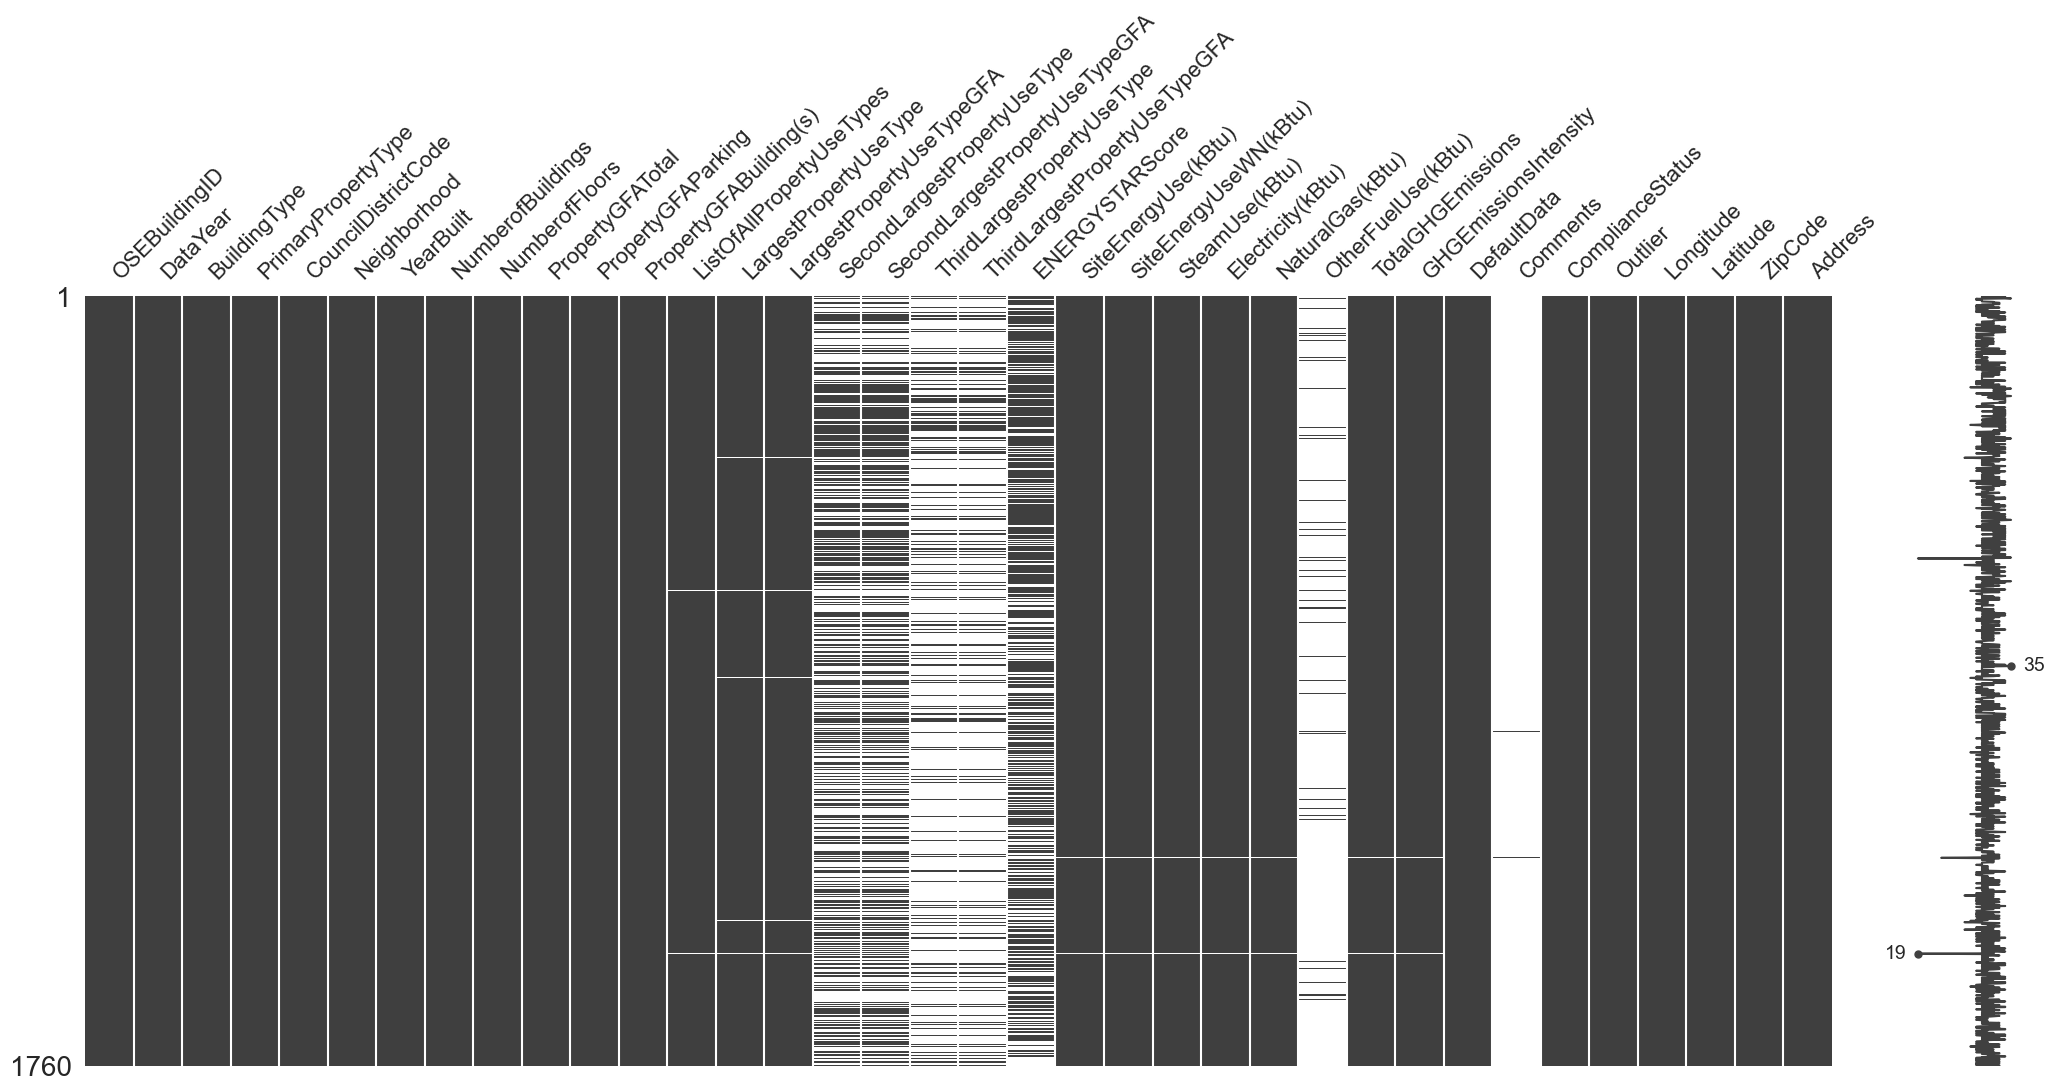

In [232]:
# Visualisation des données manquantes dans les donées de batiments filtrés
fonctions_data.get_val_manq(df_bat, True, True)

### <span style='background :darkorange'> 4.3.1 Traitement des données nulles  </span>

Vérification sur les variables cibles:
  - **SiteEnergyUseWN(kBtu)**
  - **TotalGHGEmissions**

In [99]:
for label in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'] :
    print("Le nombre de bâtiments dont {} est manquant est de : {}".format(label, df_bat[label].isna().sum()))
    print("Le nombre de bâtiments dont {} est <=0 est de : {}".format(label, sum(df_bat[label]<0.0)))
    df_bat = df_bat[df_bat[label]>=0.0] # Suppresion des bâtiments dont la valeur est négative ou nulle

Le nombre de bâtiments dont TotalGHGEmissions est manquant est de : 3
Le nombre de bâtiments dont TotalGHGEmissions est <=0 est de : 1
Le nombre de bâtiments dont SiteEnergyUse(kBtu) est manquant est de : 0
Le nombre de bâtiments dont SiteEnergyUse(kBtu) est <=0 est de : 0


In [100]:
df_bat = df_bat[~(df_bat['SiteEnergyUseWN(kBtu)'].isna()
                  | df_bat['TotalGHGEmissions'].isna())]
# Suivi des dimensions df_bat
print ("Le dataset compte {} lignes et {} variables".format(df_bat.shape[0], df_bat.shape[1]))

Le dataset compte 1755 lignes et 36 variables


### <span style='background :darkorange'> 4.3.2 Traitement des colonnes fortement non renseignés (Imputation)  </span>

**Remplacement de quelques valeurs manquantes**

Les colonnes 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA' et 'OtherFuelUse(kBtu)' contiennent beaucoup de valeurs manquantes. On considère que les bâtiments dont les valeurs sont manquantes pour ces variables ne possèdent pas de deuxième et troisième utilisation donc on ajoute une catégorie aux types d'utilisation et on **remplace** les valeurs de surface par **0**.

In [101]:

cols_to_fillna = ['SecondLargestPropertyUseTypeGFA',
                  'ThirdLargestPropertyUseTypeGFA', 'OtherFuelUse(kBtu)']
df_bat[cols_to_fillna] = df_bat[cols_to_fillna].fillna(0)

In [102]:
df_bat[df_bat['LargestPropertyUseTypeGFA'].isna()][['PropertyGFATotal', 'PropertyGFABuilding(s)',
                                                    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']]

PropertyGFATotal  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
216             111077                  111077                        NaN   
302             151039                  151039                        NaN   
377             111445                  111445                        NaN   
430              66968                   66968                        NaN   
626              54171                   54171                        NaN   
687              93079                   56986                        NaN   
1206             61721                   61721                        NaN   
1575             22029                   22029                        NaN   
2003             23687                   23687                        NaN   
2333             23000                   23000                        NaN   
2515             48350                   48350                        NaN   
2539             21600                   21600                        NaN   
2564             28800                   28800                        NaN   
3014             26373                   26373                        NaN   
3398            374466                  374466                        NaN   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
216                               0.0                             0.0  
302                               0.0                             0.0  
377                               0.0                             0.0  
430                               0.0                             0.0  
626                               0.0                             0.0  
687                               0.0                             0.0  
1206                              0.0                             0.0  
1575                              0.0                             0.0  
2003                              0.0                             0.0  
2333                              0.0                             0.0  
2515                              0.0                             0.0  
2539                              0.0                             0.0  
2564                              0.0                             0.0  
3014                              0.0                             0.0  
3398                              0.0                             0.0

In [103]:
# Récupération des index à modifier
index_to_change = df_bat[df_bat['LargestPropertyUseTypeGFA'].isna()
                         ].index.tolist()
# On force 'LargestPropertyUseTypeGFA' par 'PropertyGFATotal'
# puisque SecondLargestPropertyUseTypeGFA = 0
# et ThirdLargestPropertyUseTypeGFA = 0
df_bat.loc[index_to_change,
           'LargestPropertyUseTypeGFA'] = df_bat.loc[index_to_change, 'PropertyGFATotal']
# Vérification
df_bat[df_bat['LargestPropertyUseTypeGFA'].isna()].shape[0]

0

**Variables qualitatives**

_Variables 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType'_

In [104]:
cols_qual = ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
# Les valeurs manquantes sont remplacés par une catégorie supplémentaire
df_bat[cols_qual] = df_bat[cols_qual].fillna('Nothing')
# Vérification
print(df_bat[df_bat['SecondLargestPropertyUseType'].isna()].shape[0])
print(df_bat[df_bat['ThirdLargestPropertyUseType'].isna()].shape[0])

0
0


_Variable 'Comments'_

In [105]:
# Les valeurs manquantes par la catégorie 'No Comments'
df_bat['Comments'] = df_bat['Comments'].fillna('No Comments')
# Vérification
print(df_bat[df_bat['Comments'].isna()].shape[0])

0


## <span style='background :lightblue' > 4.4 Outliers (valeurs aberrantes)  </span>

In [106]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(df_bat, type_var='cat')

DataYear    BuildingType          PrimaryPropertyType  \
type     object          object                       object   
nb_nan      0.0             0.0                          0.0   
%_nan       0.0             0.0                          0.0   
count      1755            1755                         1755   
unique        2               3                           24   
top        2016  NonResidential  Small- and Mid-Sized Office   
freq       1664            1617                          304   

       CouncilDistrictCode Neighborhood ListOfAllPropertyUseTypes  \
type                object       object                    object   
nb_nan                 0.0          0.0                      11.0   
%_nan                  0.0          0.0                  0.626781   
count                 1755         1755                      1744   
unique                   7           13                       378   
top                      7     DOWNTOWN               K-12 School   
freq                   565          387                       151   

       LargestPropertyUseType SecondLargestPropertyUseType  \
type                   object                       object   
nb_nan                   15.0                          0.0   
%_nan                0.854701                          0.0   
count                    1740                         1755   
unique                     57                           48   
top                    Office                      Nothing   
freq                      521                          864   

       ThirdLargestPropertyUseType DefaultData     Comments ComplianceStatus  \
type                        object        bool       object           object   
nb_nan                         0.0         0.0          0.0              0.0   
%_nan                          0.0         0.0          0.0              0.0   
count                         1755        1755         1755             1755   
unique                          40           2            2                4   
top                        Nothing       False  No Comments        Compliant   
freq                          1386        1651         1754             1637   

       Outlier ZipCode                      Address  
type    object  object                       object  
nb_nan     0.0     0.0                          0.0  
%_nan      0.0     0.0                          0.0  
count     1755    1755                         1755  
unique       3      49                         1676  
top        not   98134  309 South Cloverdale Street  
freq      1732     190                            5

In [107]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(df_bat, type_var='num')

OSEBuildingID    YearBuilt NumberofBuildings NumberofFloors  \
type           int64        int64             int32          int32   
nb_nan           0.0          0.0               0.0            0.0   
%_nan            0.0          0.0               0.0            0.0   
count         1755.0       1755.0            1755.0         1755.0   
mean    16201.362963  1961.767521          1.193162       4.164103   
std     13829.180046    32.775463          2.852665       6.640411   
min              1.0       1900.0               1.0            0.0   
25%            577.5       1930.0               1.0            1.0   
50%          21122.0       1965.0               1.0            2.0   
75%          24590.0       1989.0               1.0            4.0   
max          50226.0       2015.0             111.0           99.0   

       PropertyGFATotal PropertyGFAParking PropertyGFABuilding(s)  \
type              int64              int64                  int64   
nb_nan              0.0                0.0                    0.0   
%_nan               0.0                0.0                    0.0   
count            1755.0             1755.0                 1755.0   
mean      120861.124217       13137.523077           107723.60114   
std         297092.5252       43444.642055           282866.47618   
min             11285.0                0.0                 3636.0   
25%             29503.0                0.0                28496.0   
50%             49760.0                0.0                47673.0   
75%            107751.0                0.0                96124.5   
max           9320156.0           512608.0              9320156.0   

       LargestPropertyUseTypeGFA SecondLargestPropertyUseTypeGFA  \
type                     float64                         float64   
nb_nan                       0.0                             0.0   
%_nan                        0.0                             0.0   
count                     1755.0                          1755.0   
mean               100262.479772                    19655.979087   
std                273891.182304                    56554.564849   
min                       5656.0                             0.0   
25%                      25552.0                             0.0   
50%                      44091.0                             0.0   
75%                      92580.0                         12770.5   
max                    9320156.0                        686750.0   

       ThirdLargestPropertyUseTypeGFA  ... SiteEnergyUse(kBtu)  \
type                          float64  ...             float64   
nb_nan                            0.0  ...                 0.0   
%_nan                             0.0  ...                 0.0   
count                          1755.0  ...              1755.0   
mean                      3243.299942  ...      8474483.451426   
std                      18966.998388  ...      29877155.89854   
min                               0.0  ...                 0.0   
25%                               0.0  ...        1209878.4375   
50%                               0.0  ...          2497942.75   
75%                               0.0  ...          6851194.25   
max                          459748.0  ...         873923712.0   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu) Electricity(kBtu)  \
type                 float64         float64           float64   
nb_nan                   0.0             0.0               0.0   
%_nan                    0.0             0.0               0.0   
count                 1755.0          1755.0            1755.0   
mean          8048471.597401   545912.619527    5865619.990933   
std          22018484.661564  5531457.594487   20494557.247281   
min                      0.0             0.0               0.0   
25%               1265929.25             0.0          715609.0   
50%                2637723.5             0.0         1599684.0   
75%                7065244.0             0.0         4777083.5   
m

### <span style='background :darkorange'> 4.4.1 Traitement des Outliers  </span>

Il est intéressant d'observer les distributions des variables à prédire pour savoir si des bâtiments ont des valeurs outliers, i.e soit très hautes soit très basses.

C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\2844334245.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat[label], bins=int(1 + np.log2(len(data))))
C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\2844334245.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat[label], bins=i

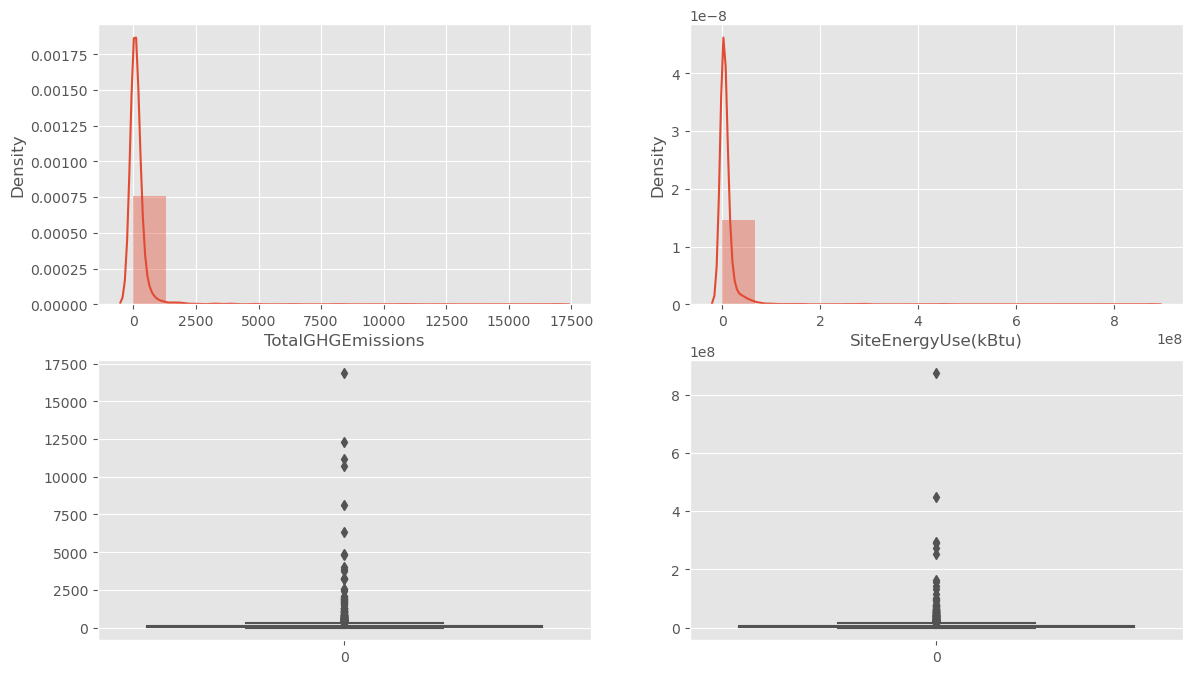

In [89]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_bat[label], bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(df_bat[label], orient="b")
plt.show()

C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\1433659788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(df_bat))))
C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\1433659788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

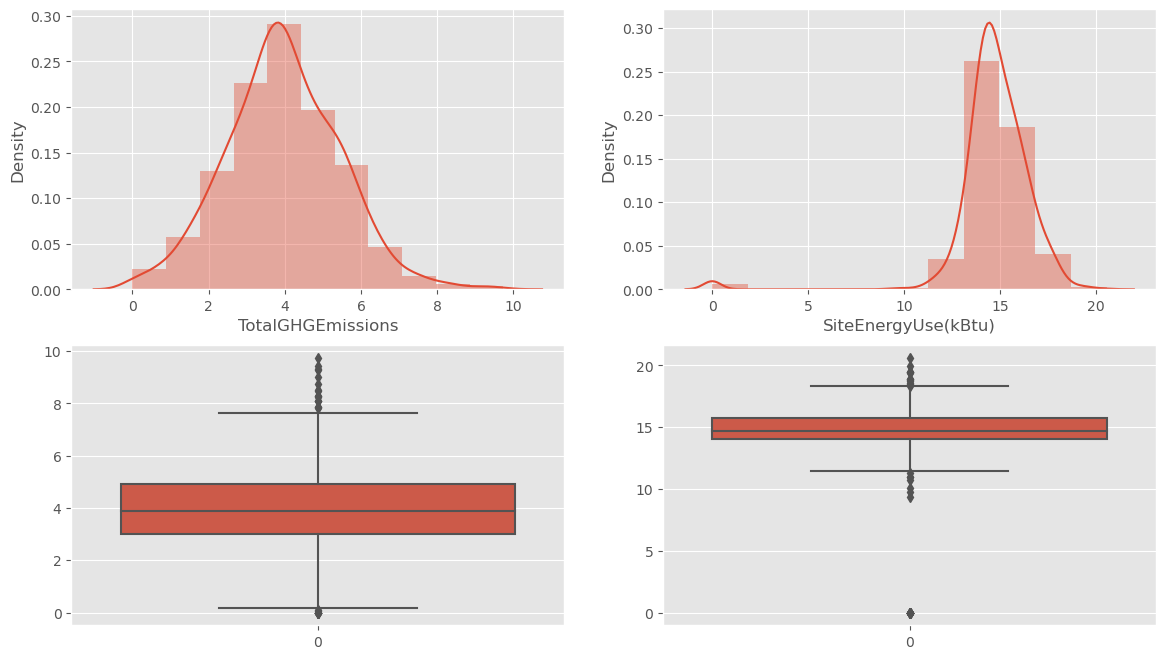

In [90]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_bat[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(df_bat))))
    plt.subplot(2,2,i+3)
    sns.boxplot(df_bat[label].apply(lambda x : np.log(1 + x)), orient="b")
plt.show()

In [91]:
Q1 = round(np.percentile(df_bat["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(df_bat["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 75))

born_sup_energy = Q3 + 1.5*(Q3-Q1)
born_inf_energy = Q1 - 1.5*(Q3-Q1)

In [92]:
Q1 = round(np.percentile(df_bat["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(df_bat["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 75))

born_sup_co2 = Q3 + 1.5*(Q3-Q1) 
born_inf_co2 = Q1 - 1.5*(Q3-Q1)

In [93]:
df_bat = df_bat[(df_bat["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))<born_sup_energy) & (df_bat["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))>born_inf_energy)]
df_bat = df_bat[(df_bat["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))<born_sup_co2) & (df_bat["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))>born_inf_co2)]

C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\3661254074.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(df_bat))))
C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\3661254074.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

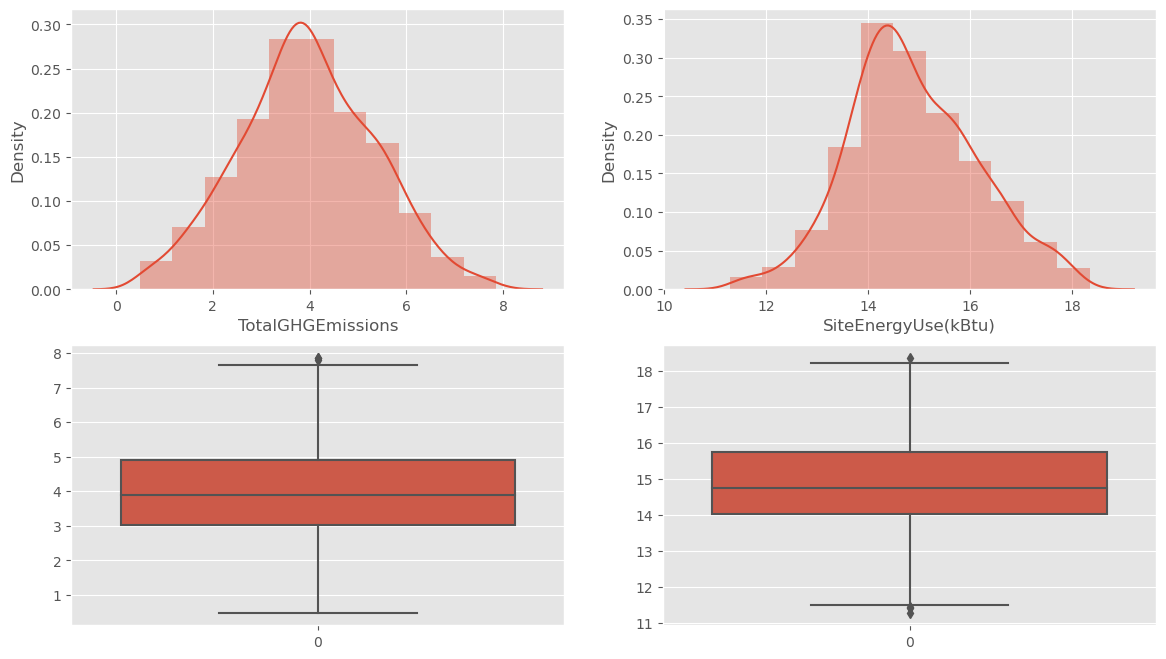

In [94]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_bat[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(df_bat))))
    plt.subplot(2,2,i+3)
    sns.boxplot(df_bat[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

In [95]:
print("Le nombre de bâtiments restant est de : {}".format(len(df_bat)))

Le nombre de bâtiments restant est de : 1628


In [96]:
df_bat[df_bat['PropertyGFATotal'] != (
    df_bat['PropertyGFABuilding(s)'] + df_bat['PropertyGFAParking'])].shape[0]

0

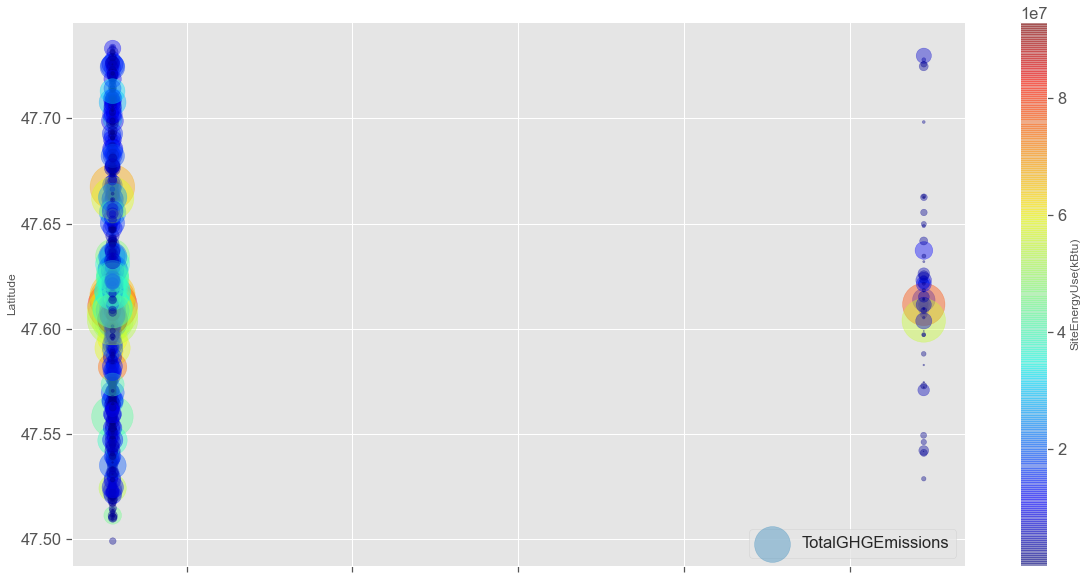

In [625]:
df_bat.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=df_bat["TotalGHGEmissions"], label="TotalGHGEmissions",
            c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(20,10))
plt.show()

# <span style='background :lightgreen' > 5. Analyse exploratoire  </span>

## <span style='background :lightblue' > 5.1 Analyse univariée  </span>

In [97]:
# numerical = df_bat.select_dtypes(exclude=['object']).columns
categorical = df_bat.select_dtypes(exclude=['int', 'float']).columns

# display(numerical)
# display(categorical)

In [98]:
numerical = df_bat.select_dtypes(include=[np.number]).columns.to_list()

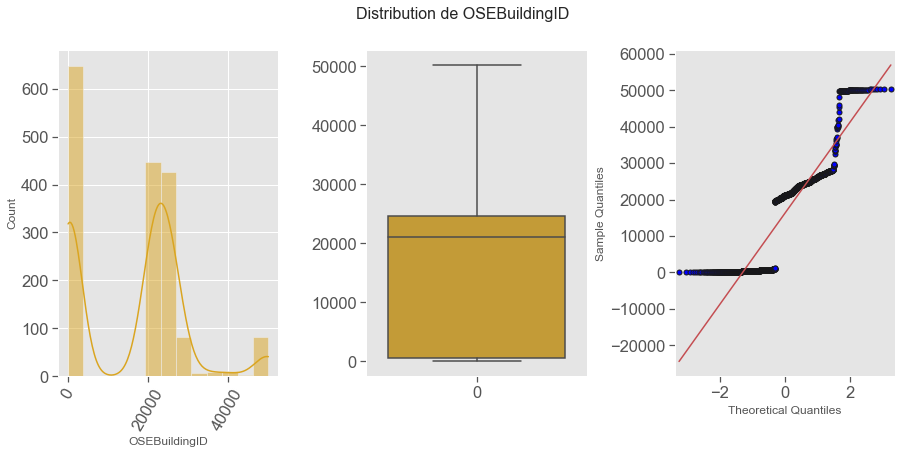

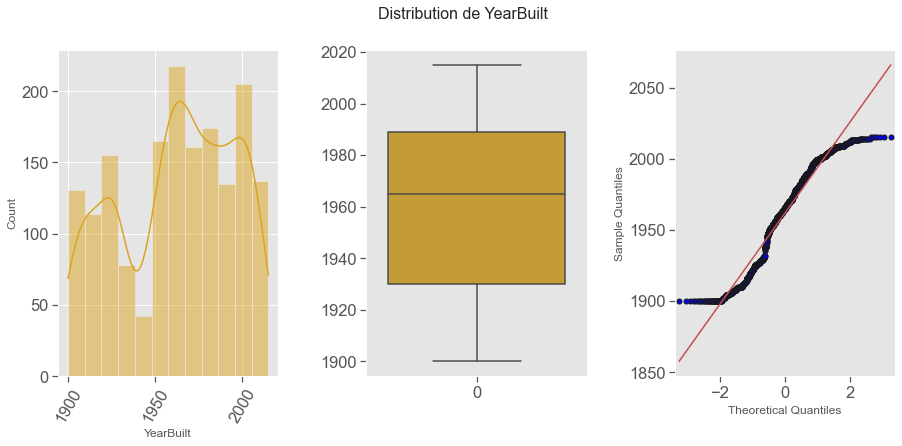

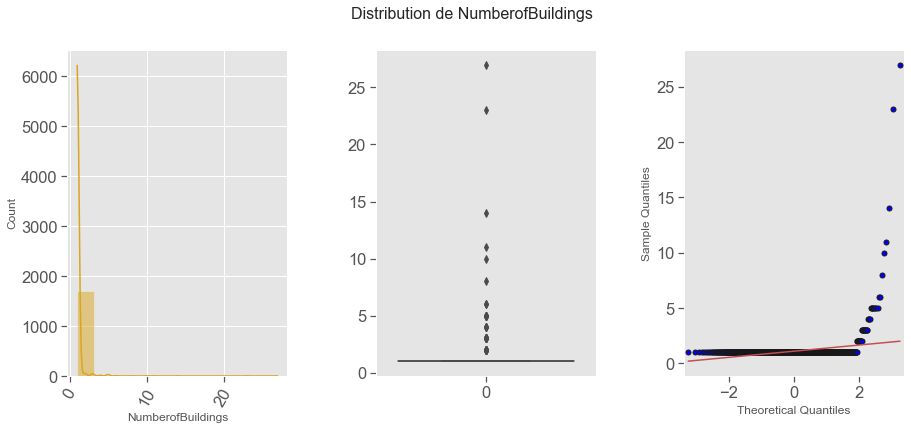

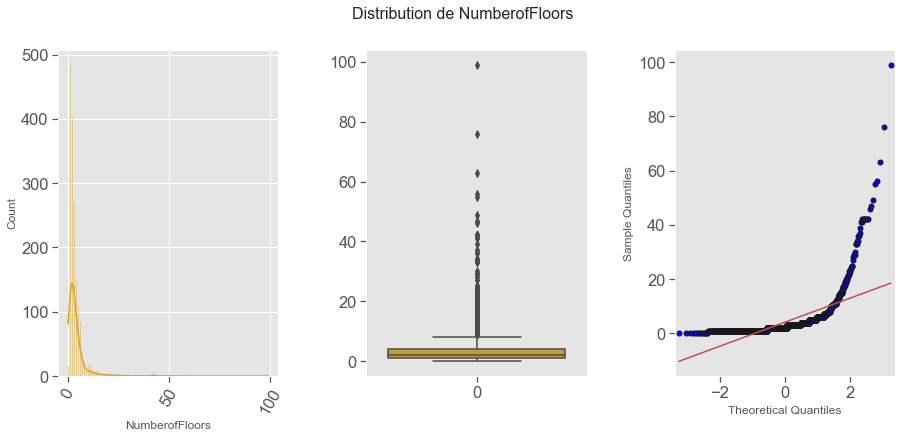

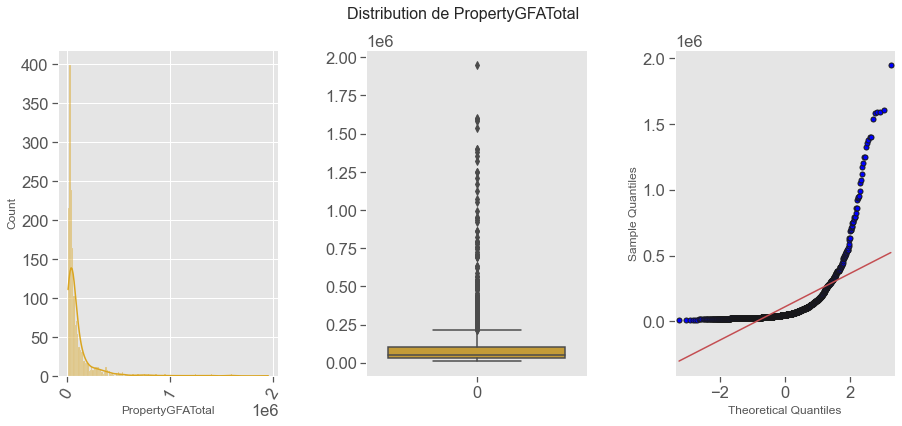

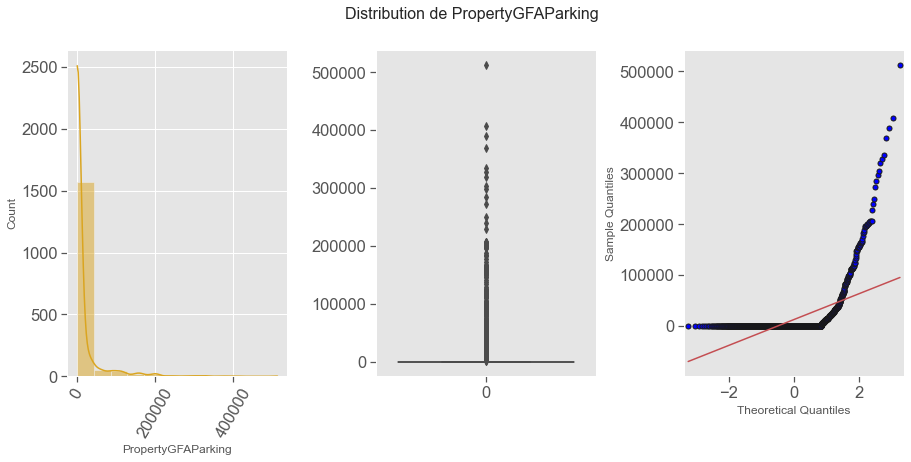

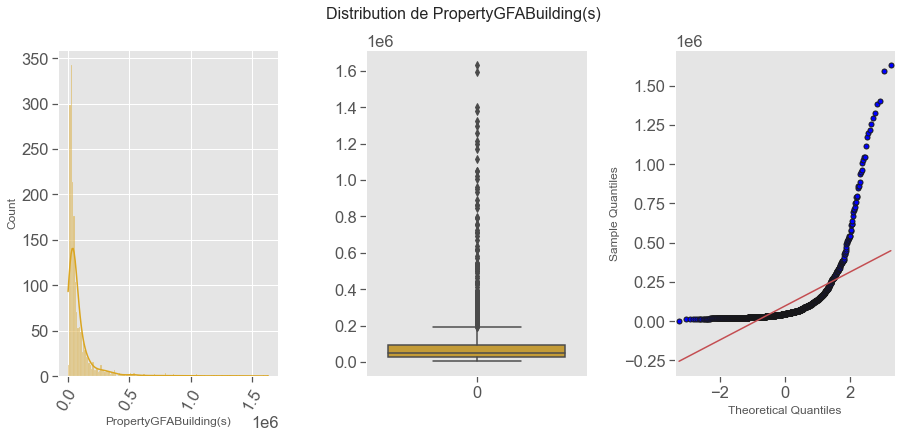

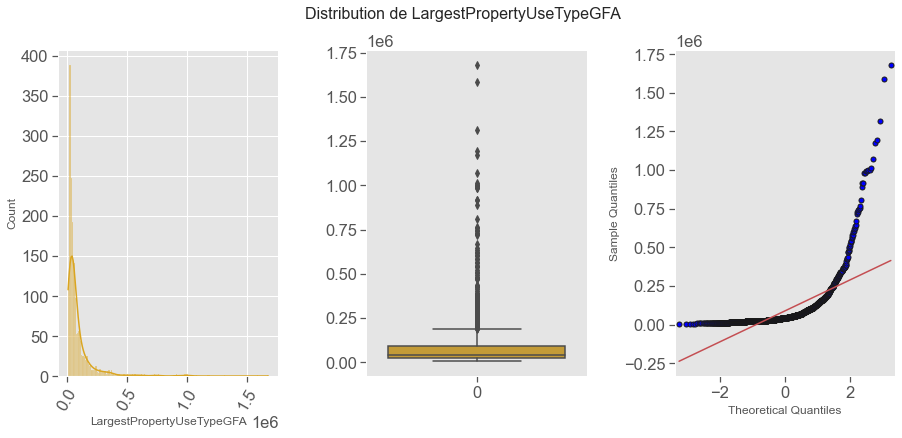

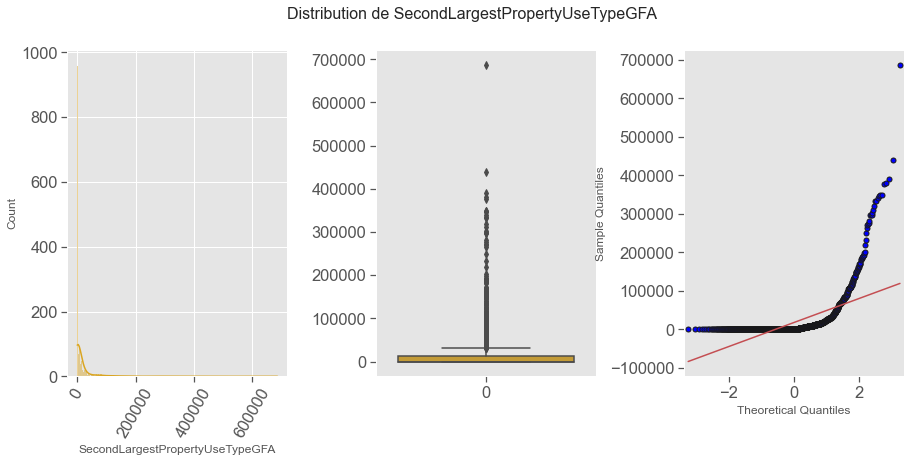

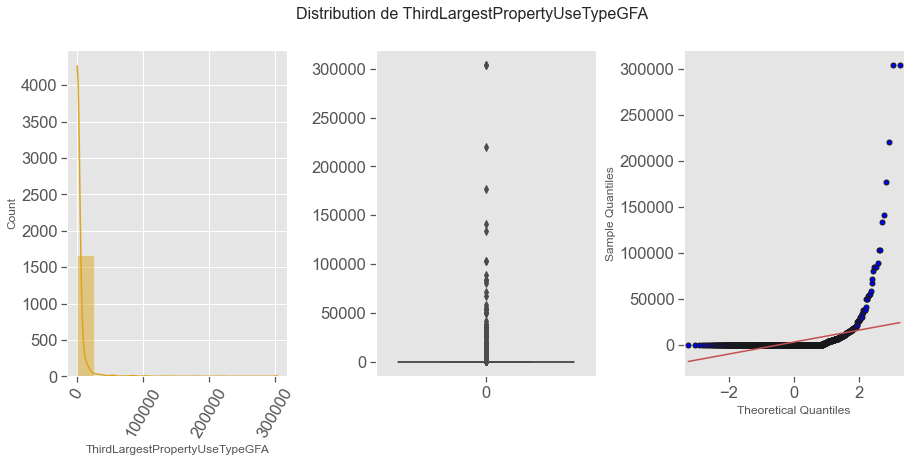

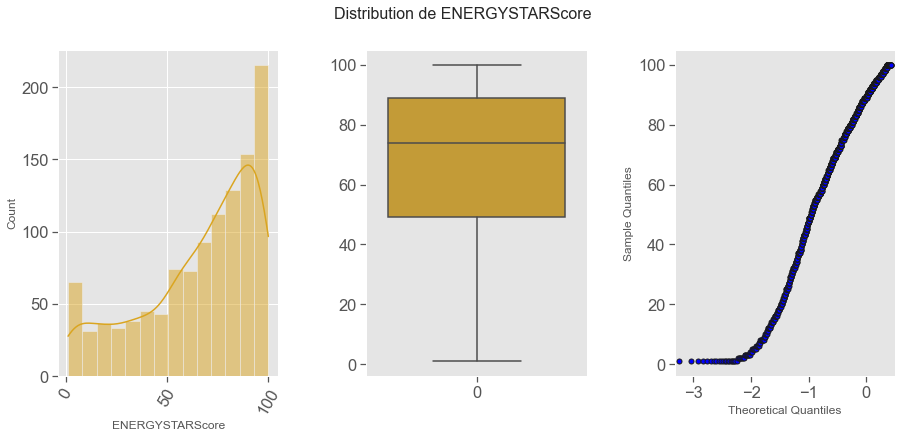

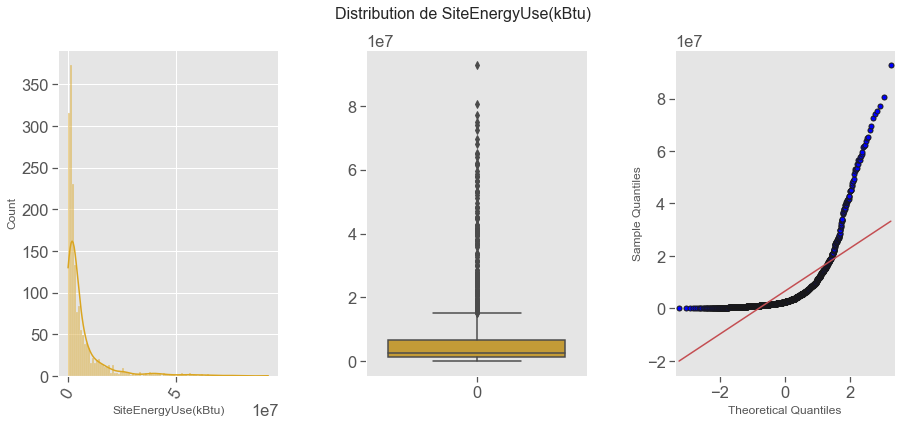

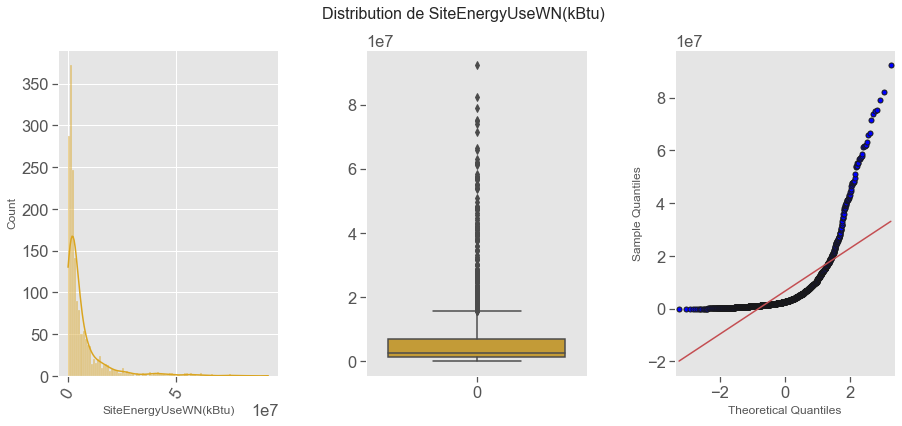

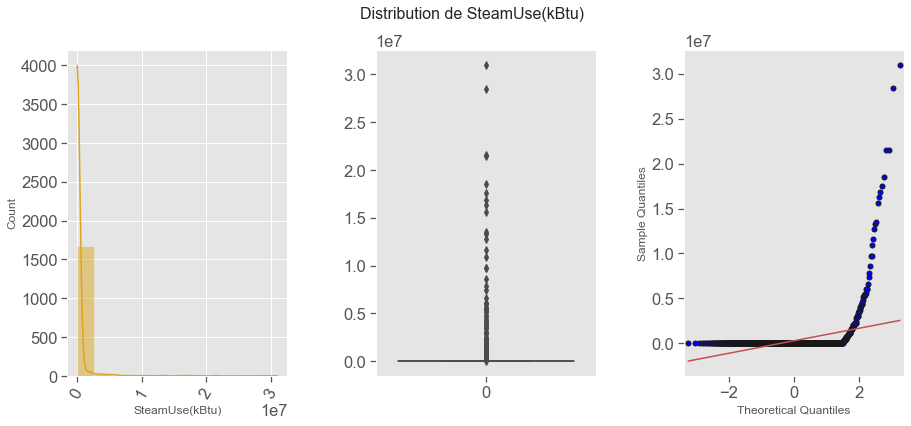

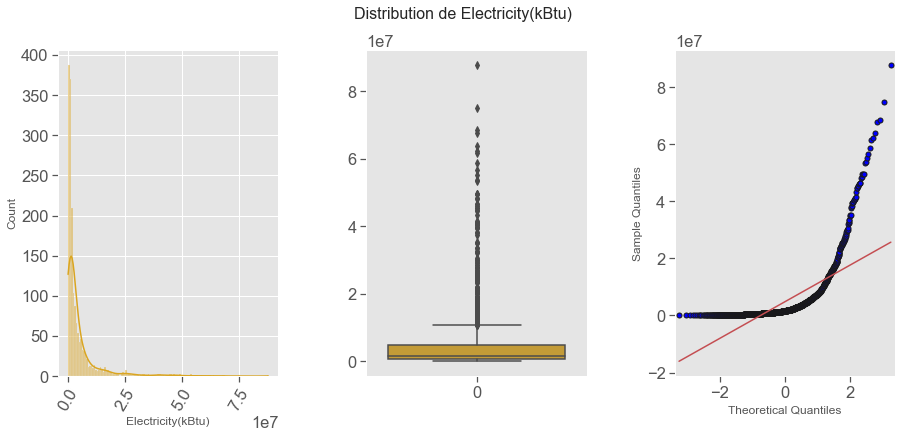

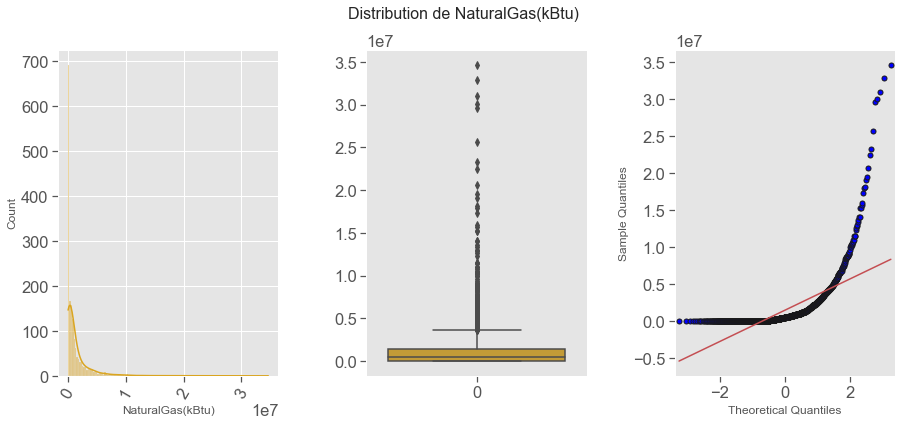

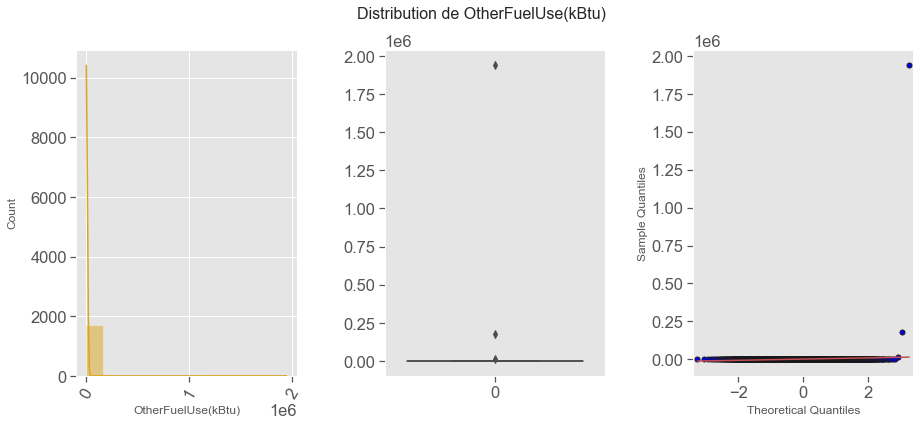

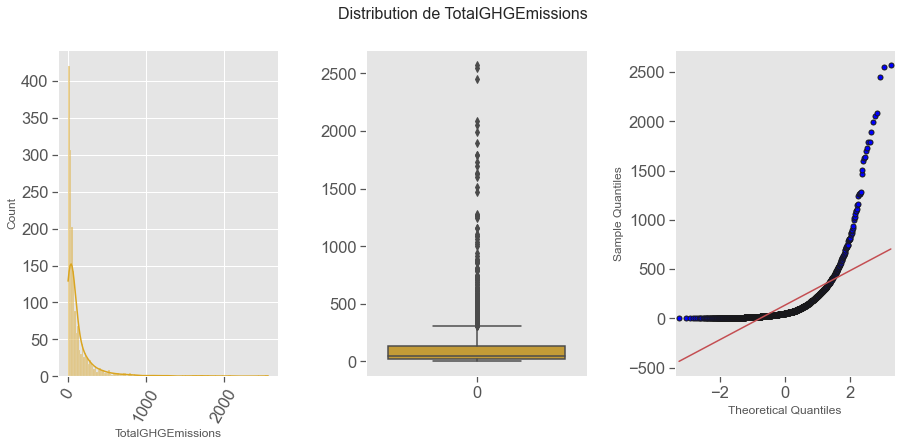

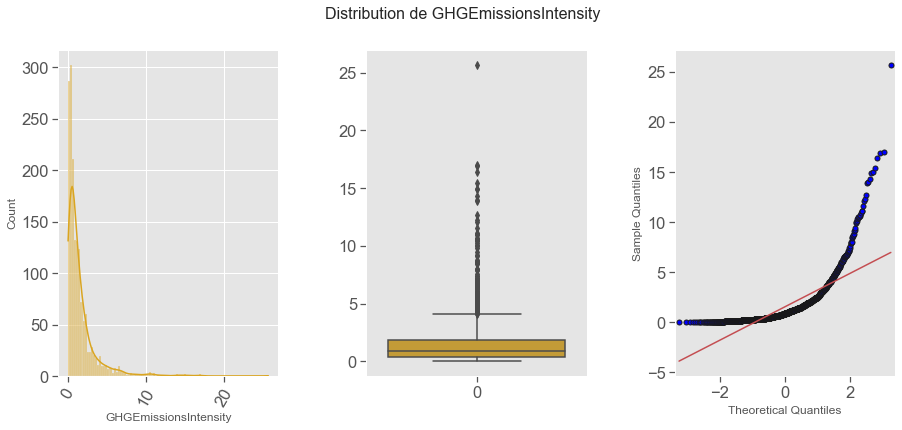

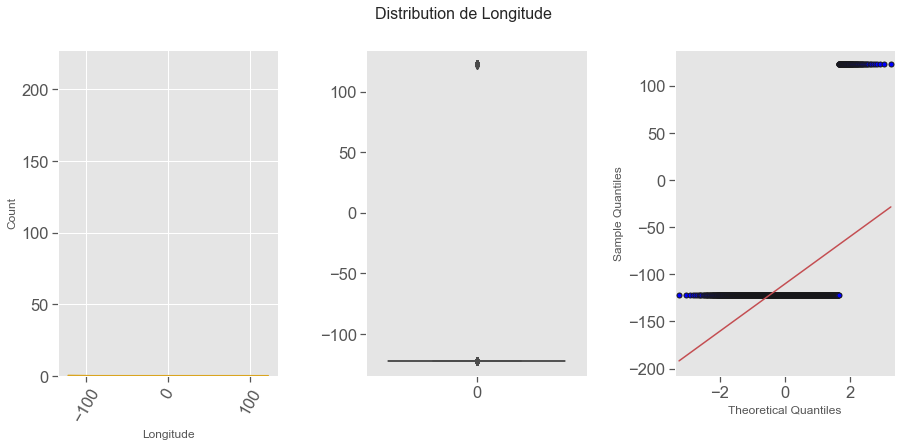

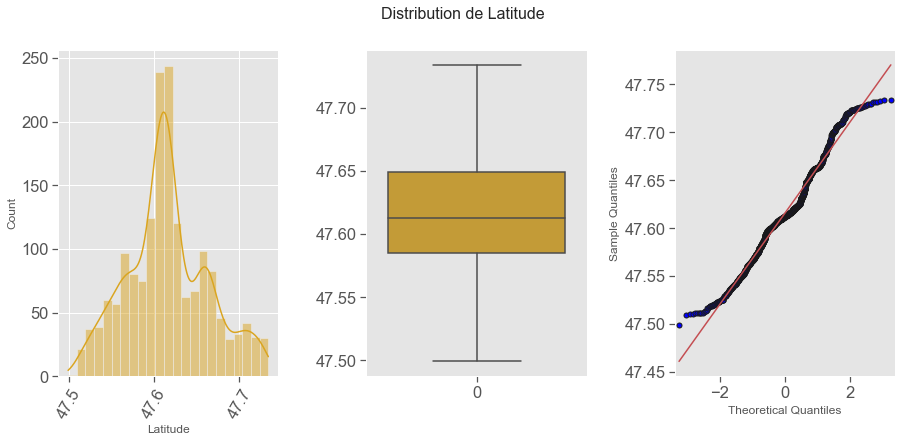

In [840]:
fonctions_data.trace_multi_histplot_boxplot_qqplot(df_bat, numerical)

In [524]:
# Analyse univariée des variables qualitatives
cols_cat = df_bat.select_dtypes(exclude=[np.number]).columns.to_list()

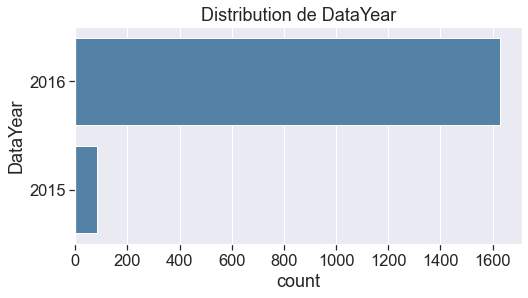

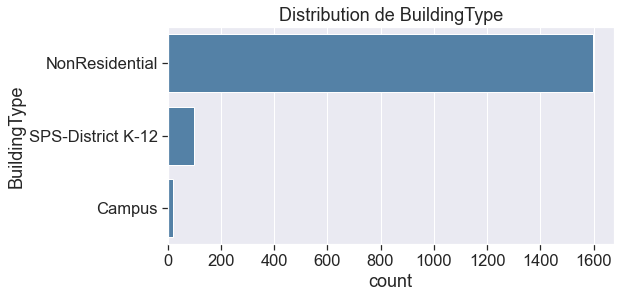

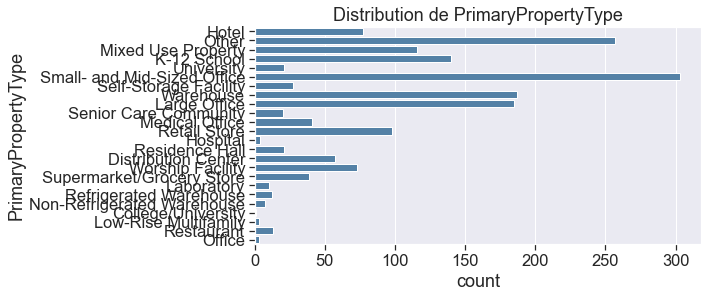

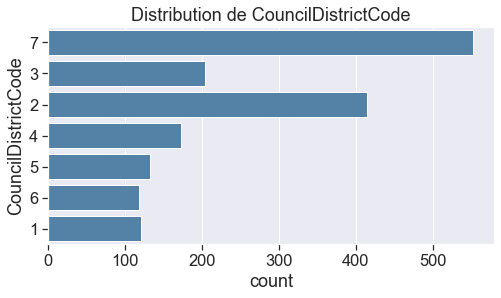

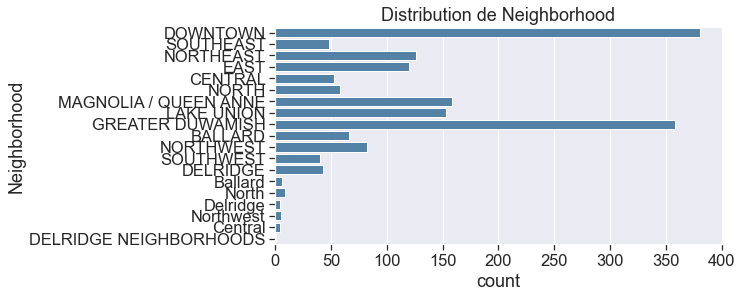

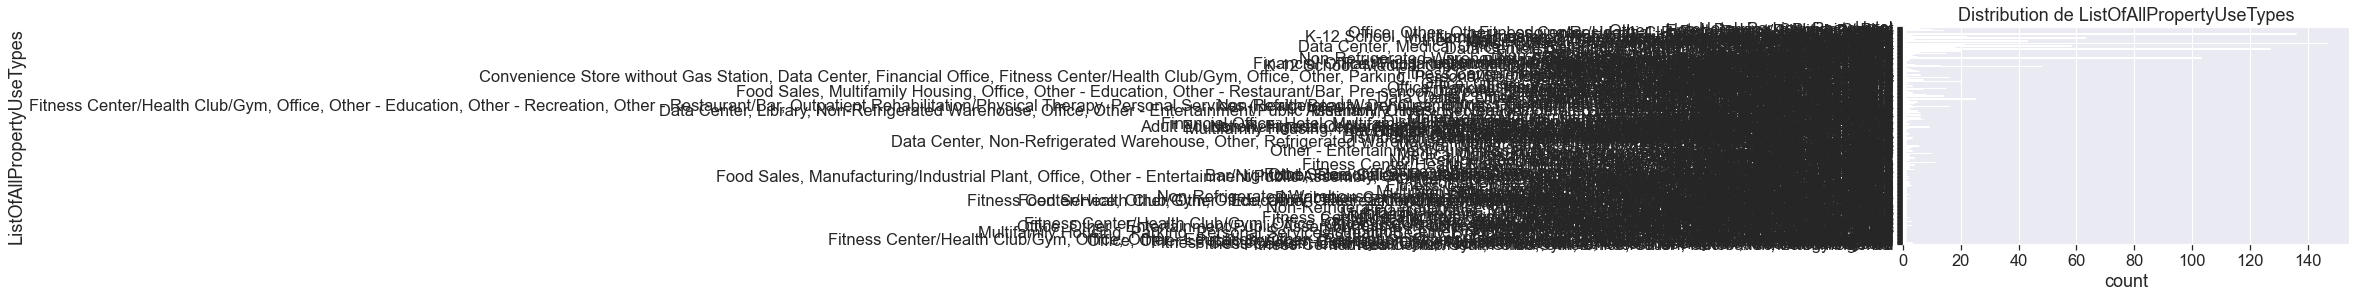

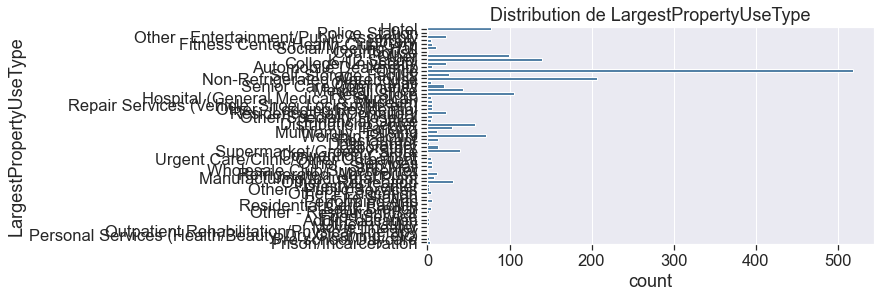

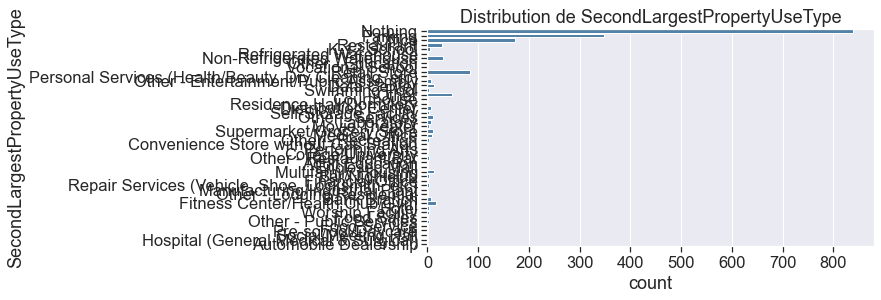

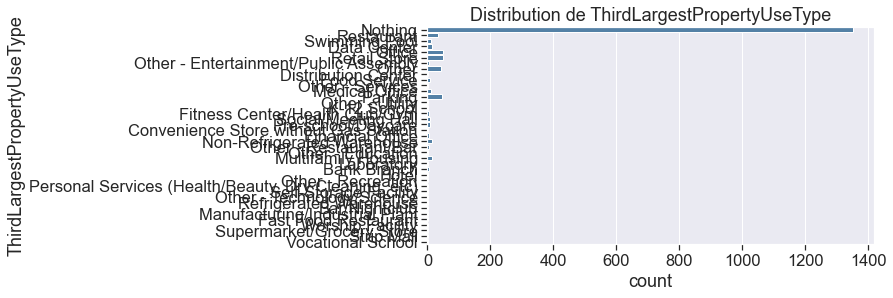

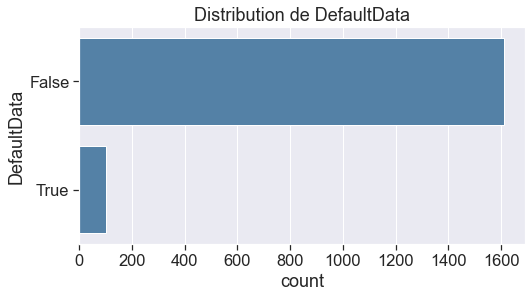

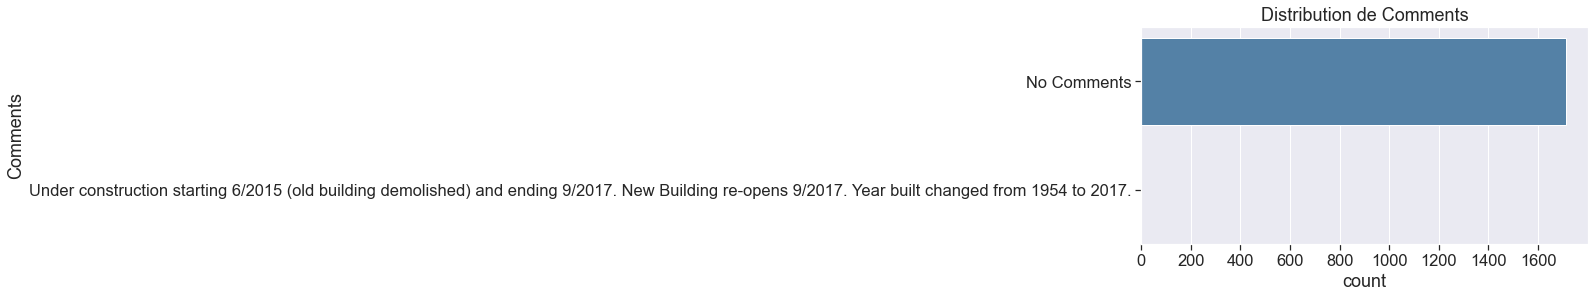

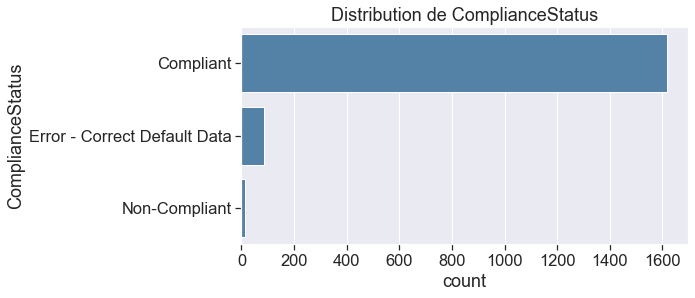

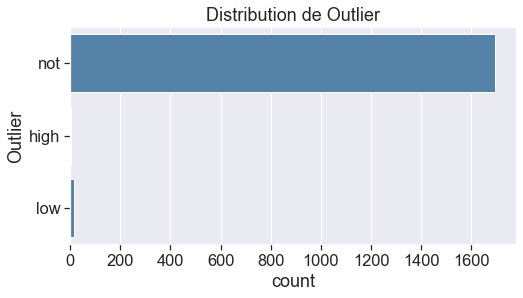

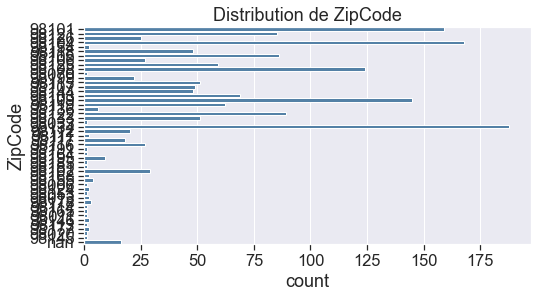

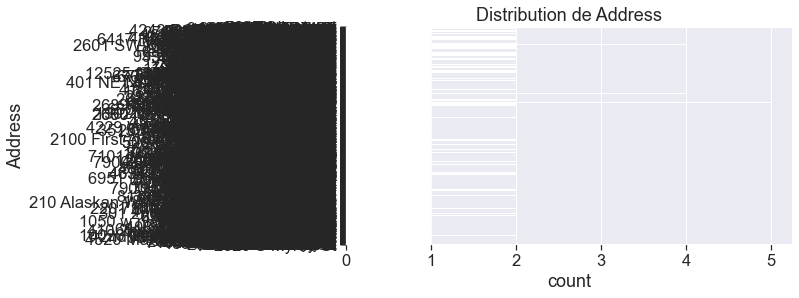

In [525]:
for col in cols_cat:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=col, data=df_bat, color='SteelBlue')
        plt.title('Distribution de ' + col)
        plt.show()

**Distribution des variables cibles**

_Varibale 'SiteEnergyUseWN(kBtu)'_

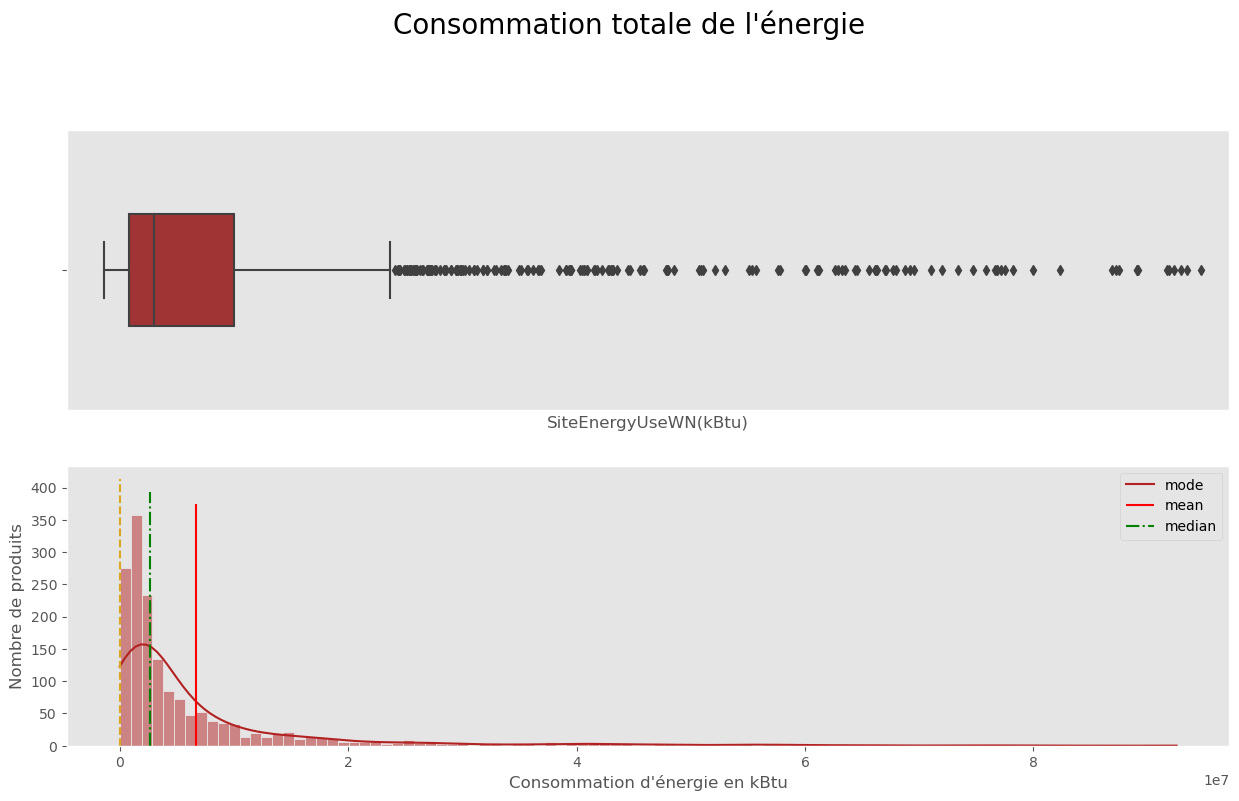

In [99]:
# SiteEnergyUseWN(kBtu) 
fonctions_data.trace_histplot(df_bat, 'SiteEnergyUseWN(kBtu)','firebrick', 'Consommation totale de l\'énergie',
                                    'Consommation d\'énergie en kBtu',
                                    -2000000, 60000000, -1, 1)

**Statistiques descriptives**

In [990]:
fonctions_data.stat_descriptives(df_bat,['SiteEnergyUseWN(kBtu)']).T

0
Variable name   SiteEnergyUseWN(kBtu)
Mean                   6641394.261947
Median                      2652254.5
Skew                         3.535695
Kurtosis                    15.059948
Variance       116516924194899.578125
Stdev                  10794300.54218
min                               0.0
25%                      1297661.6875
50%                         2652254.5
75%                        7020946.75
max                        92537256.0

_Variable 'TotalGHGEmissions'_

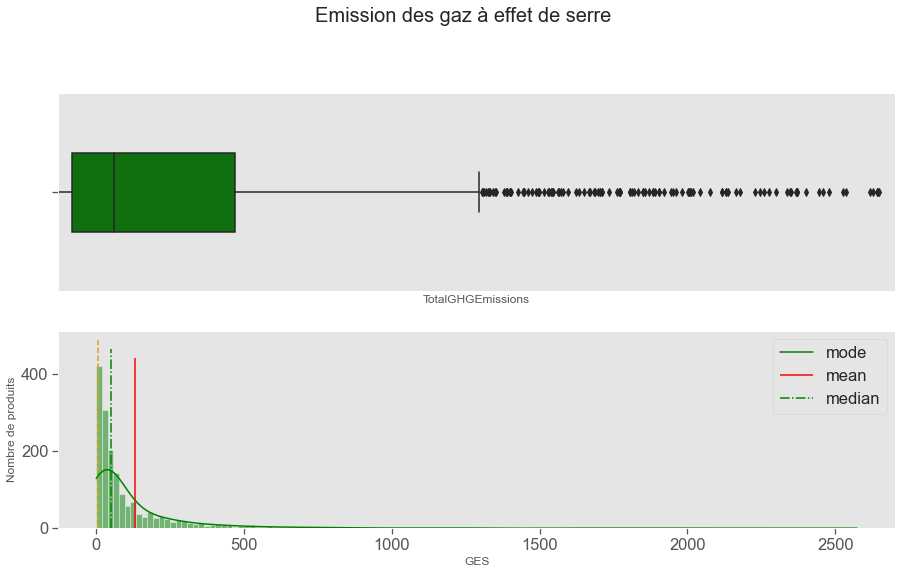

In [988]:
# TotalGHGEmissions
fonctions_data.trace_histplot(df_bat, 'TotalGHGEmissions','green', 'Emission des gaz à effet de serre',
                                    'GES', 10, 600, -1, 1)

**Statistiques descriptives**

In [991]:
fonctions_data.stat_descriptives(df_bat,['TotalGHGEmissions']).T

0
Variable name  TotalGHGEmissions
Mean                  133.309405
Median                     49.18
Skew                    4.824349
Kurtosis               31.119229
Variance            61425.753221
Stdev                 247.842194
min                          0.5
25%                       20.005
50%                        49.18
75%                      135.025
max                      2573.75

**Comparaison statistique des 2 variables cibles**

In [102]:
numerical_target = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
df_bat[numerical_target].describe()

SiteEnergyUse(kBtu)  TotalGHGEmissions
count         1.628000e+03        1628.000000
mean          6.650703e+06         133.082396
std           1.102161e+07         251.918083
min           7.971180e+04           0.630000
25%           1.233777e+06          19.760000
50%           2.500610e+06          48.515000
75%           6.763598e+06         133.520000
max           9.293764e+07        2573.750000

**Description des 2 variables cibles (Transformation de Box-Cox)**

Application de la tranformation de Box-Cox en normalité des variables cibles.  

In [103]:
from sklearn.preprocessing import power_transform
df_bat['SiteEnergyUse(kBtu)_trans'] = power_transform(df_bat[numerical_target], method='box-cox')[:,0]
df_bat['TotalGHGEmissions_trans'] = power_transform(df_bat[numerical_target], method='box-cox')[:,1]

C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\3385083043.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat['SiteEnergyUse(kBtu)_trans'])


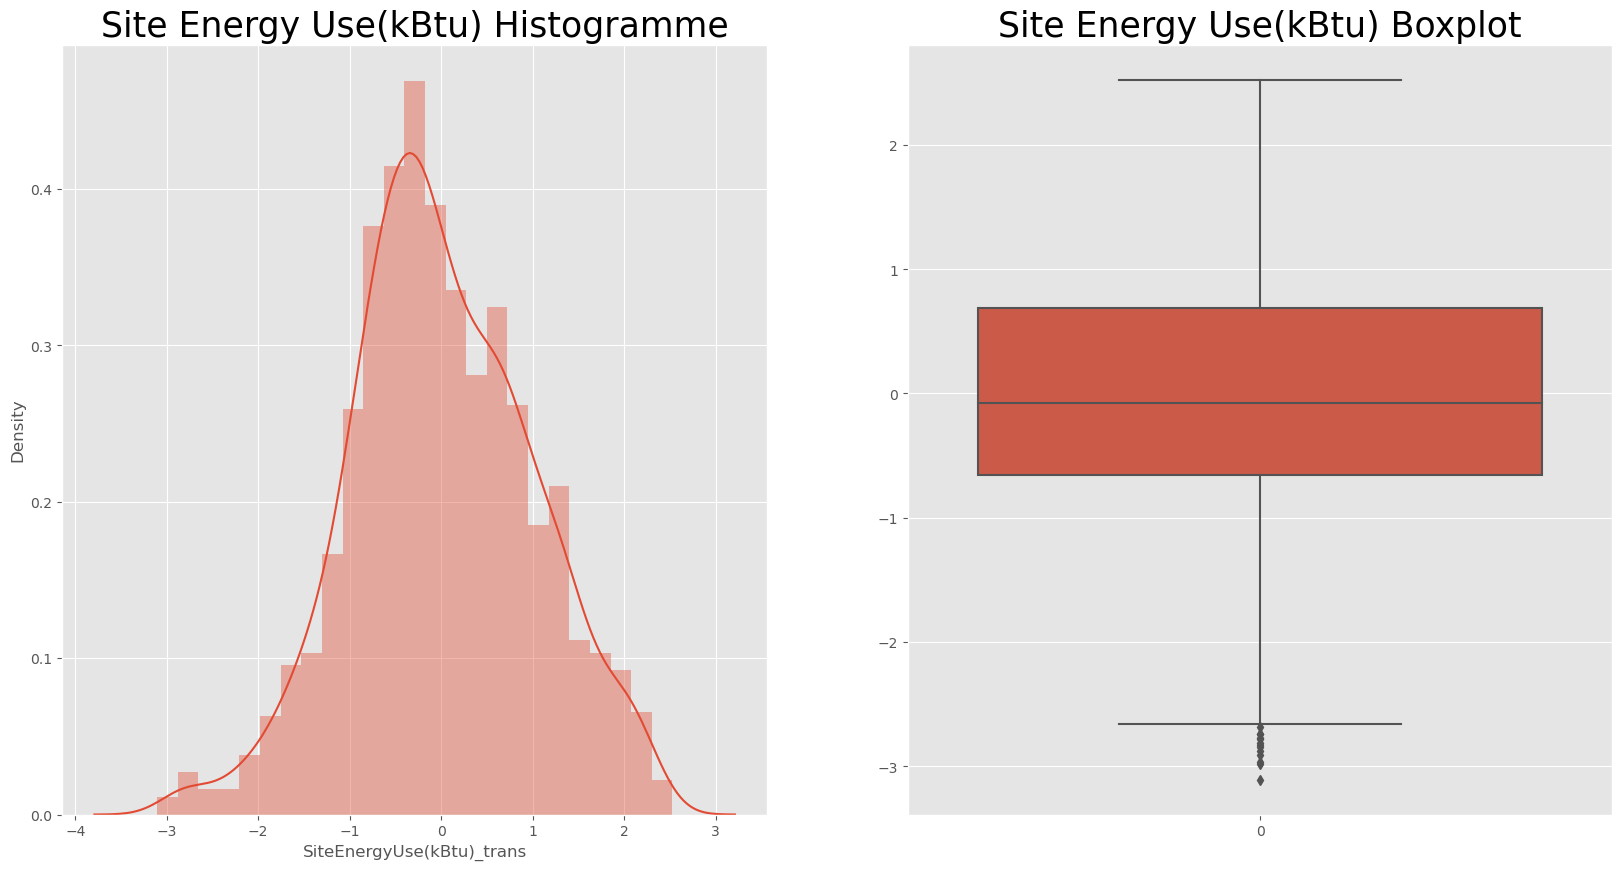

count    1.628000e+03
mean     4.189933e-16
std      1.000307e+00
min     -3.106703e+00
25%     -6.541160e-01
50%     -8.023053e-02
75%      6.905781e-01
max      2.526795e+00
Name: SiteEnergyUse(kBtu)_trans, dtype: float64


In [104]:
#SiteEnergyUse(kBtu)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df_bat['SiteEnergyUse(kBtu)_trans'])
plt.title('Site Energy Use(kBtu) Histogramme', fontsize=25)

plt.subplot(122)
sns.boxplot(df_bat['SiteEnergyUse(kBtu)_trans'])
plt.title('Site Energy Use(kBtu) Boxplot', fontsize=25)

plt.show()

print(df_bat['SiteEnergyUse(kBtu)_trans'].describe())

C:\Users\yanni\AppData\Local\Temp\ipykernel_10812\4148232217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bat['TotalGHGEmissions_trans'])


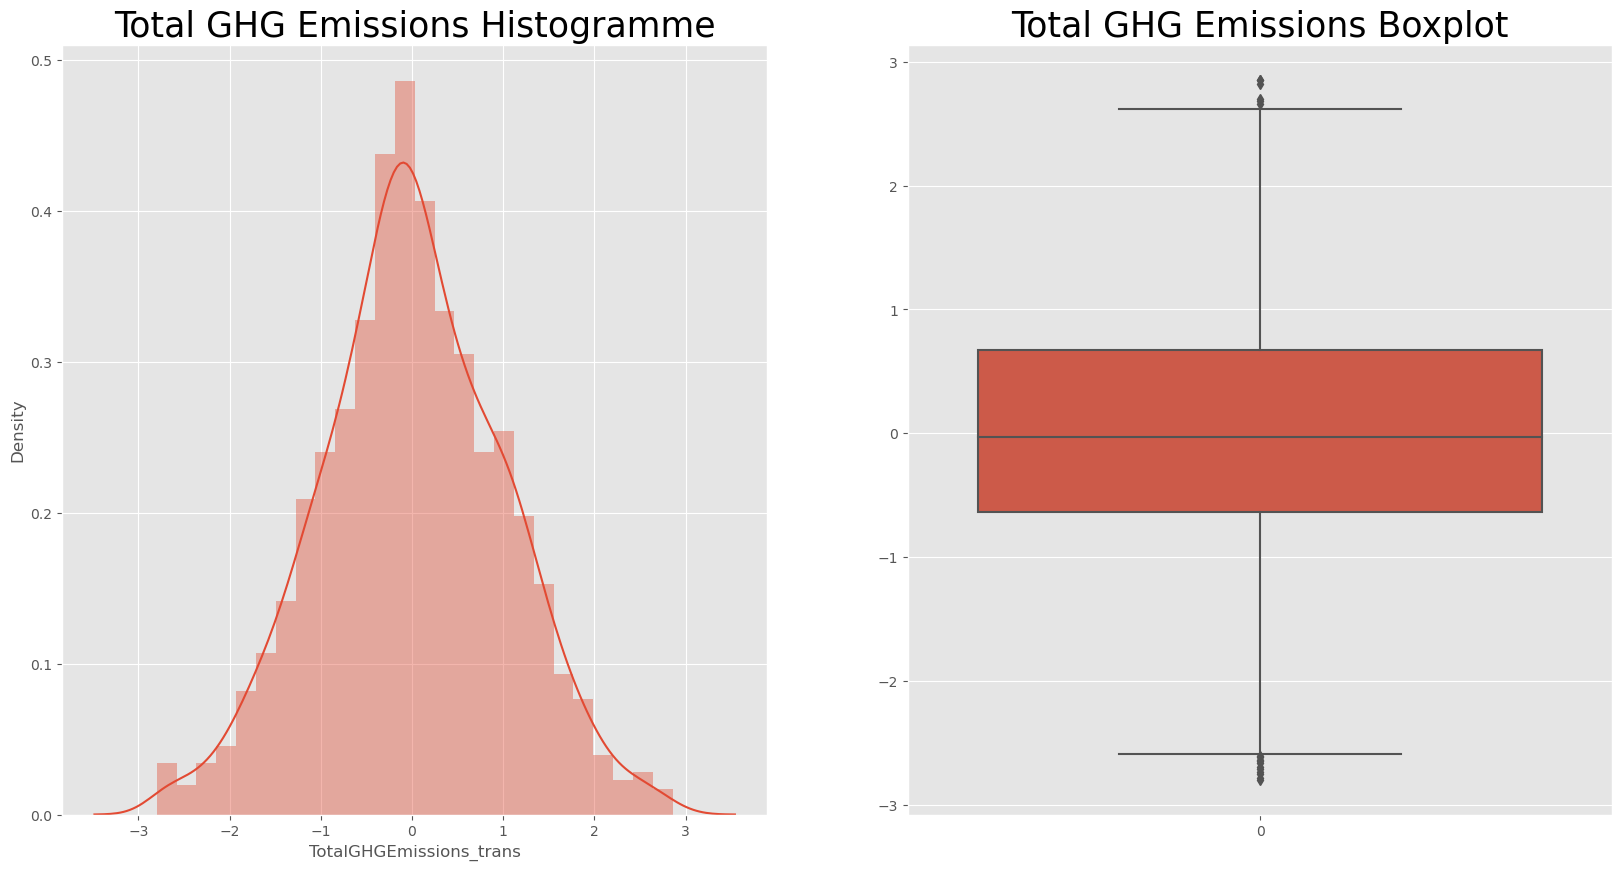

count    1.628000e+03
mean    -2.444127e-16
std      1.000307e+00
min     -2.797339e+00
25%     -6.362599e-01
50%     -3.248145e-02
75%      6.692590e-01
max      2.856085e+00
Name: TotalGHGEmissions_trans, dtype: float64


In [105]:
#TotalGHGEmissions
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df_bat['TotalGHGEmissions_trans'])
plt.title('Total GHG Emissions Histogramme', fontsize=25)

plt.subplot(122)
sns.boxplot(df_bat['TotalGHGEmissions_trans'])
plt.title('Total GHG Emissions Boxplot', fontsize=25)

#plt.savefig('p4_00_graphic/emissions_trans_boxcox.png')
plt.show()

print(df_bat['TotalGHGEmissions_trans'].describe())

Les 2 Target ne semblent pas suivre une loi normale, en effet les distributions respectives sont plus étalées du fait d'avoir une grande disparité dans les métriques. Cela semble normal qu'une grande ville comme celle de Seattle peut très certainement être aménagée par une large diversité de bâtiments. L'alternative sera donc de transformer nos variables cibles en  différentes versions logarithmiques(log1, log5, log10) afin de rendre leurs distributions les plus normaliées possibles.

**Transformation des variables cibles en version logarithmique**

Nous avons constaté précédamment que les variables cibles 'SiteEnergyUseWN(kBtu)' et 'TotalGHGEmissions' ne suivent pas une loi normale, et sont asymétriques étalée à droite (skewness > 1) et moins aplatie que la distribution normale, rendons cette distribution plus normale en la transformant en logarithme.

In [108]:
# Test de transformation de la variable cicle en log1p, log2+1 et log10 +1
test1p = np.log1p(df_bat['TotalGHGEmissions'])
test2p = np.log2(1+df_bat['TotalGHGEmissions'])
test10p = np.log10(1+df_bat['TotalGHGEmissions'])

In [109]:
# Constitution du dataframe de travail
df_tmp_test = pd.DataFrame(
    {'test1p': test1p, 'test2p': test2p, 'test10p': test10p})
df_tmp_test

test1p     test2p   test10p
0     5.525373   7.971429  2.399639
1     5.693261   8.213639  2.472552
2     7.645053  11.029480  3.320204
3     5.660979   8.167067  2.458532
4     6.226556   8.983022  2.704159
...        ...        ...       ...
3506  3.088311   4.455492  1.341237
3507  3.501646   5.051807  1.520745
3508  5.414054   7.810829  2.351294
3509  3.140265   4.530445  1.363800
3510  3.744078   5.401562  1.626032

[1755 rows x 3 columns]

C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770572.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test1p)
C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770572.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test2p)
C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770

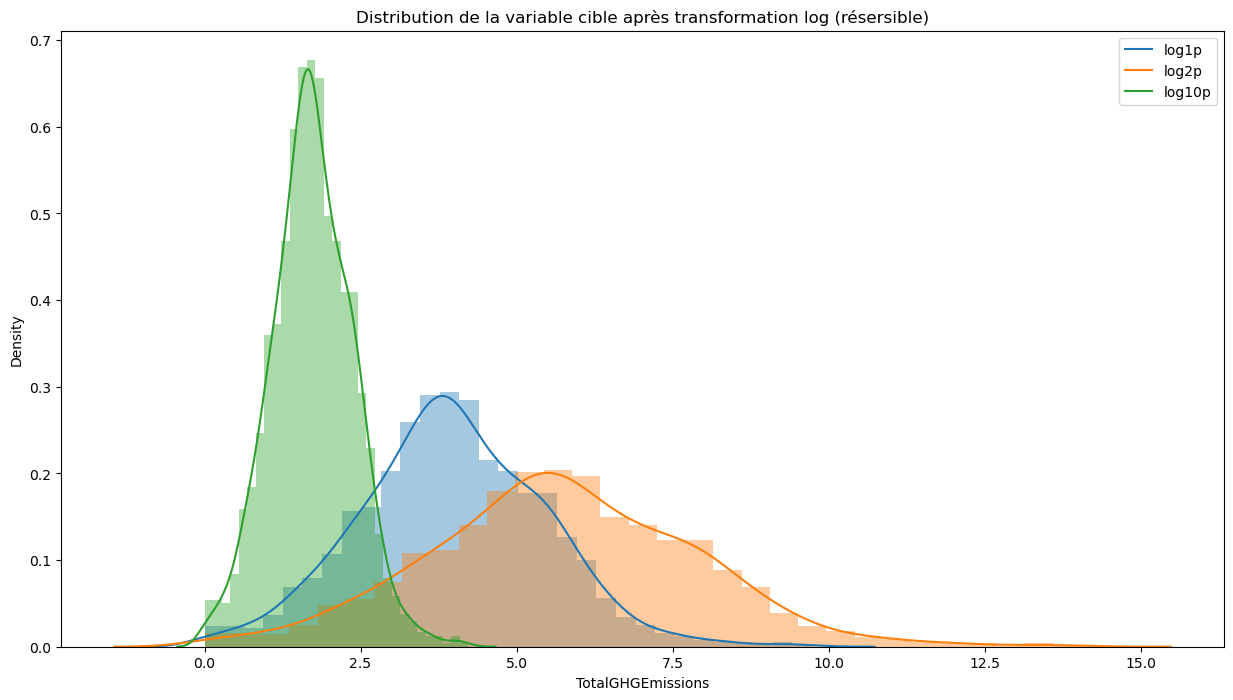

In [110]:
# Visualisation des 3 essais de transformation logarithmique
plt.figure(figsize=(15, 8))
plt.title('Distribution de la variable cible après transformation log (résersible)')
sns.distplot(test1p)
sns.distplot(test2p)
sns.distplot(test10p)
ax = plt.gca()
ax.legend(['log1p', 'log2p', 'log10p'])
plt.show()

In [245]:
# Inspection des descriptions statistiques
fonctions_data.stat_descriptives(df_tmp_test,['test1p', 'test2p', 'test10p'])

Variable name      Mean    Median      Skew  Kurtosis  Variance     Stdev  \
0        test1p  3.968252  3.915417  0.133029  0.314273  2.216754  1.488877   
1        test2p  5.724978  5.648753  0.133029  0.314273  4.613883  2.147995   
2       test10p  1.723390  1.700444  0.133029  0.314273  0.418106  0.646611   

   min       25%       50%       75%        max  
0  0.0  3.024562  3.915417  4.959865   9.733410  
1  0.0  4.363520  5.648753  7.155572  14.042342  
2  0.0  1.313551  1.700444  2.154042   4.227166

Nous avons une variance et une amplitude plus faible, une moyenne se rapprochant le plus vers 0 concernant le log10+1, notre choix se portera sur une transformation de la variable en logarithme base 10 +1. 

In [111]:
# Ajout d'une nouvelle variable 'TotalGHGEmissionsLog'
df_bat['TotalGHGEmissionsLog'] = np.log10(1+df_bat['TotalGHGEmissions'])

In [112]:
# Test de transformation de la variable cicle en log1p, log2+1 et log10 +1
test1p = np.log1p(df_bat['SiteEnergyUseWN(kBtu)'])
test2p = np.log2(1 + df_bat['SiteEnergyUseWN(kBtu)'])
test10p = np.log10(1 + df_bat['SiteEnergyUseWN(kBtu)'])

In [113]:
# Constitution du dataframe de travail
df_tmp_test = pd.DataFrame(
    {'test1p': test1p, 'test2p': test2p, 'test10p': test10p})
df_tmp_test

test1p     test2p   test10p
0     15.824652  22.830147  6.872559
1     15.974742  23.046682  6.937743
2     18.118725  26.139795  7.868862
3     15.753792  22.727917  6.841785
4     16.500395  23.805038  7.166030
...         ...        ...       ...
3506  13.756826  19.846905  5.974514
3507  13.867825  20.007042  6.022720
3508  15.616191  22.529401  6.782026
3509  13.570687  19.578362  5.893674
3510  14.073035  20.303098  6.111841

[1755 rows x 3 columns]

C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770572.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test1p)
C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770572.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test2p)
C:\Users\yanni\AppData\Local\Temp\ipykernel_8876\3711770

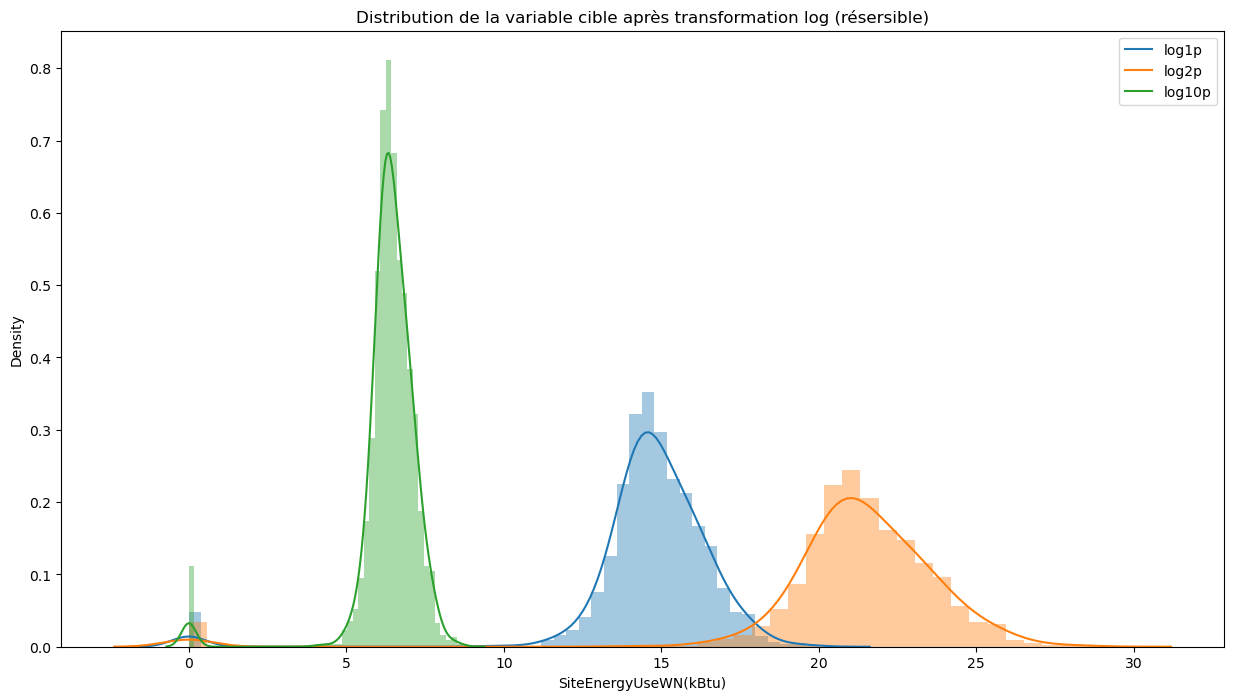

In [114]:
# Visualisation des 3 essais de transformation logarithmique
plt.figure(figsize=(15, 8))
plt.title('Distribution de la variable cible après transformation log (résersible)')
sns.distplot(test1p)
sns.distplot(test2p)
sns.distplot(test10p)
ax = plt.gca()
ax.legend(['log1p', 'log2p', 'log10p'])
plt.show()

In [249]:
# Inspection des descriptions statistiques
fonctions_data.stat_descriptives(df_tmp_test,['test1p', 'test2p', 'test10p'])

Variable name       Mean     Median      Skew   Kurtosis   Variance  \
0        test1p  14.655011  14.785427 -4.079974  22.708901   5.943106   
1        test2p  21.142712  21.330862 -4.079974  22.708901  12.369796   
2       test10p   6.364590   6.421229 -4.079974  22.708901   1.120939   

      Stdev  min        25%        50%        75%        max  
0  2.437849  0.0  14.051318  14.785427  15.770698  19.971671  
1  3.517072  0.0  20.271766  21.330862  22.752308  28.813031  
2  1.058744  0.0   6.102410   6.421229   6.849127   8.673587

Encore une fois, on constate une variance plus faible, et une amplitude plus faible, une moyenne proche de 0 pour le log10 + 1, on va retenir celui-ci pour notre transformation de notre variable cible

In [115]:
# Ajout d'une nouvelle variable 'SiteEnergyUseWNLog'
df_bat['SiteEnergyUseWNLog'] = np.log10(1+df_bat['SiteEnergyUseWN(kBtu)'])

In [117]:
# Suppression des colonnes 'SiteEnergyUse(kBtu)_trans' et 'TotalGHGEmissions_trans'
df_bat.drop(columns=['SiteEnergyUse(kBtu)_trans','TotalGHGEmissions_trans'],inplace=True)

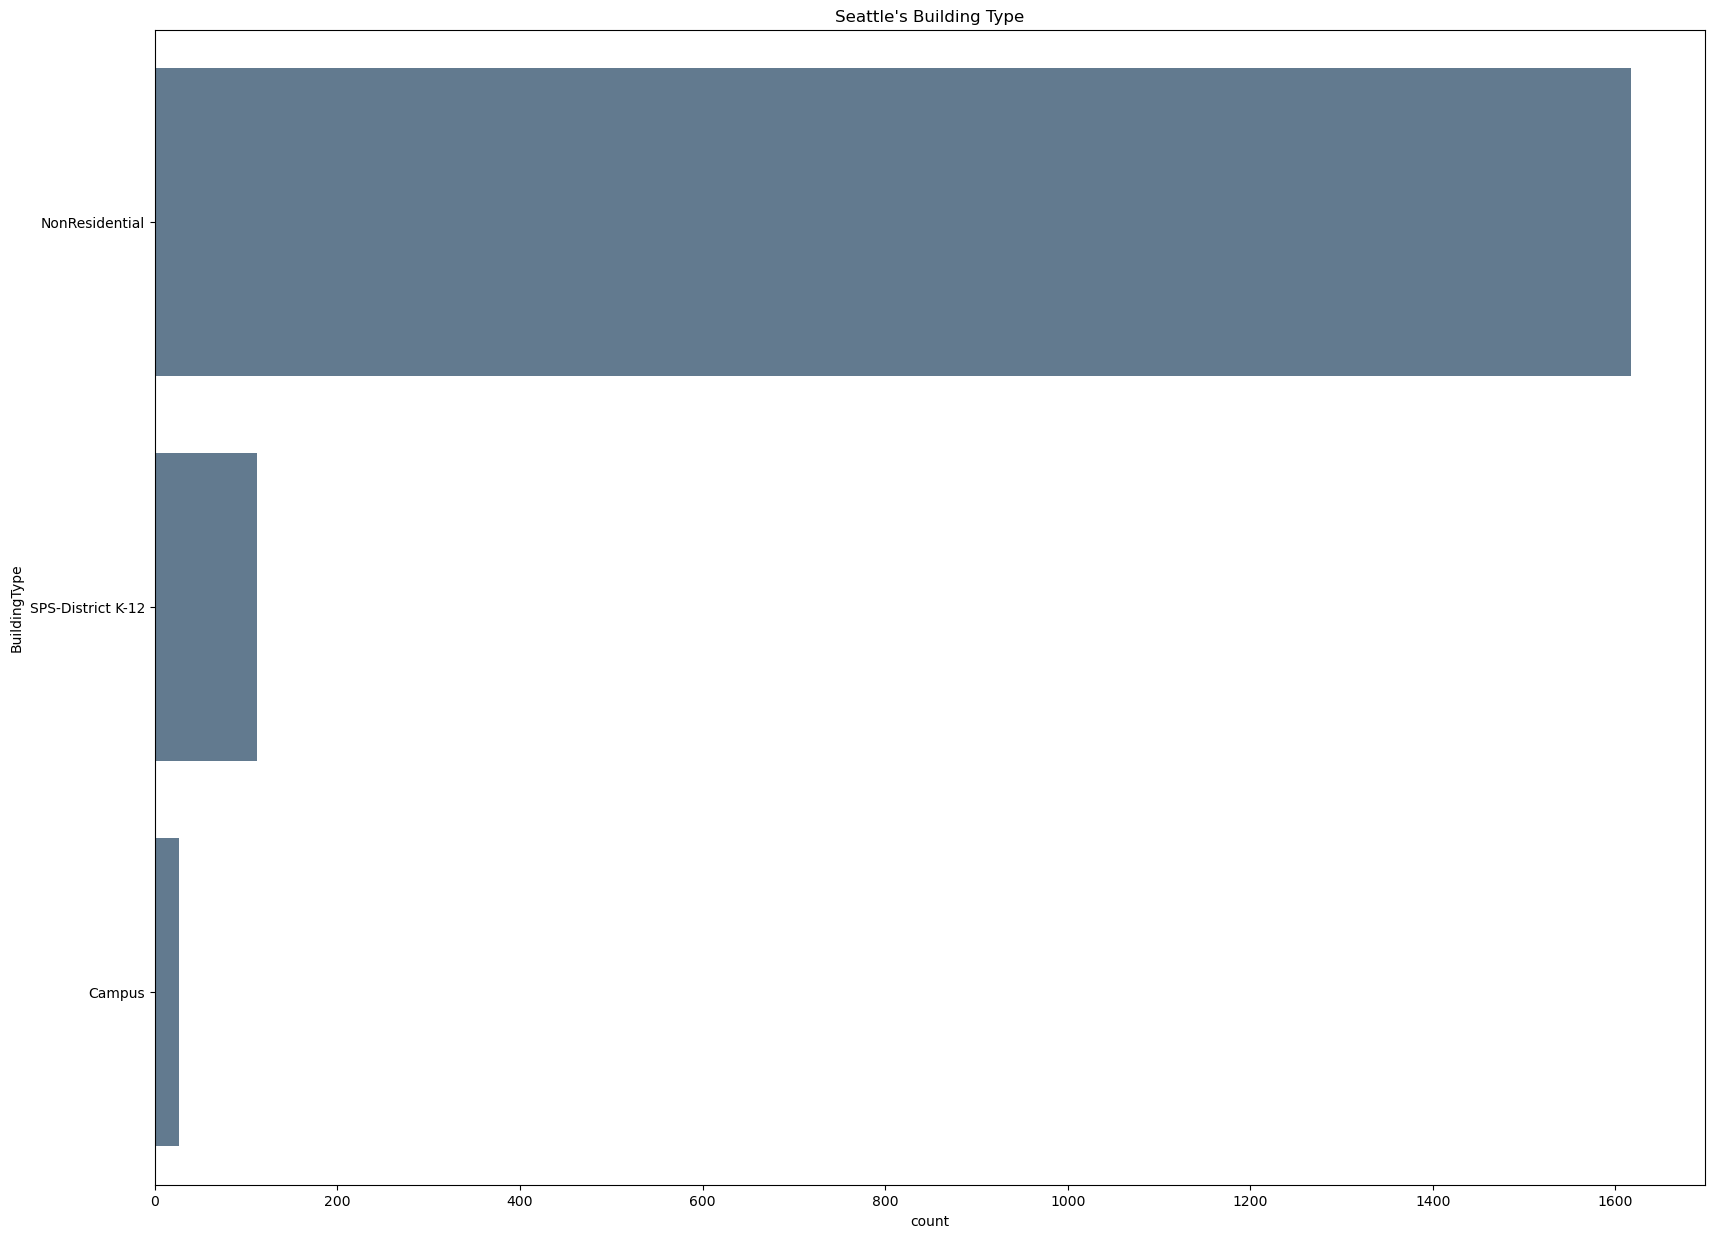

In [118]:
#BuildingType
ax, fig = plt.subplots(figsize=(20,15)) 
ax = sns.countplot(data=df_bat, y='BuildingType', color="#315a7d", alpha=.8,
              order=df_bat['BuildingType'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Building Type")
#plt.savefig('p4_00_graphic/buildingtype_hist.png')
plt.show()

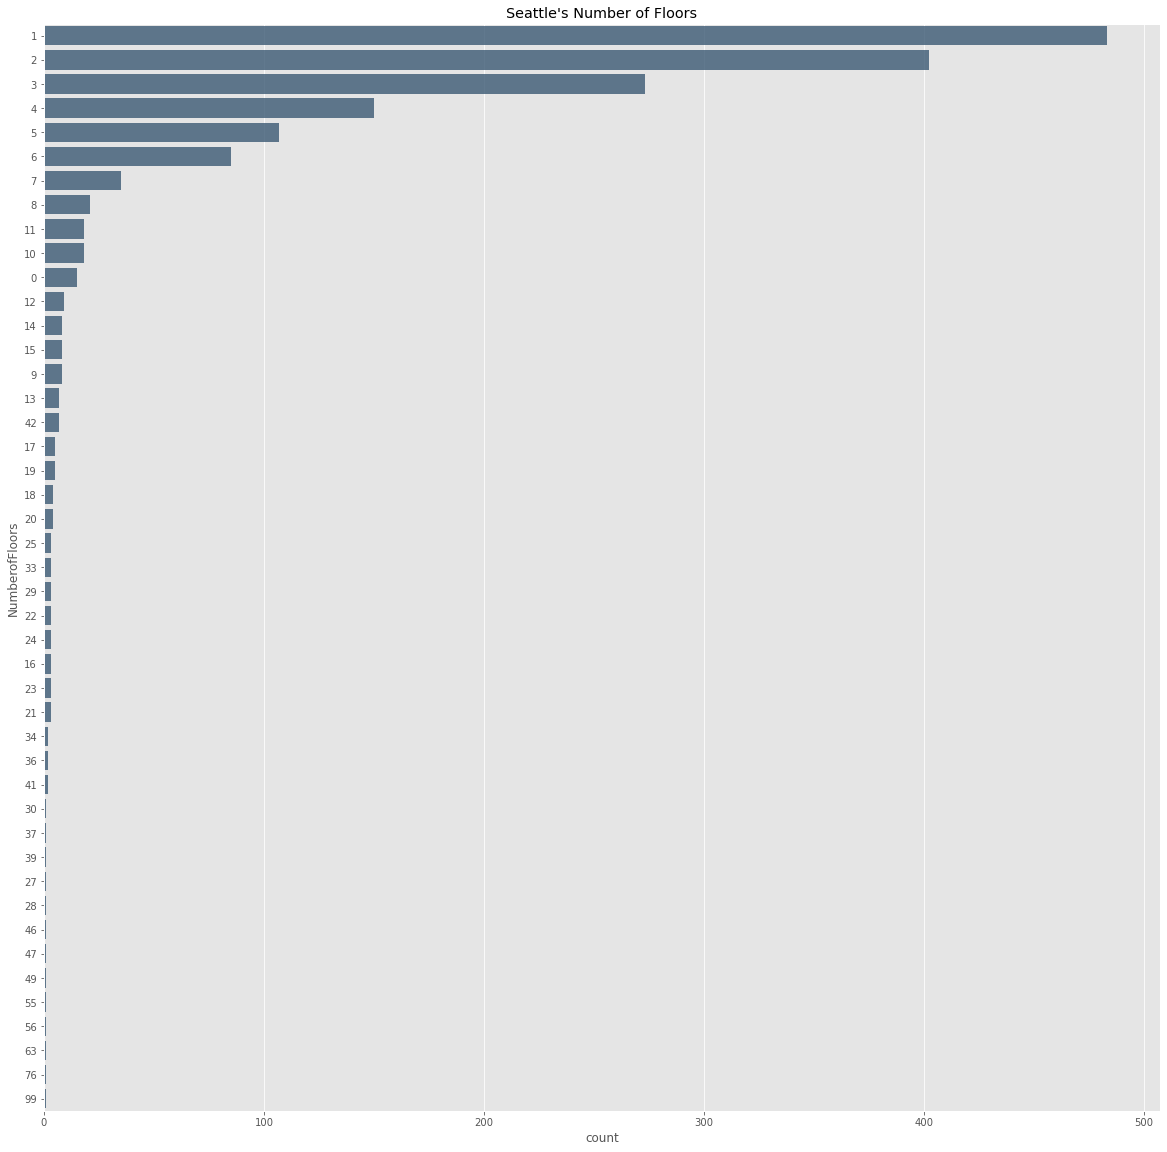

In [490]:
#NumberofFloors
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df_bat, y='NumberofFloors', color="#315a7d", alpha=.8,
              order=df_bat['NumberofFloors'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Number of Floors")
plt.show()

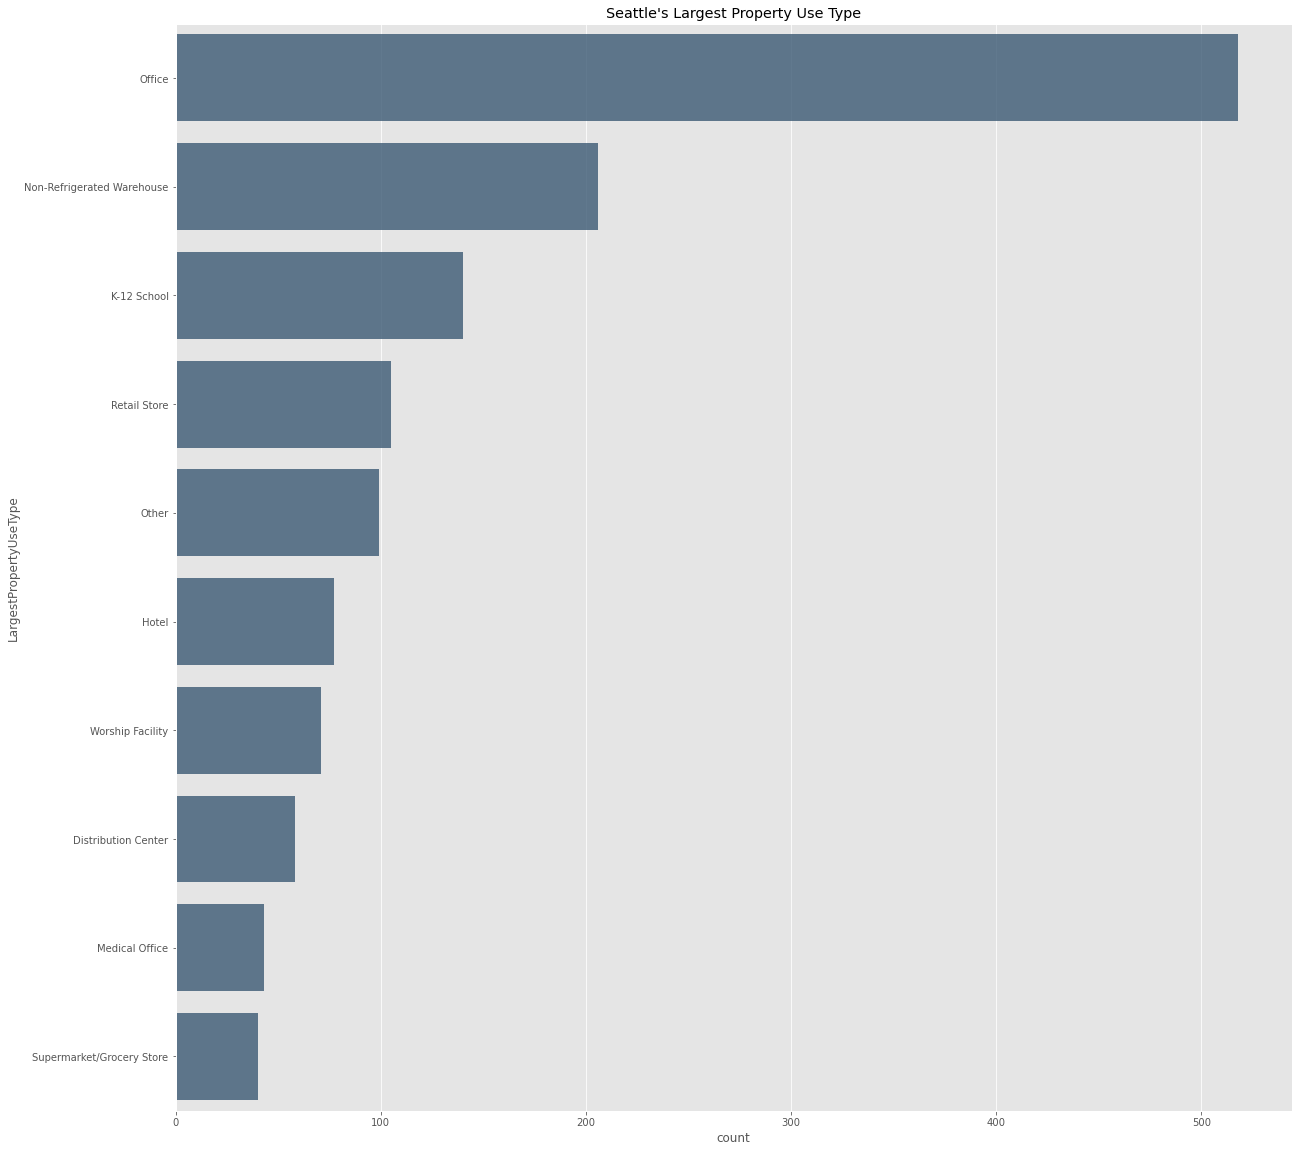

In [491]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df_bat, y='LargestPropertyUseType', color="#315a7d", alpha=.8,
              order=(df_bat['LargestPropertyUseType'].value_counts())[:10].index, orient='horizontal')


ax.set_title("Seattle's Largest Property Use Type")
plt.show()

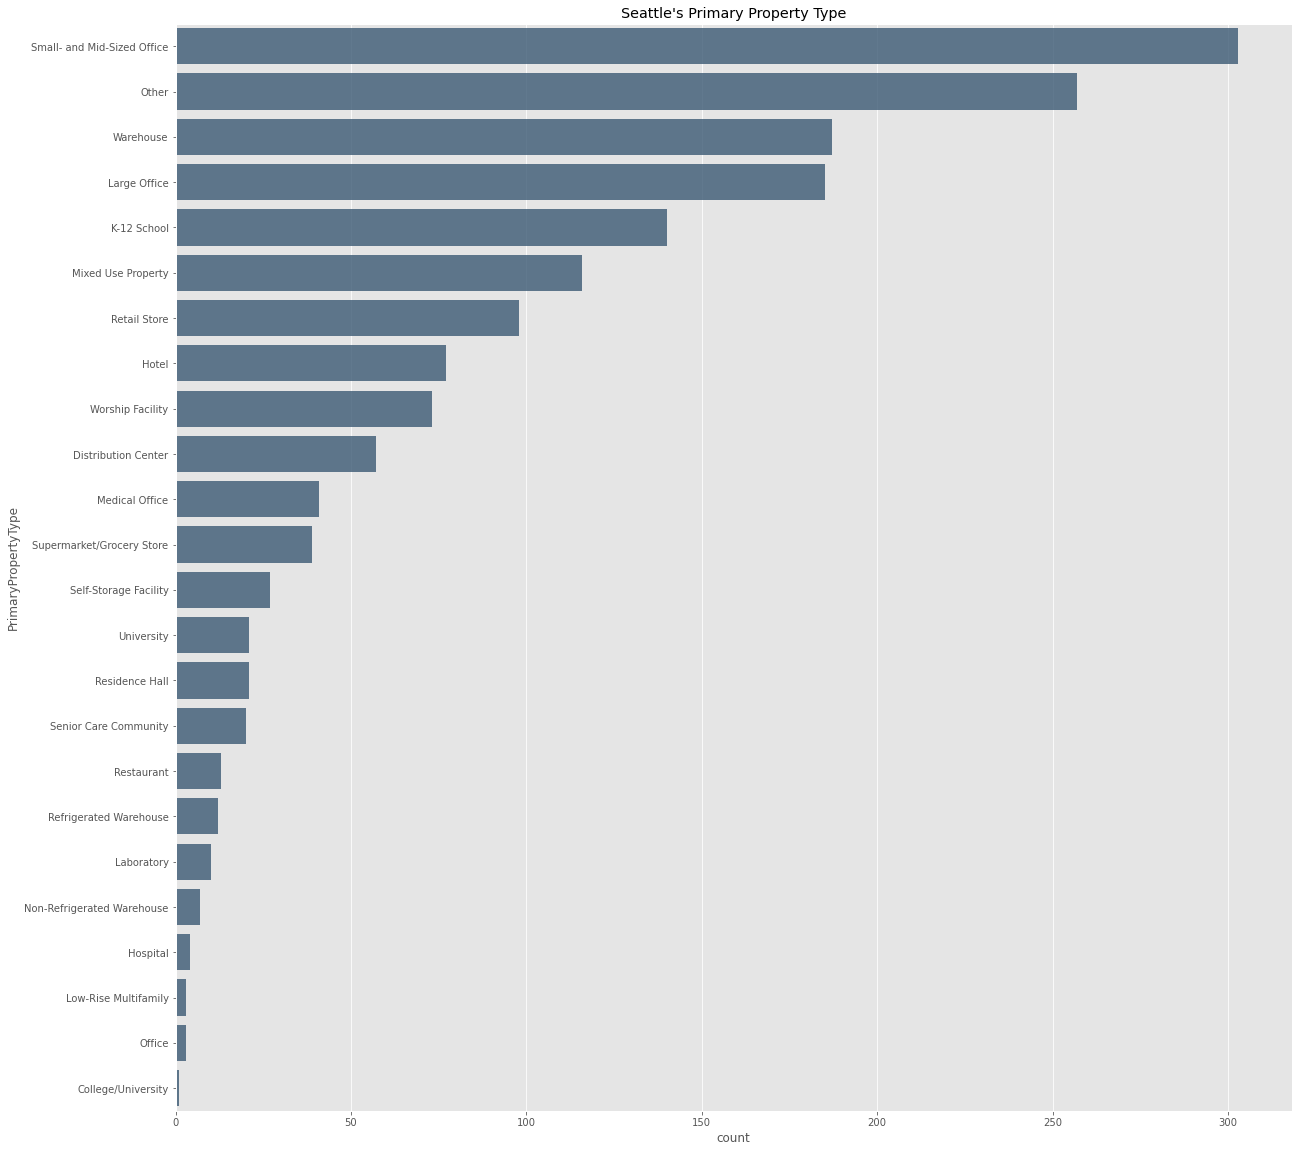

In [492]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df_bat, y='PrimaryPropertyType', color="#315a7d", alpha=.8,
              order=df_bat['PrimaryPropertyType'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Primary Property Type")
plt.show()

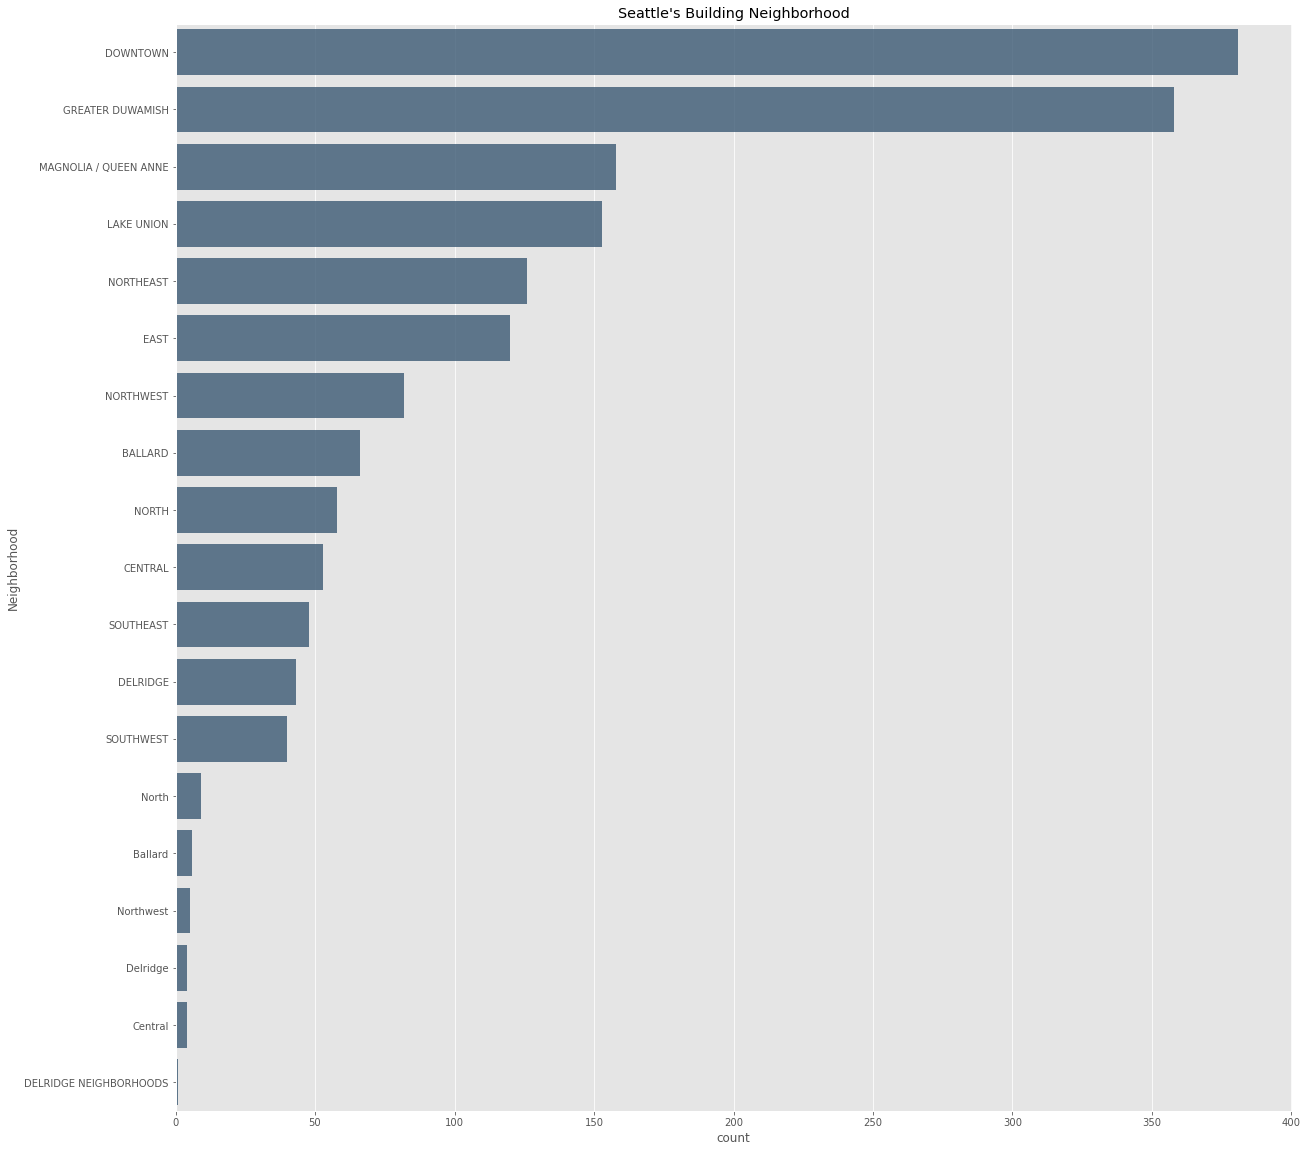

In [493]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df_bat, y='Neighborhood', color="#315a7d", alpha=.8,
              order=df_bat['Neighborhood'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Building Neighborhood")
plt.show()

In [129]:
df_bat['CouncilDistrictCode'].value_counts().index

Index(['7', '2', '3', '4', '5', '1', '6'], dtype='object')

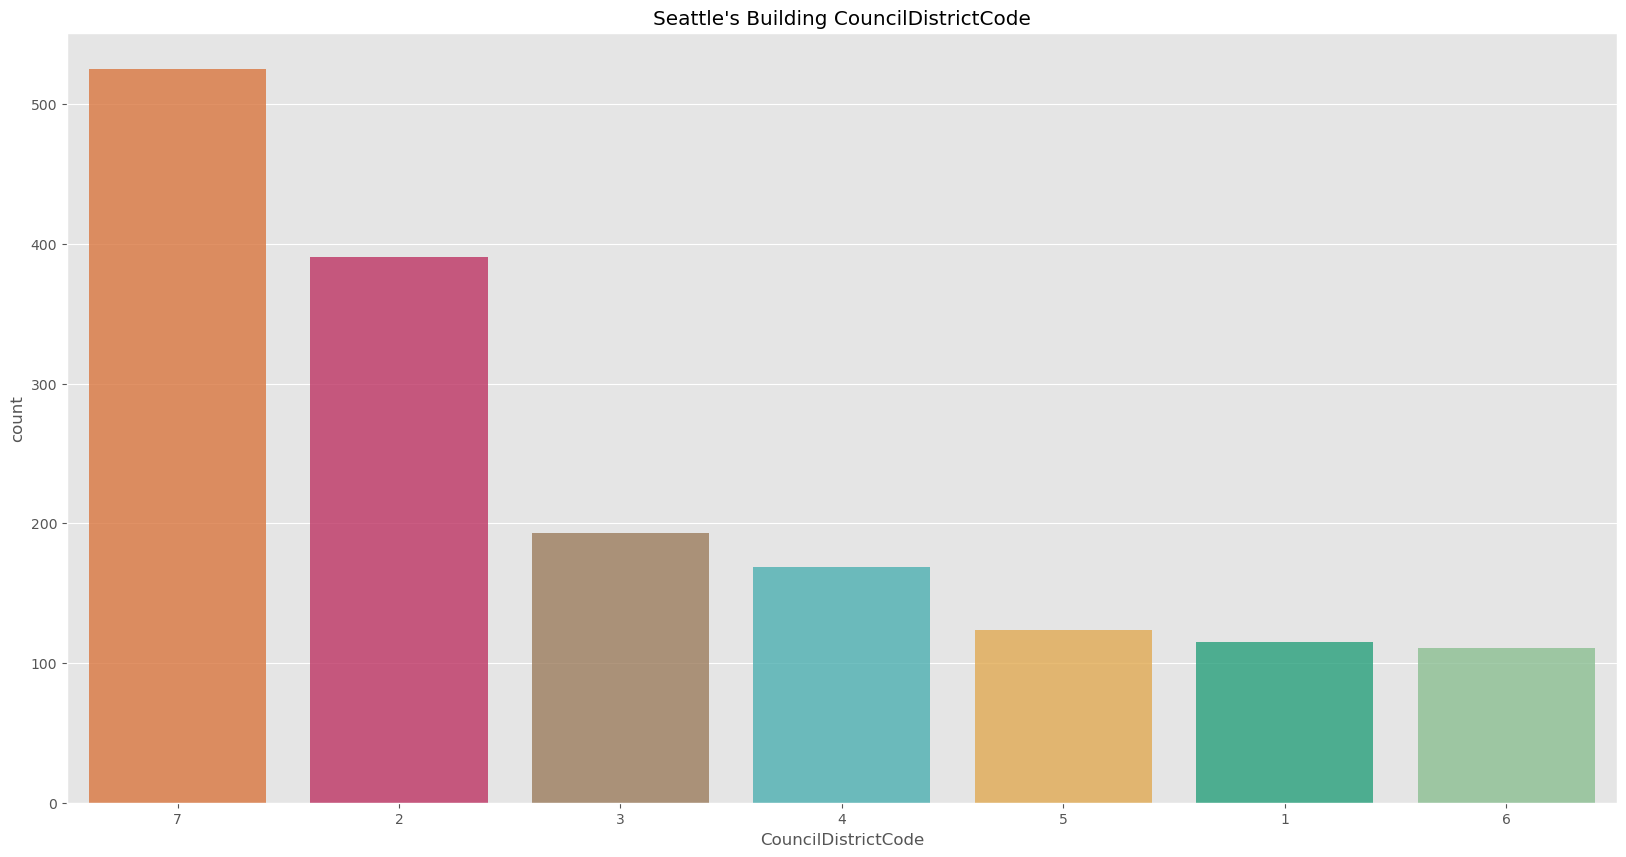

In [130]:
#CouncilDistrictCode
ax, fig = plt.subplots(figsize=(20,10)) 
code_colors = {'#d41c5c', '#a77c52', '#3cc0c2', '#13b383', '#f36f25', '#82c88c', '#f8af3c'}
ax = sns.countplot(data=df_bat, x='CouncilDistrictCode', palette=code_colors, alpha=.8,
                   order=list(df_bat['CouncilDistrictCode'].value_counts().index))
ax.set_title("Seattle's Building CouncilDistrictCode")
plt.show()

**Analyse bivariée**

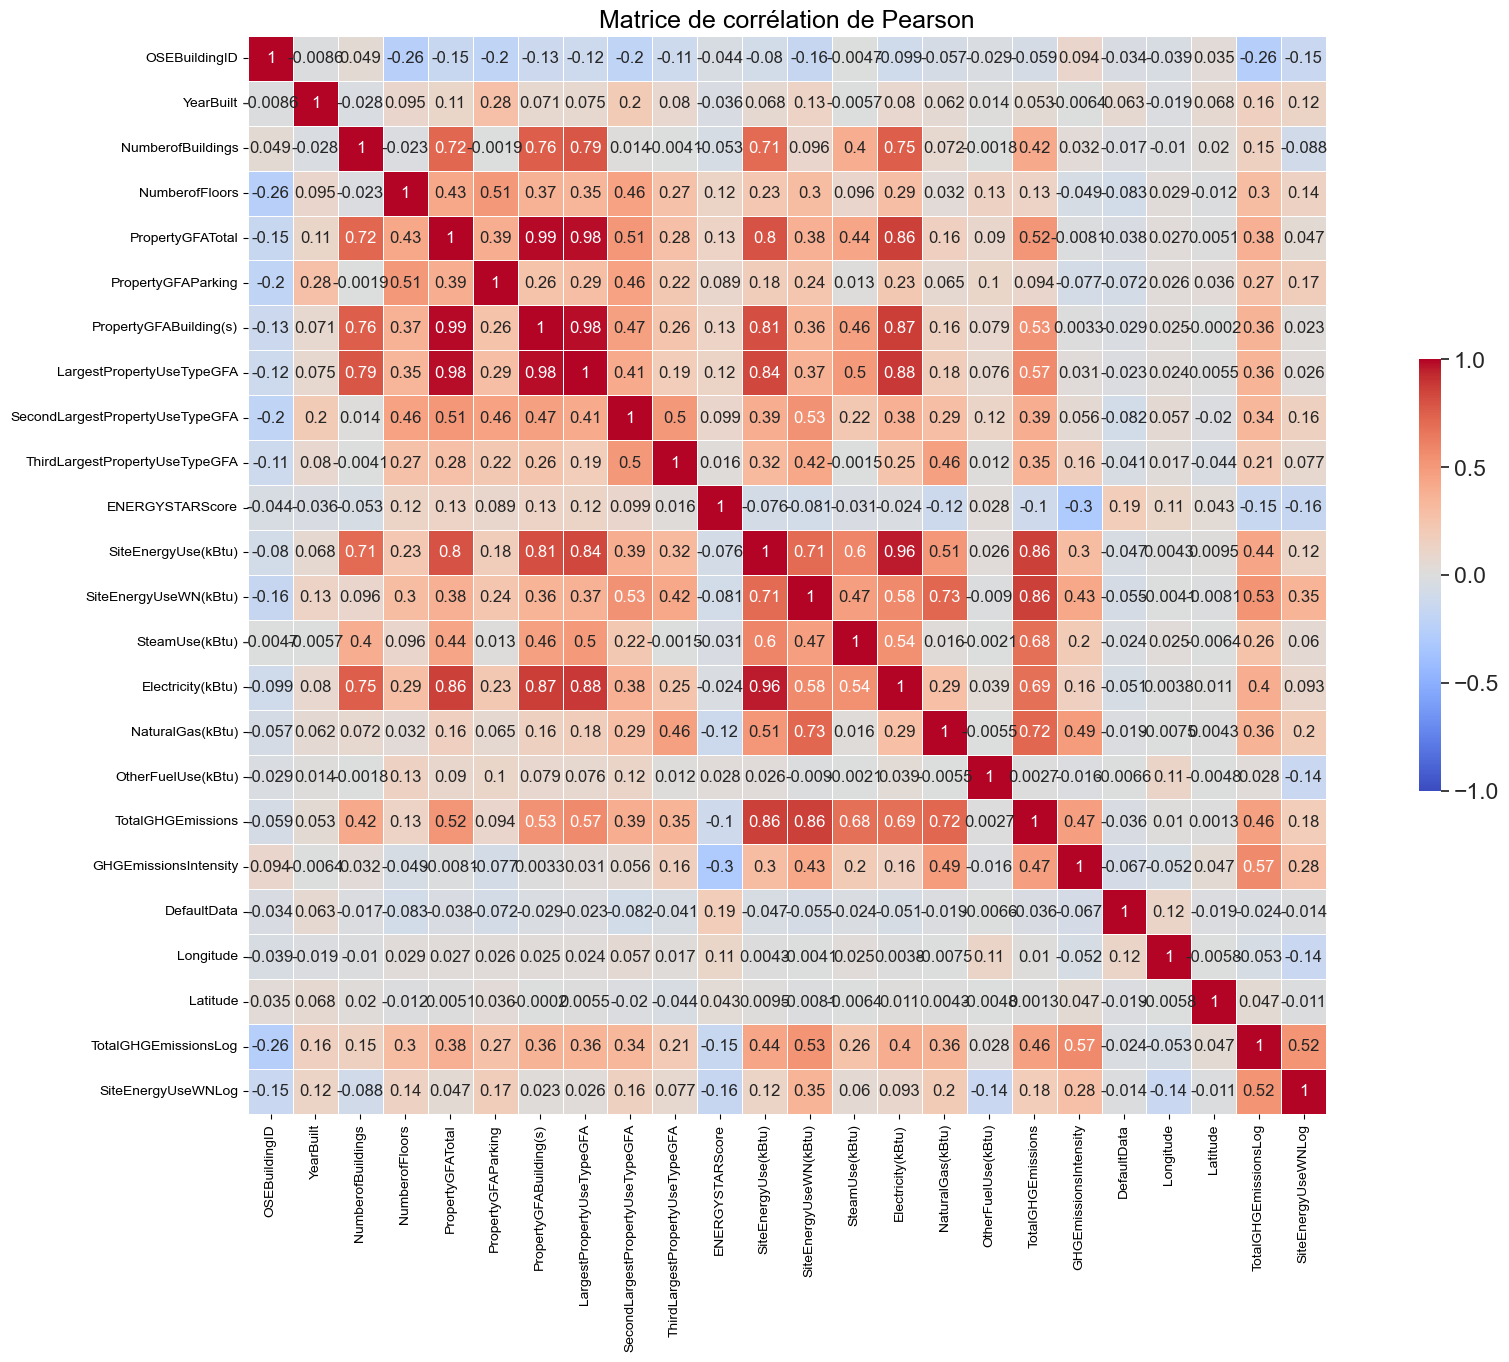

In [119]:
f, ax = plt.subplots(figsize=(24, 14))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(df_bat.corr(),
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_title('Matrice de corrélation de Pearson')
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

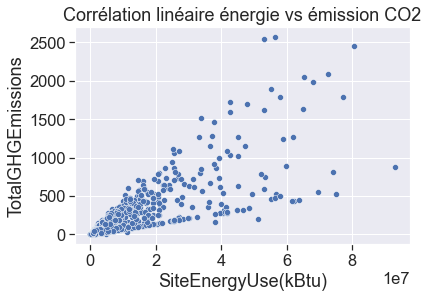

In [515]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=df_bat, )
plt.title("Corrélation linéaire énergie vs émission CO2")
plt.show()

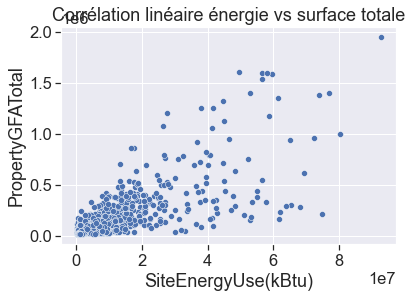

In [517]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='PropertyGFATotal', data=df_bat, )
plt.title("Corrélation linéaire énergie vs surface totale")
plt.show()

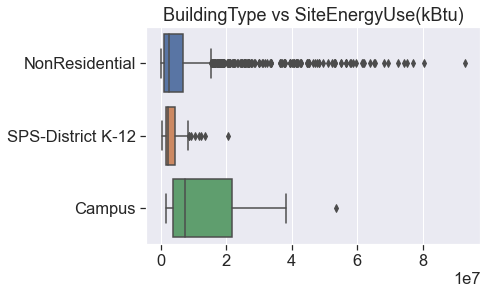

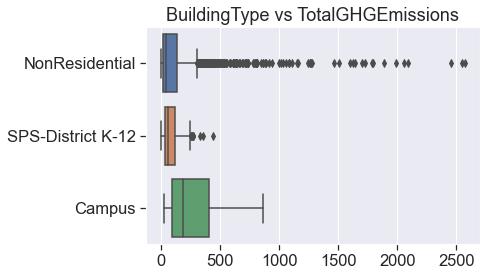

In [519]:
#BuildingType VS numerical_target
for target in df_bat[numerical_target] : 
    sns.boxplot(x=target, y='BuildingType', data=df_bat)
    plt.title('BuildingType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

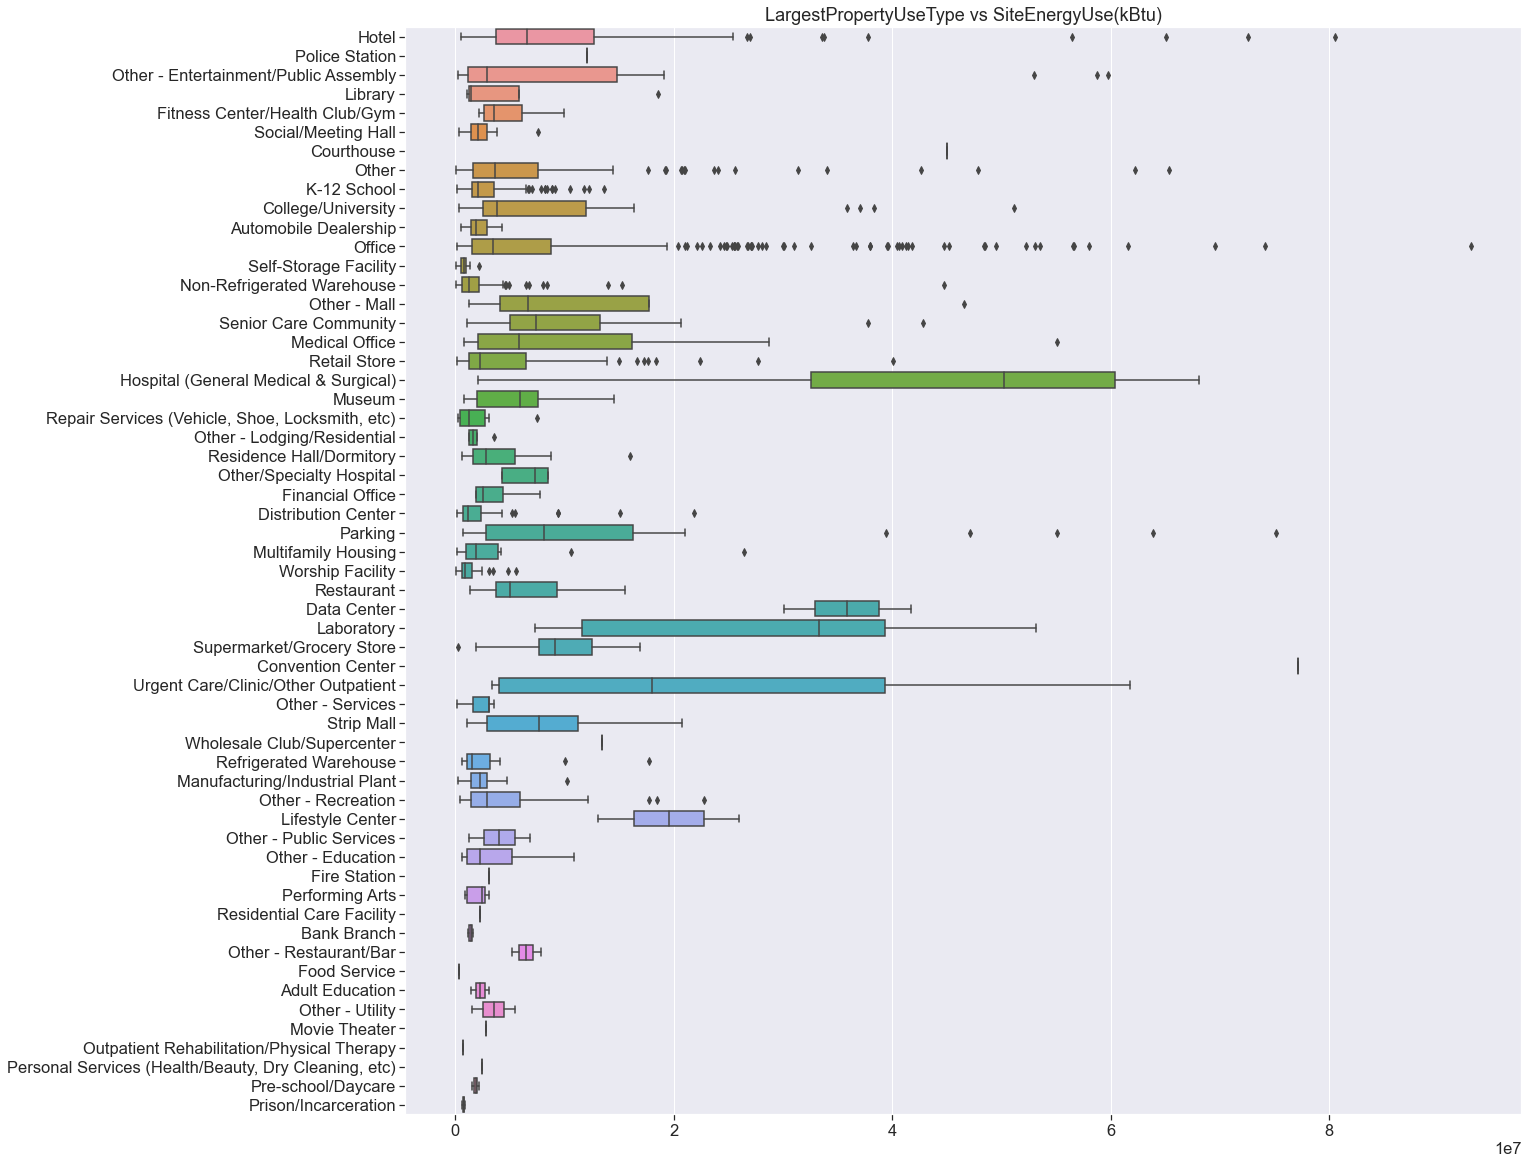

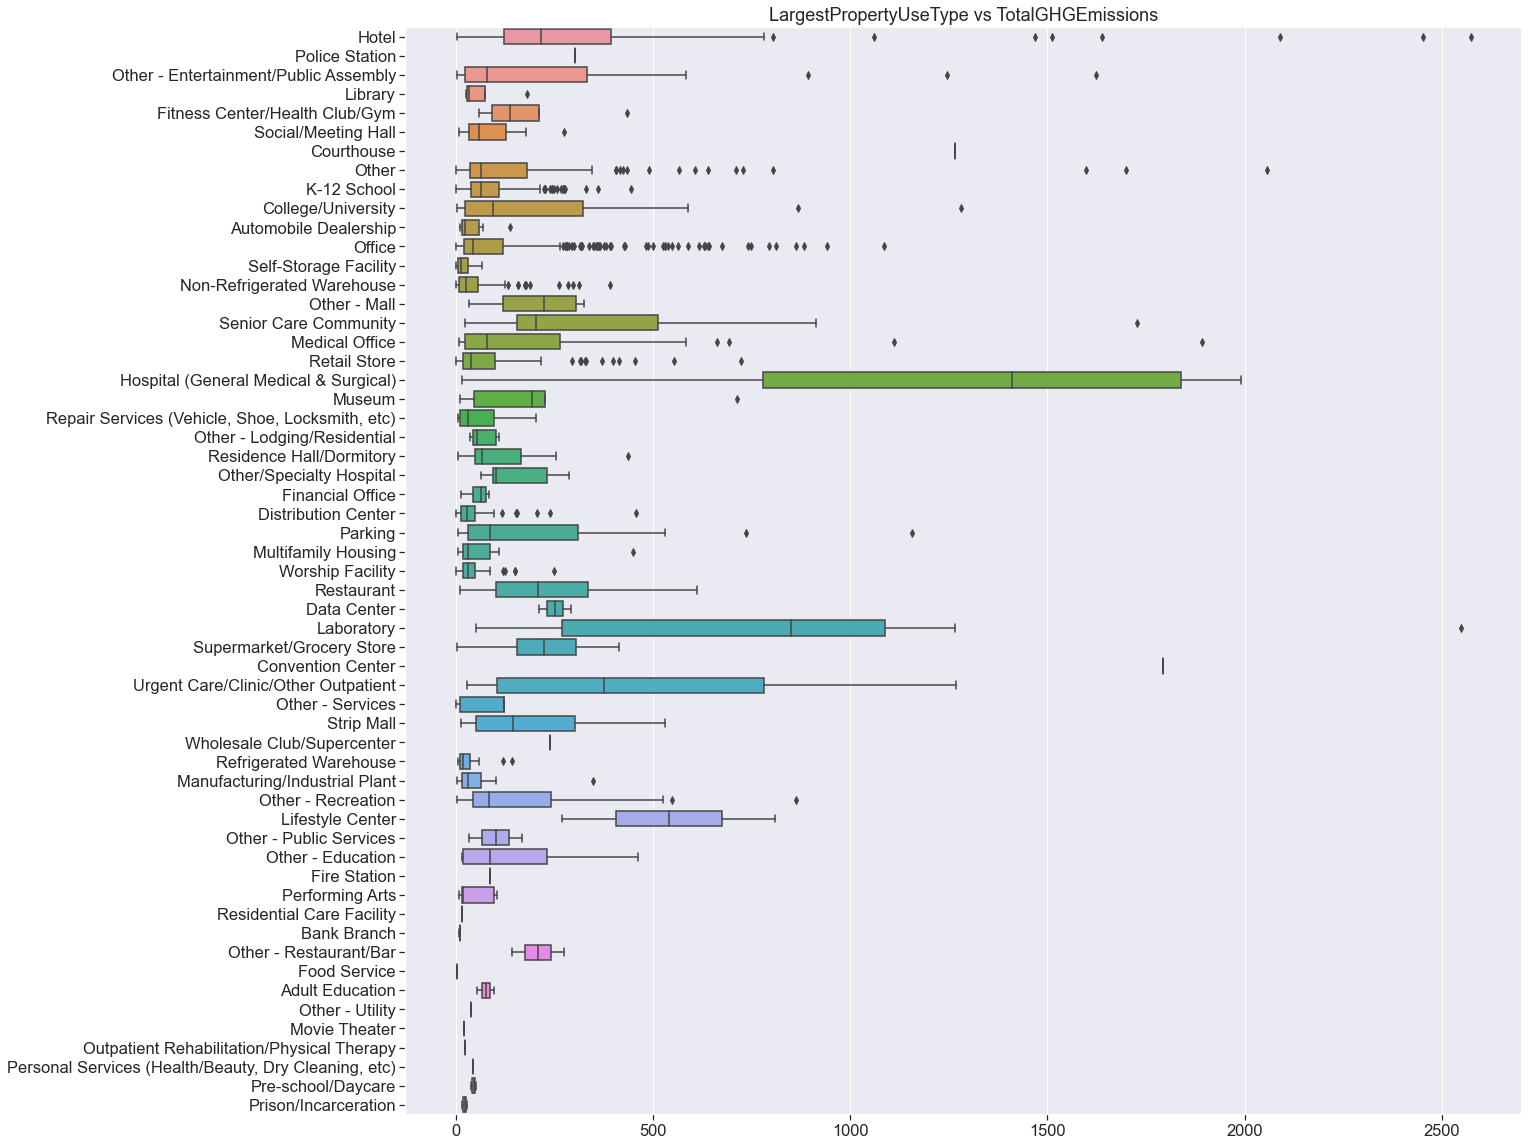

In [520]:
#LargestPropertyUseType VS numerical_target
for target in df_bat[numerical_target] : 
    plt.figure(figsize=(20, 20))
    sns.boxplot(x=target, y='LargestPropertyUseType', data=df_bat)
    plt.title('LargestPropertyUseType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

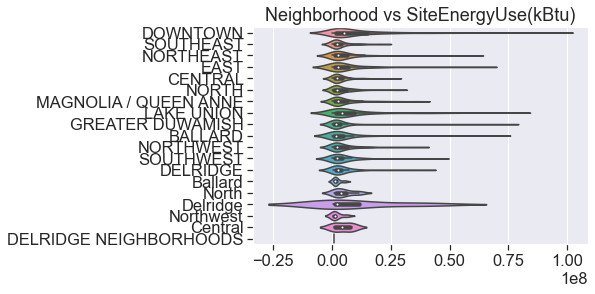

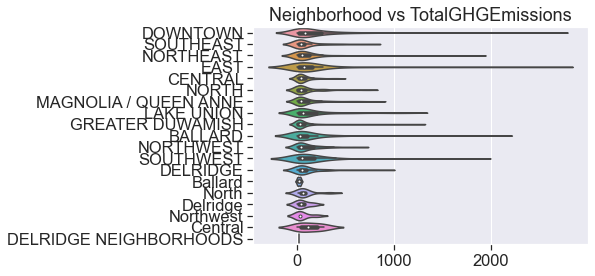

In [521]:
#Violin Plot Neighborhood VS numerical_target
for target in df_bat[numerical_target] : 
    sns.violinplot(x=target, y='Neighborhood', data=df_bat, scale='width')
    plt.title('Neighborhood vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [121]:
df_tmp = df_bat.copy()

In [122]:
# Constitution du dataframe de travail
df_tmp['latitude_bin'] = pd.cut(df_tmp['Latitude'], bins=10, labels=False)
df_tmp['longitude_bin'] = pd.cut(df_tmp['Longitude'], bins=10, labels=False)
df_tmp['lat_long_bin'] = df_tmp['latitude_bin'].astype(
    str) + df_tmp['longitude_bin'].astype(str)

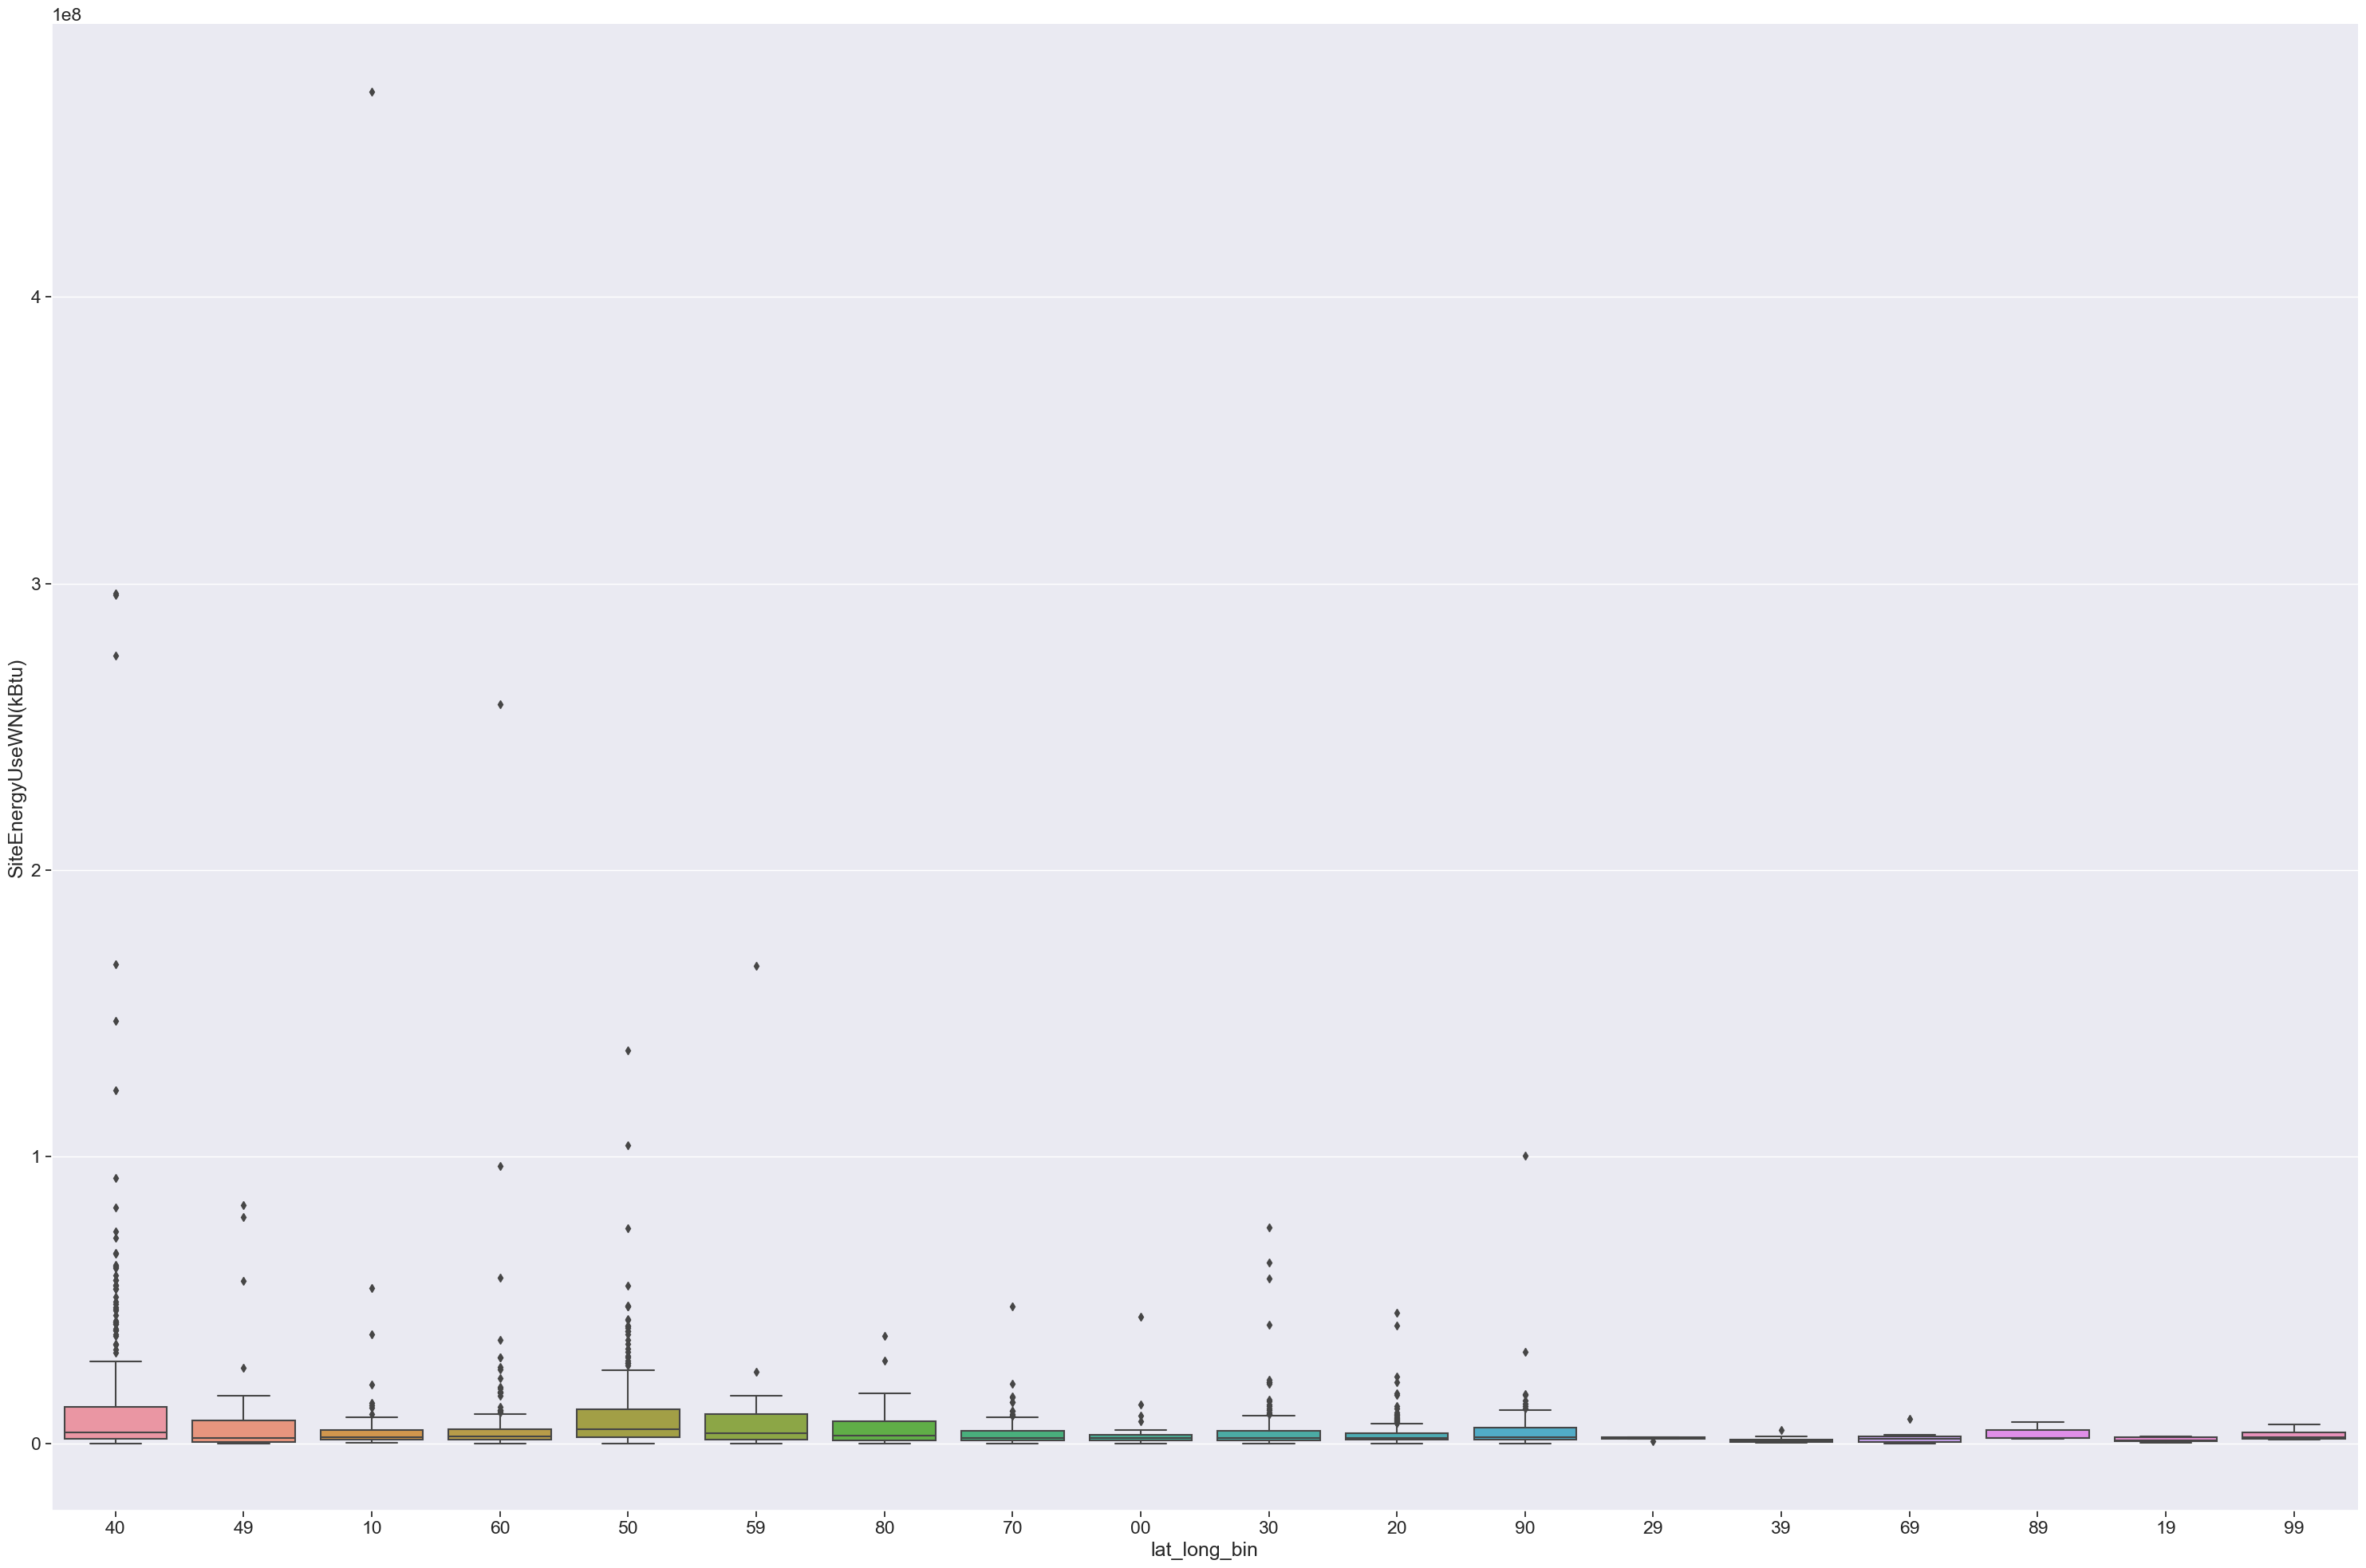

In [123]:
# Répartition de l'énergie pour chaque coordonnées latitude+longitude binarisée
sns.catplot(x='lat_long_bin', kind='box', height=20,
            aspect=30/20, y='SiteEnergyUseWN(kBtu)', data=df_tmp)
plt.show()

In [124]:
# Ajout d'une nouvelle variable 'lat_long_bin'
df_bat['lat_long_bin'] = df_tmp['lat_long_bin']

In [125]:
# Exemple du contenu des adresses
df_bat['Address'].sample(20)

490               241 S Lander St
189              4505 16TH AVE NE
448     7245 West Marginal Way SW
2195                 7050 35th NE
327         909 University Street
591                 720 Olive Way
501                 505 1ST AVE S
173                1420 S Trenton
1086        3300 6th Avenue South
2161        1760 4th Avenue South
498          542 1st Avenue South
225            600 Stewart Street
893           2517 Eastlake Ave E
344           155 NE 100th Street
294               1511 6th Avenue
3387           8721 Rainier Ave S
1267            2717 Dexter Ave N
836                814 2nd Avenue
2233               2944 1st Ave S
1355                 1315 1st Ave
Name: Address, dtype: object

In [126]:
# Fonction qui 
def type_adresse(row):
    '''
    Pour chaque ligne, recherche si l'adresse contient Rue, avenue, chemin
    ou autres et alimente la nouvelle variable.
    Parameters input :
    row : ligne d'un dataframe transmise, obligatoire.
    Retunrs :
    'WAY', 'STREET', 'AVENUE' ou 'Other'
    '''
    if (re.search('WAY', row)):
        return 'WAY'
    elif (re.search('ST| ST$|STREET', row)):
        return 'STREET'

    elif (re.search('AVE|AVENUE', row)):
        return 'AVENUE'
    else:
        return 'Other'

In [127]:
# Ajout d'une nouvelle variable 'Address_type'
df_bat['Address_type'] = df_bat['Address'].apply(type_adresse)

In [128]:
# Transformation des 4 variables 'SteamUse(kBtu)', 'Electricity(kBtu)', 
# 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'
# Transforme en 0 ou 1 les énergies pour non utilisée ou utilisée
cols_a_binariser = [
    'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']
df_bat[cols_a_binariser] = Binarizer().fit_transform(df_bat[cols_a_binariser])

In [129]:
# Ajout d'une nouvelle variable 'TauxParkingGFA'
df_bat['TauxParkingGFA'] = df_bat['PropertyGFAParking'] / \
    df_bat['PropertyGFATotal']

In [130]:
# Ajout de 3 nouvelles variables 'TauxFirstUseGFA', 'TauxSecondtUseGFA'
# et 'TauxThirdtUseGFA'
df_bat['TauxFirstUseGFA'] = df_bat['LargestPropertyUseTypeGFA'] / \
    df_bat['PropertyGFATotal']
df_bat['TauxSecondtUseGFA'] = df_bat['SecondLargestPropertyUseTypeGFA'] / \
    df_bat['PropertyGFATotal']
df_bat['TauxThirdtUseGFA'] = df_bat['ThirdLargestPropertyUseTypeGFA'] / \
    df_bat['PropertyGFATotal']

In [131]:
# Ajout d'une nouvelle variable 'BuildingAge'
df_bat['BuildingAge'] = df_bat['DataYear'].astype(int)-df_bat['YearBuilt']

In [132]:
# Colonnes numériques en supprimant les variables fortement liées
cols_num_new = df_bat.select_dtypes(include=[np.number]).columns.to_list()
cols_num_new.remove('YearBuilt')
cols_num_new.remove('PropertyGFATotal')
cols_num_new.remove('PropertyGFAParking')
cols_num_new.remove('LargestPropertyUseTypeGFA')
cols_num_new.remove('SecondLargestPropertyUseTypeGFA')
cols_num_new.remove('ThirdLargestPropertyUseTypeGFA')
cols_num_new.remove('ENERGYSTARScore')

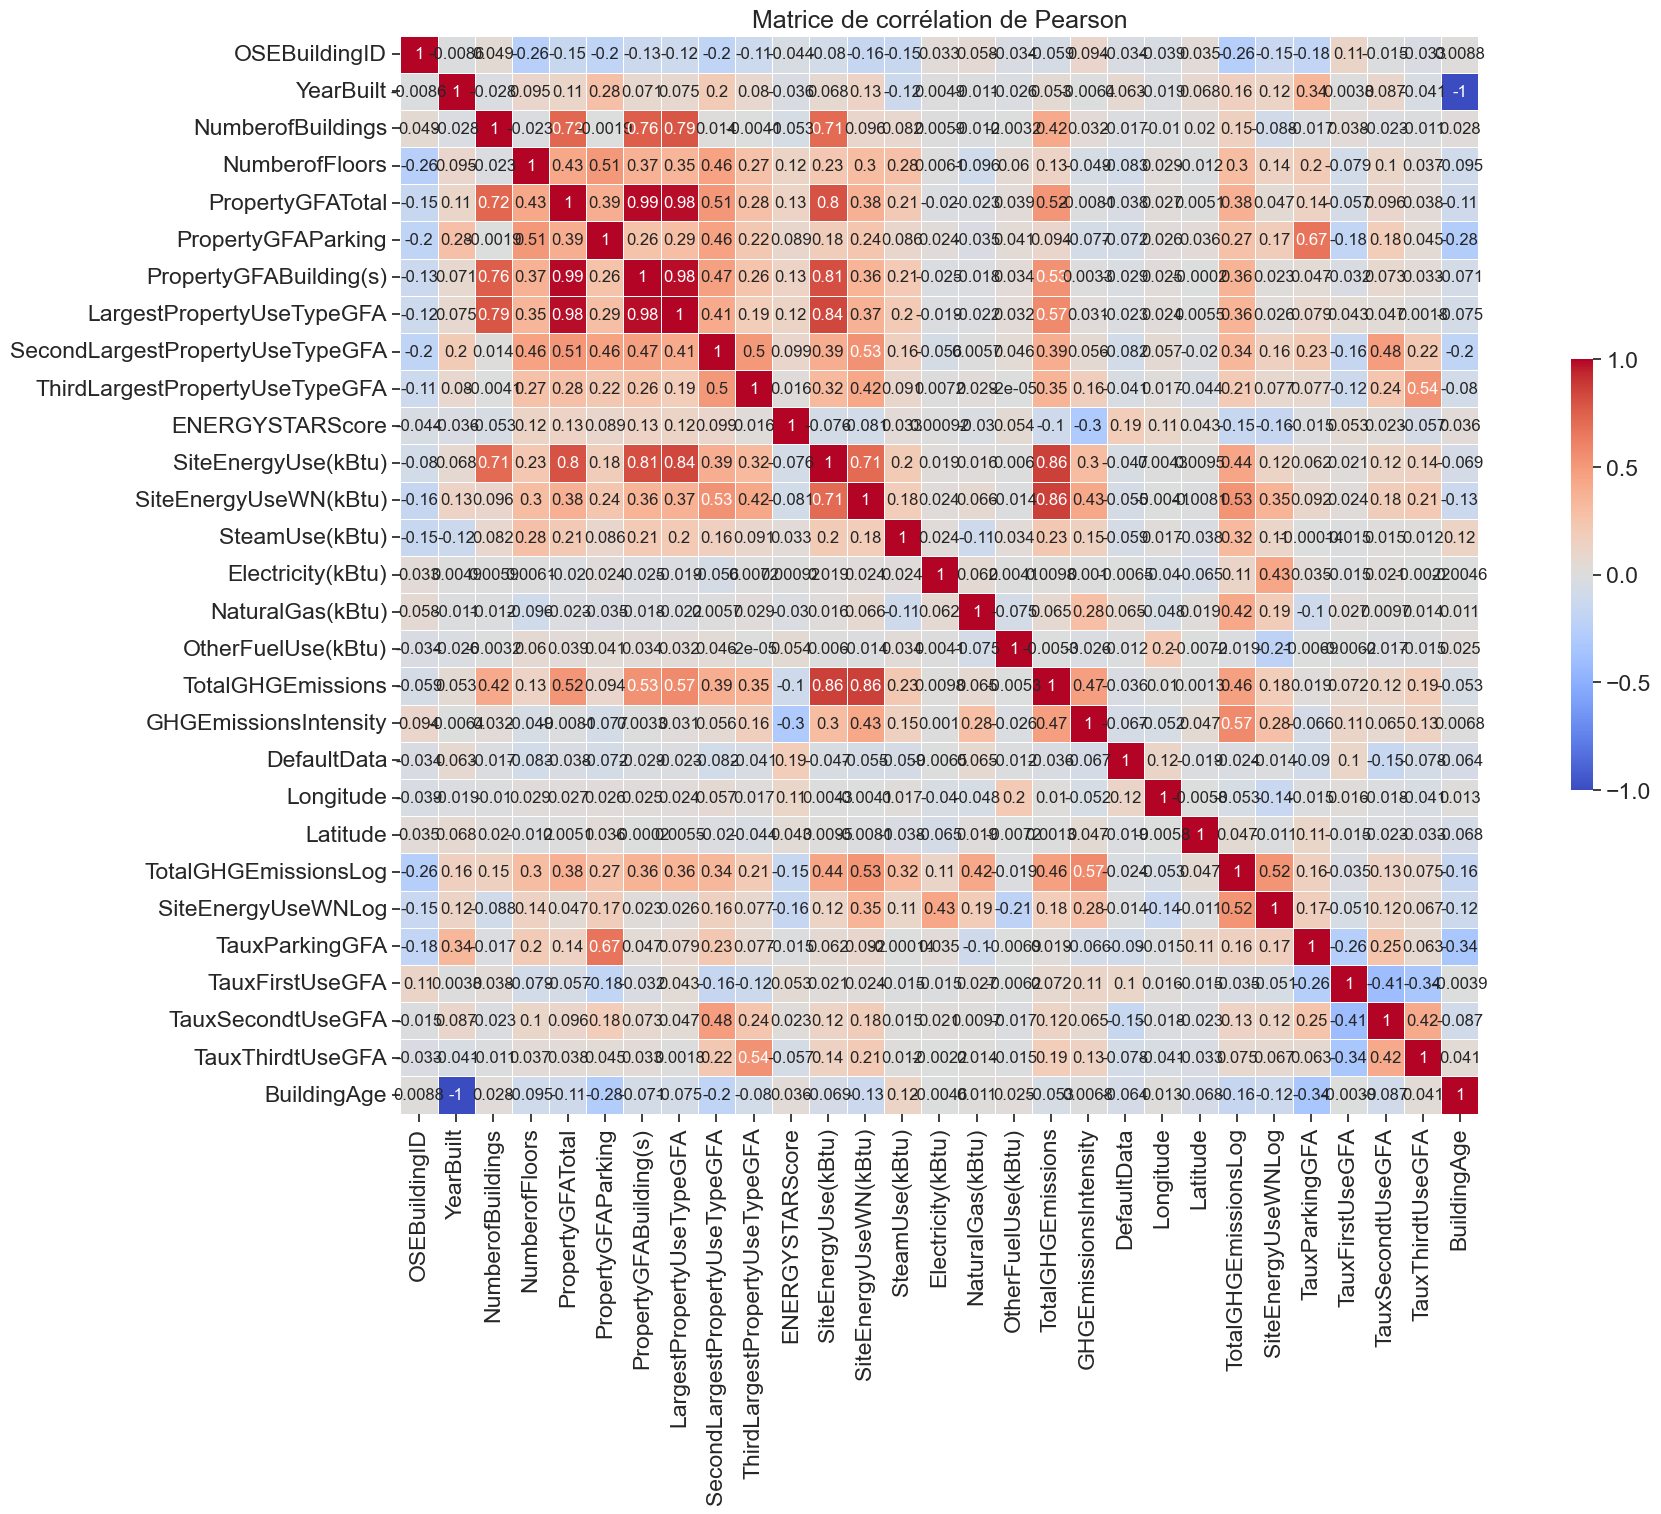

In [134]:
# plt.figure(figsize=(10, 10))
# df_bat_corr = df_bat[cols_num_new].corr()
# outils_visu.corrplot(df_bat_corr)


f, ax = plt.subplots(figsize=(24, 14))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(df_bat.corr(),
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_title('Matrice de corrélation de Pearson')
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [135]:
df_bat.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'Longitude',
       'Latitude', 'ZipCode', 'Address', 'TotalGHGEmissionsLog',
       'SiteEnergyUseWNLog', 'lat_long_bin', 'Address_type', 'TauxParkingGFA',
       'TauxFirstUseGFA', 'TauxSecondtUseGFA', 'TauxThirdtUseGFA',
    

In [136]:
var_cibles = ['SiteEnergyUseWN(kBtu)', 'SiteEnergyUseWNLog', 
              'TotalGHGEmissions', 'TotalGHGEmissionsLog', 'ENERGYSTARScore']

In [137]:
var_inputs = ['BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood','NumberofBuildings',
       'NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)', 
       'ListOfAllPropertyUseTypes','LargestPropertyUseType', 'SecondLargestPropertyUseType',
        'ThirdLargestPropertyUseType','SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'Comments', 'Outlier', 'Longitude',
       'Latitude', 'ZipCode', 'Address', 'lat_long_bin', 'Address_type',
       'TauxParkingGFA', 'TauxFirstUseGFA', 'TauxSecondtUseGFA',
       'TauxThirdtUseGFA', 'BuildingAge' 
             ]

In [140]:
# Constitution du jeu de données final
df_bat = df_bat[var_cibles+var_inputs]

In [141]:
df_bat.shape

(1755, 34)

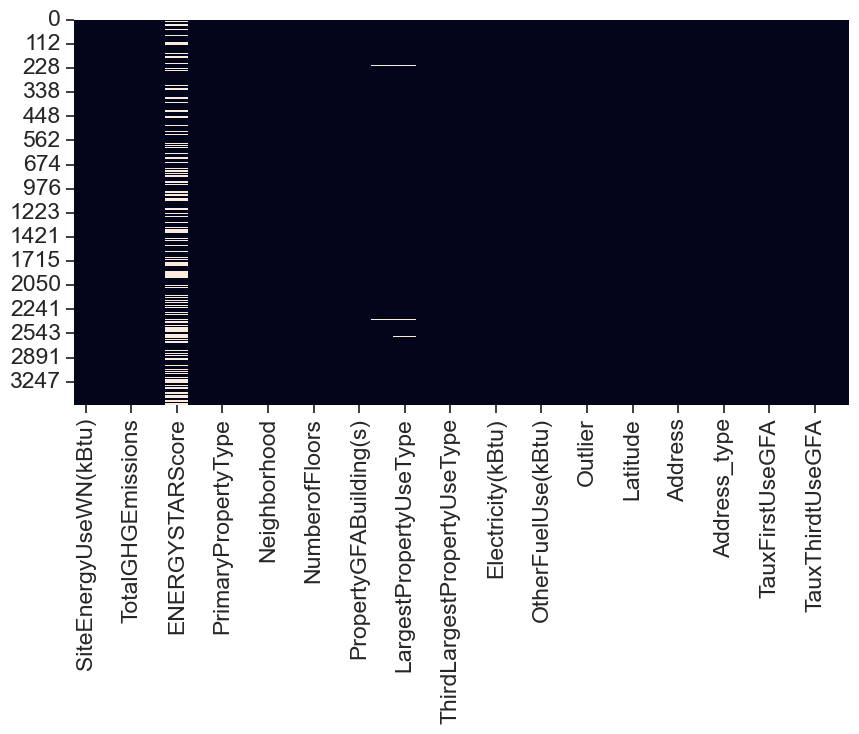

In [142]:
# Heatmap du jeu de données nettoyé
plt.figure(figsize=(10, 5))
sns.heatmap(df_bat.isna(), cbar=False)
plt.show()

In [147]:
# Export des données
df_bat.to_csv('./data_bat_clean.csv', sep='\t')